# Hands-on-with-PyTorch

**Contents:**

- Tensors
- Autograd
- Artifical Neural Networks(ANNs)
- Convolutional Neural Networks(CNNs)
- Recurrent Neural Networks(RNNs)
- GPU & CPU

## Tensor

Tensors are specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode input, output and model's parameters. 

Tensor are very similar NumPy's ndarrays, except that tensors can run on GPUs or other specialized hardware to accelerate computing.

This section covers:
* Converting NumPy arrays to PyTorch tensors
* Creating tensors from scratch

### Imports

In [1]:
import torch
import numpy as np

Confirm you're using PyTorch version 1.1.0

In [2]:
torch.__version__

'2.0.1'

### Converting NumPy arrays to PyTorch tensors
A <a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.Tensor</tt></strong></a> is a multi-dimensional matrix containing elements of a single data type.<br>
Calculations between tensors can only happen if the tensors share the same dtype.<br>
In some cases tensors are used as a replacement for NumPy to use the power of GPUs (more on this later).

In [4]:
arr = np.array([1,2,3,4,5])
print(arr)
print(arr.dtype)
print(type(arr))

[1 2 3 4 5]
int64
<class 'numpy.ndarray'>


In [5]:
x = torch.from_numpy(arr)
# Equivalent to x = torch.as_tensor(arr)

print(x)

tensor([1, 2, 3, 4, 5])


In [5]:
# Print the type of data held by the tensor
print(x.dtype)

torch.int32


In [6]:
# Print the tensor object type
print(type(x))
print(x.type()) # this is more specific!

<class 'torch.Tensor'>
torch.LongTensor


In [7]:
arr2 = np.arange(0.,12.).reshape(4,3)
print(arr2)

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]


In [8]:
x2 = torch.from_numpy(arr2)
print(x2)
print(x2.type())

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


Here <tt>torch.DoubleTensor</tt> refers to 64-bit floating point data.

<h3><a href='https://pytorch.org/docs/stable/tensors.html'>Tensor Datatypes</a></h3>
<table style="display: inline-block">
<tr><th>TYPE</th><th>NAME</th><th>EQUIVALENT</th><th>TENSOR TYPE</th></tr>
<tr><td>32-bit integer (signed)</td><td>torch.int32</td><td>torch.int</td><td>IntTensor</td></tr>
<tr><td>64-bit integer (signed)</td><td>torch.int64</td><td>torch.long</td><td>LongTensor</td></tr>
<tr><td>16-bit integer (signed)</td><td>torch.int16</td><td>torch.short</td><td>ShortTensor</td></tr>
<tr><td>32-bit floating point</td><td>torch.float32</td><td>torch.float</td><td>FloatTensor</td></tr>
<tr><td>64-bit floating point</td><td>torch.float64</td><td>torch.double</td><td>DoubleTensor</td></tr>
<tr><td>16-bit floating point</td><td>torch.float16</td><td>torch.half</td><td>HalfTensor</td></tr>
<tr><td>8-bit integer (signed)</td><td>torch.int8</td><td></td><td>CharTensor</td></tr>
<tr><td>8-bit integer (unsigned)</td><td>torch.uint8</td><td></td><td>ByteTensor</td></tr></table>

### Copying vs. sharing

<a href='https://pytorch.org/docs/stable/torch.html#torch.from_numpy'><strong><tt>torch.from_numpy()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.as_tensor'><strong><tt>torch.as_tensor()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.tensor'><strong><tt>torch.tensor()</tt></strong></a><br>

There are a number of different functions available for <a href='https://pytorch.org/docs/stable/torch.html#creation-ops'>creating tensors</a>. When using <a href='https://pytorch.org/docs/stable/torch.html#torch.from_numpy'><strong><tt>torch.from_numpy()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/torch.html#torch.as_tensor'><strong><tt>torch.as_tensor()</tt></strong></a>, the PyTorch tensor and the source NumPy array share the same memory. This means that changes to one affect the other. However, the <a href='https://pytorch.org/docs/stable/torch.html#torch.tensor'><strong><tt>torch.tensor()</tt></strong></a> function always makes a copy.

In [9]:
# Using torch.from_numpy()
arr = np.arange(0,5)
t = torch.from_numpy(arr)
print(t)

tensor([0, 1, 2, 3, 4])


In [10]:
arr[2]=77
print(t)

tensor([ 0,  1, 77,  3,  4])


In [11]:
# Using torch.tensor()
arr = np.arange(0,5)
t = torch.tensor(arr)
print(t)

tensor([0, 1, 2, 3, 4])


In [12]:
arr[2]=77
print(t)

tensor([0, 1, 2, 3, 4])


### Class constructors
<a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.Tensor()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.FloatTensor()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.LongTensor()</tt></strong></a>, etc.<br>

There's a subtle difference between using the factory function <font color=black><tt>torch.tensor(data)</tt></font> and the class constructor <font color=black><tt>torch.Tensor(data)</tt></font>.<br>
The factory function determines the dtype from the incoming data, or from a passed-in dtype argument.<br>
The class constructor <tt>torch.Tensor()</tt>is simply an alias for <tt>torch.FloatTensor(data)</tt>. Consider the following:

In [13]:
data = np.array([1,2,3])

In [14]:
a = torch.Tensor(data)  # Equivalent to cc = torch.FloatTensor(data)
print(a, a.type())

tensor([1., 2., 3.]) torch.FloatTensor


In [15]:
b = torch.tensor(data)
print(b, b.type())

tensor([1, 2, 3]) torch.LongTensor


In [16]:
c = torch.tensor(data, dtype=torch.long)
print(c, c.type())

tensor([1, 2, 3]) torch.LongTensor


### Creating tensors from scratch
#### Uninitialized tensors with <tt>.empty()</tt>
<a href='https://pytorch.org/docs/stable/torch.html#torch.empty'><strong><tt>torch.empty()</tt></strong></a> returns an <em>uninitialized</em> tensor. Essentially a block of memory is allocated according to the size of the tensor, and any values already sitting in the block are returned. This is similar to the behavior of <tt>numpy.empty()</tt>.

In [18]:
x = torch.empty(4, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


### Initialized tensors with <tt>.zeros()</tt> and <tt>.ones()</tt>
<a href='https://pytorch.org/docs/stable/torch.html#torch.zeros'><strong><tt>torch.zeros(size)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.ones'><strong><tt>torch.ones(size)</tt></strong></a><br>
It's a good idea to pass in the intended dtype.

In [19]:
x = torch.zeros(4, 3, dtype=torch.int64)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


### Tensors from ranges
<a href='https://pytorch.org/docs/stable/torch.html#torch.arange'><strong><tt>torch.arange(start,end,step)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.linspace'><strong><tt>torch.linspace(start,end,steps)</tt></strong></a><br>
Note that with <tt>.arange()</tt>, <tt>end</tt> is exclusive, while with <tt>linspace()</tt>, <tt>end</tt> is inclusive.

In [20]:
x = torch.arange(0,18,2).reshape(3,3)
print(x)

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])


In [21]:
x = torch.linspace(0,18,12).reshape(3,4)
print(x)

tensor([[ 0.0000,  1.6364,  3.2727,  4.9091],
        [ 6.5455,  8.1818,  9.8182, 11.4545],
        [13.0909, 14.7273, 16.3636, 18.0000]])


#### Tensors from data
<tt>torch.tensor()</tt> will choose the dtype based on incoming data:

In [22]:
x = torch.tensor([1, 2, 3, 4])
print(x)
print(x.dtype)
print(x.type())

tensor([1, 2, 3, 4])
torch.int64
torch.LongTensor


Alternatively you can set the type by the tensor method used.
For a list of tensor types visit https://pytorch.org/docs/stable/tensors.html

In [23]:
x = torch.FloatTensor([5,6,7])
print(x)
print(x.dtype)
print(x.type())

tensor([5., 6., 7.])
torch.float32
torch.FloatTensor


You can also pass the dtype in as an argument. For a list of dtypes visit https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.dtype<br>

In [24]:
x = torch.tensor([8,9,-3], dtype=torch.int)
print(x)
print(x.dtype)
print(x.type())

tensor([ 8,  9, -3], dtype=torch.int32)
torch.int32
torch.IntTensor


#### Changing the dtype of existing tensors
Don't be tempted to use <tt>x = torch.tensor(x, dtype=torch.type)</tt> as it will raise an error about improper use of tensor cloning.<br>
Instead, use the tensor <tt>.type()</tt> method.

In [26]:
print('Old:', x.type())

x = x.type(torch.int64)

print('New:', x.type())

Old: torch.LongTensor
New: torch.LongTensor


#### Random number tensors
<a href='https://pytorch.org/docs/stable/torch.html#torch.rand'><strong><tt>torch.rand(size)</tt></strong></a> returns random samples from a uniform distribution over [0, 1)<br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randn'><strong><tt>torch.randn(size)</tt></strong></a> returns samples from the "standard normal" distribution [σ = 1]<br>
&nbsp;&nbsp;&nbsp;&nbsp;Unlike <tt>rand</tt> which is uniform, values closer to zero are more likely to appear.<br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randint'><strong><tt>torch.randint(low,high,size)</tt></strong></a> returns random integers from low (inclusive) to high (exclusive)

In [27]:
x = torch.rand(4, 3)
print(x)

tensor([[0.0852, 0.0590, 0.1902],
        [0.2271, 0.8983, 0.3401],
        [0.0725, 0.7889, 0.4404],
        [0.3528, 0.4050, 0.7385]])


In [28]:
x = torch.randn(4, 3)
print(x)

tensor([[ 0.3288, -0.0697, -0.1224],
        [-0.0800, -0.3518, -1.0591],
        [-0.7144, -1.3031,  0.7171],
        [-0.5208,  1.7984, -0.4543]])


In [29]:
x = torch.randint(0, 5, (4, 3))
print(x)

tensor([[1, 4, 1],
        [1, 4, 4],
        [3, 1, 1],
        [2, 2, 0]])


#### Random number tensors that follow the input size
<a href='https://pytorch.org/docs/stable/torch.html#torch.rand_like'><strong><tt>torch.rand_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randn_like'><strong><tt>torch.randn_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randint_like'><strong><tt>torch.randint_like(input,low,high)</tt></strong></a><br> these return random number tensors with the same size as <tt>input</tt>

In [31]:
x = torch.zeros(2,5)
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [32]:
x2 = torch.randn_like(x)
print(x2)

tensor([[-0.6758, -1.7651,  0.2576, -0.8540, -0.5932],
        [ 0.8817, -0.2309,  2.3679,  0.1247, -0.6201]])


The same syntax can be used with<br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.zeros_like'><strong><tt>torch.zeros_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.ones_like'><strong><tt>torch.ones_like(input)</tt></strong></a>

In [33]:
x3 = torch.ones_like(x2)
print(x3)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


#### Setting the random seed
<a href='https://pytorch.org/docs/stable/torch.html#torch.manual_seed'><strong><tt>torch.manual_seed(int)</tt></strong></a> is used to obtain reproducible results

In [34]:
torch.manual_seed(42)
x = torch.rand(2, 3)
print(x)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])


In [32]:
torch.manual_seed(42)
x = torch.rand(2, 3)
print(x)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])


### Tensor attributes
Besides <tt>dtype</tt>, we can look at other <a href='https://pytorch.org/docs/stable/tensor_attributes.html'>tensor attributes</a> like <tt>shape</tt>, <tt>device</tt> and <tt>layout</tt>

In [35]:
x.shape

torch.Size([2, 3])

In [36]:
x.size()  # equivalent to x.shape

torch.Size([2, 3])

In [38]:
x.device

device(type='cpu')

PyTorch supports use of multiple <a href='https://pytorch.org/docs/stable/tensor_attributes.html#torch-device'>devices</a>, harnessing the power of one or more GPUs in addition to the CPU. We won't explore that here, but you should know that operations between tensors can only happen for tensors installed on the `same device`.

In [39]:
x.layout

torch.strided

PyTorch has a class to hold the <a href='https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.layout'>memory layout</a> option. The default setting of <a href='https://en.wikipedia.org/wiki/Stride_of_an_array'>strided</a> will suit our purposes throughout the course.

## Tensor Operations
This section covers:
* Indexing and slicing
* Reshaping tensors (tensor views)
* Tensor arithmetic and basic operations
* Dot products
* Matrix multiplication
* Additional, more advanced operations

### Perform standard imports

In [40]:
import torch
import numpy as np

### Indexing and slicing
Extracting specific values from a tensor works just the same as with NumPy arrays<br>
<img src='Images/arrayslicing.png' width="500" style="display: inline-block"><br><br>
Image source: http://www.scipy-lectures.org/_images/numpy_indexing.png

In [41]:
x = torch.arange(6).reshape(3,2)
print(x)

tensor([[0, 1],
        [2, 3],
        [4, 5]])


In [42]:
# Grabbing the right hand column values
x[:,1]

tensor([1, 3, 5])

In [43]:
# Grabbing the right hand column as a (3,1) slice
x[:,1:]

tensor([[1],
        [3],
        [5]])

### Reshape tensors with <tt>.view()</tt>
<a href='https://pytorch.org/docs/master/tensors.html#torch.Tensor.view'><strong><tt>view()</tt></strong></a> and <a href='https://pytorch.org/docs/master/torch.html#torch.reshape'><strong><tt>reshape()</tt></strong></a> do essentially the same thing by returning a reshaped tensor without changing the original tensor in place.<br>
There's a good discussion of the differences <a href='https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch'>here</a>.

In [44]:
x = torch.arange(10)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [45]:
x.view(2,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [46]:
x.view(5,2)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [47]:
# x is unchanged
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Views reflect the most current data

In [48]:
z = x.view(2,5)
x[0]=234
print(z)

tensor([[234,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]])


### Views can infer the correct size
By passing in <tt>-1</tt> PyTorch will infer the correct value from the given tensor

In [49]:
x.view(2,-1)

tensor([[234,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]])

In [50]:
x.view(-1,5)

tensor([[234,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]])

#### Adopt another tensor's shape with <tt>.view_as()</tt>
<a href='https://pytorch.org/docs/master/tensors.html#torch.Tensor.view_as'><strong><tt>view_as(input)</tt></strong></a> only works with tensors that have the same number of elements.

In [12]:
x.view_as(z)

tensor([[234,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]])

## Tensor Arithmetic
Adding tensors can be performed a few different ways depending on the desired result.<br>

As a simple expression:

In [52]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(a)
print(b)
print(a + b)

tensor([1., 2., 3.])
tensor([4., 5., 6.])
tensor([5., 7., 9.])


As arguments passed into a torch operation:

In [53]:
print(torch.add(a, b))

tensor([5., 7., 9.])


With an output tensor passed in as an argument:

In [54]:
result = torch.empty(3)
torch.add(a, b, out=result)  # equivalent to result=torch.add(a,b)
print(result)

tensor([5., 7., 9.])


Changing a tensor in-place

In [55]:
a.add_(b)  # equivalent to a=torch.add(a,b)
print(a)

tensor([5., 7., 9.])


<div class="alert alert-info"><strong>NOTE:</strong> Any operation that changes a tensor in-place is post-fixed with an underscore _.
    <br>In the above example: <tt>a.add_(b)</tt> changed <tt>a</tt>.</div>

#### Basic Tensor Operations
<table style="display: inline-block">
<caption style="text-align: center"><strong>Arithmetic</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>a + b</td><td>a.add(b)</td><td>element wise addition</td></tr>
<tr><td>a - b</td><td>a.sub(b)</td><td>subtraction</td></tr>
<tr><td>a * b</td><td>a.mul(b)</td><td>multiplication</td></tr>
<tr><td>a / b</td><td>a.div(b)</td><td>division</td></tr>
<tr><td>a % b</td><td>a.fmod(b)</td><td>modulo (remainder after division)</td></tr>
<tr><td>a<sup>b</sup></td><td>a.pow(b)</td><td>power</td></tr>
<tr><td>&nbsp;</td><td></td><td></td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Monomial Operations</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>|a|</td><td>torch.abs(a)</td><td>absolute value</td></tr>
<tr><td>1/a</td><td>torch.reciprocal(a)</td><td>reciprocal</td></tr>
<tr><td>$\sqrt{a}$</td><td>torch.sqrt(a)</td><td>square root</td></tr>
<tr><td>log(a)</td><td>torch.log(a)</td><td>natural log</td></tr>
<tr><td>e<sup>a</sup></td><td>torch.exp(a)</td><td>exponential</td></tr>
<tr><td>12.34  ==>  12.</td><td>torch.trunc(a)</td><td>truncated integer</td></tr>
<tr><td>12.34  ==>  0.34</td><td>torch.frac(a)</td><td>fractional component</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Trigonometry</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>sin(a)</td><td>torch.sin(a)</td><td>sine</td></tr>
<tr><td>cos(a)</td><td>torch.sin(a)</td><td>cosine</td></tr>
<tr><td>tan(a)</td><td>torch.sin(a)</td><td>tangent</td></tr>
<tr><td>arcsin(a)</td><td>torch.asin(a)</td><td>arc sine</td></tr>
<tr><td>arccos(a)</td><td>torch.acos(a)</td><td>arc cosine</td></tr>
<tr><td>arctan(a)</td><td>torch.atan(a)</td><td>arc tangent</td></tr>
<tr><td>sinh(a)</td><td>torch.sinh(a)</td><td>hyperbolic sine</td></tr>
<tr><td>cosh(a)</td><td>torch.cosh(a)</td><td>hyperbolic cosine</td></tr>
<tr><td>tanh(a)</td><td>torch.tanh(a)</td><td>hyperbolic tangent</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Summary Statistics</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>$\sum a$</td><td>torch.sum(a)</td><td>sum</td></tr>
<tr><td>$\bar a$</td><td>torch.mean(a)</td><td>mean</td></tr>
<tr><td>a<sub>max</sub></td><td>torch.max(a)</td><td>maximum</td></tr>
<tr><td>a<sub>min</sub></td><td>torch.min(a)</td><td>minimum</td></tr>
<tr><td colspan="3">torch.max(a,b) returns a tensor of size a<br>containing the element wise max between a and b</td></tr>
</table>

<div class="alert alert-info"><strong>NOTE:</strong> Most arithmetic operations require float values. Those that do work with integers return integer tensors.<br>
For example, <tt>torch.div(a,b)</tt> performs floor division (truncates the decimal) for integer types, and classic division for floats.</div>

##### Use the space below to experiment with different operations

In [17]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(torch.add(a,b).sum())

tensor(21.)


### Dot products
A <a href='https://en.wikipedia.org/wiki/Dot_product'>dot product</a> is the sum of the products of the corresponding entries of two 1D tensors. If the tensors are both vectors, the dot product is given as:<br>

$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d & e & f \end{bmatrix} = ad + be + cf$

If the tensors include a column vector, then the dot product is the sum of the result of the multiplied matrices. For example:<br>
$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d \\ e \\ f \end{bmatrix} = ad + be + cf$<br><br>
Dot products can be expressed as <a href='https://pytorch.org/docs/stable/torch.html#torch.dot'><strong><tt>torch.dot(a,b)</tt></strong></a> or `a.dot(b)` or `b.dot(a)`

In [56]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(a.mul(b)) # for reference
print()
print(a.dot(b))

tensor([ 4., 10., 18.])

tensor(32.)


<div class="alert alert-info"><strong>NOTE:</strong> There's a slight difference between <tt>torch.dot()</tt> and <tt>numpy.dot()</tt>. While <tt>torch.dot()</tt> only accepts 1D arguments and returns a dot product, <tt>numpy.dot()</tt> also accepts 2D arguments and performs matrix multiplication. We show matrix multiplication below.</div>

### Matrix multiplication
2D <a href='https://en.wikipedia.org/wiki/Matrix_multiplication'>Matrix multiplication</a> is possible when the number of columns in tensor <strong><tt>A</tt></strong> matches the number of rows in tensor <strong><tt>B</tt></strong>. In this case, the product of tensor <strong><tt>A</tt></strong> with size $(x,y)$ and tensor <strong><tt>B</tt></strong> with size $(y,z)$ results in a tensor of size $(x,z)$
<div>
<div align="left"><img src='Images/Matrix_multiplication_diagram.png' align="left"><br><br>

$\begin{bmatrix} a & b & c \\
d & e & f \end{bmatrix} \;\times\; \begin{bmatrix} m & n \\ p & q \\ r & s \end{bmatrix} = \begin{bmatrix} (am+bp+cr) & (an+bq+cs) \\
(dm+ep+fr) & (dn+eq+fs) \end{bmatrix}$</div></div>

<div style="clear:both">Image source: <a href='https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram_2.svg'>https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram_2.svg</a></div>

Matrix multiplication can be computed using <a href='https://pytorch.org/docs/stable/torch.html#torch.mm'><strong><tt>torch.mm(a,b)</tt></strong></a> or `a.mm(b)` or `a @ b`

In [57]:
a = torch.tensor([[0,2,4],[1,3,5]], dtype=torch.float)
b = torch.tensor([[6,7],[8,9],[10,11]], dtype=torch.float)

print('a: ',a.size())
print('b: ',b.size())
print('a x b: ',torch.mm(a,b).size())

a:  torch.Size([2, 3])
b:  torch.Size([3, 2])
a x b:  torch.Size([2, 2])


In [58]:
print(torch.mm(a,b))

tensor([[56., 62.],
        [80., 89.]])


In [59]:
print(a.mm(b))

tensor([[56., 62.],
        [80., 89.]])


In [60]:
print(a @ b)

tensor([[56., 62.],
        [80., 89.]])


#### Matrix multiplication with broadcasting
Matrix multiplication that involves <a href='https://pytorch.org/docs/stable/notes/broadcasting.html#broadcasting-semantics'>broadcasting</a> can be computed using <a href='https://pytorch.org/docs/stable/torch.html#torch.matmul'><strong><tt>torch.matmul(a,b)</tt></strong></a> or `a.matmul(b)` or `a @ b`

In [61]:
t1 = torch.randn(2, 3, 4)
t2 = torch.randn(4, 5)
print(t1)
print(t2)
print(torch.matmul(t1, t2).size())

tensor([[[-0.0431, -1.6047,  1.7878, -0.4780],
         [-0.2429, -0.9342, -0.2483, -1.2082],
         [-2.3169, -0.2168, -1.3847, -0.8712]],

        [[-0.2234,  1.7174,  0.3189, -0.4245],
         [-0.8286,  0.3309, -1.5576,  0.9956],
         [-0.8798, -0.6011, -1.2742,  2.1228]]])
tensor([[-1.0892, -0.3553, -0.9138, -0.6581,  2.2181],
        [ 0.5232,  0.3466, -0.1973, -1.0546,  1.2780],
        [ 0.1453,  0.2311,  0.0566,  0.4263,  0.5750],
        [-0.6417, -2.2064, -0.7508,  2.8140,  0.3598]])
torch.Size([2, 3, 5])


However, the same operation raises a <tt><strong>RuntimeError</strong></tt> with <tt>torch.mm()</tt>:

In [62]:
print(torch.mm(t1, t2).size())

RuntimeError: self must be a matrix

___
### Advanced operations

#### L2 or Euclidian Norm
See <a href='https://pytorch.org/docs/stable/torch.html#torch.norm'><strong><tt>torch.norm()</tt></strong></a>

The <a href='https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm'>Euclidian Norm</a> gives the vector norm of $x$ where $x=(x_1,x_2,...,x_n)$.<br>
It is calculated as<br>

${\displaystyle \left\|{\boldsymbol {x}}\right\|_{2}:={\sqrt {x_{1}^{2}+\cdots +x_{n}^{2}}}}$


When applied to a matrix, <tt>torch.norm()</tt> returns the <a href='https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm'>Frobenius norm</a> by default.

In [63]:
x = torch.tensor([2.,5.,8.,14.])
x.norm()

tensor(17.)

## Number of elements
See <a href='https://pytorch.org/docs/stable/torch.html#torch.numel'><strong><tt>torch.numel()</tt></strong></a>

Returns the number of elements in a tensor.

In [64]:
x = torch.ones(3,7)
x.numel()

21

This can be useful in certain calculations like Mean Squared Error:<br>
<tt>
def mse(t1, t2):<br>
&nbsp;&nbsp;&nbsp;&nbsp;diff = t1 - t2<br>
    &nbsp;&nbsp;&nbsp;&nbsp;return torch.sum(diff * diff) / diff<strong>.numel()</strong></tt>

# PyTorch Basics Exercises
For these exercises we'll create a tensor and perform several operations on it.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

### 1. Perform standard imports
Import torch and NumPy

In [65]:
# CODE HERE
import torch
import numpy


### 2. Set the random seed for NumPy and PyTorch both to "42"
This allows us to share the same "random" results.

In [66]:
# CODE HERE
np.random.seed(42)
torch.manual_seed(42)


### 3. Create a NumPy array called "arr" that contains 6 random integers between 0 (inclusive) and 5 (exclusive)

In [74]:
# CODE HERE
arr = np.random.randint(low=0, high=4, size=(1, 6))
arr


array([[2, 2, 2, 3, 0, 3]])

In [3]:
# DON'T WRITE HERE

[3 4 2 4 4 1]


### 4. Create a tensor "x" from the array above

In [75]:
# CODE HERE
x = torch.from_numpy(arr)
x


tensor([[2, 2, 2, 3, 0, 3]])

In [4]:
# DON'T WRITE HERE

tensor([3, 4, 2, 4, 4, 1], dtype=torch.int32)


### 5. Change the dtype of x from 'int32' to 'int64'
Note: 'int64' is also called 'LongTensor'

In [80]:
# CODE HERE
print(x.dtype)

x = x.type(torch.int32)

print(x.dtype)



torch.int64
torch.int32


In [5]:
# DON'T WRITE HERE

torch.LongTensor


### 6. Reshape x into a 3x2 tensor
There are several ways to do this.

In [81]:
# CODE HERE

x = x.reshape(3, 2)

x

tensor([[2, 2],
        [2, 3],
        [0, 3]], dtype=torch.int32)

In [6]:
# DON'T WRITE HERE

tensor([[3, 4],
        [2, 4],
        [4, 1]])


### 7. Return the right-hand column of tensor x

In [82]:
# CODE HERE
x[:, 1]

tensor([2, 3, 3], dtype=torch.int32)

In [7]:
# DON'T WRITE HERE

tensor([[4],
        [4],
        [1]])


### 8. Without changing x, return a tensor of square values of x
There are several ways to do this.

In [87]:
# CODE HERE
x**2

tensor([[4, 4],
        [4, 9],
        [0, 9]], dtype=torch.int32)

In [8]:
# DON'T WRITE HERE

tensor([[ 9, 16],
        [ 4, 16],
        [16,  1]])


### 9. Create a tensor "y" with the same number of elements as x, that can be matrix-multiplied with x
Use PyTorch directly (not NumPy) to create a tensor of random integers between 0 (inclusive) and 5 (exclusive).<br>
Think about what shape it should have to permit matrix multiplication.

In [95]:
# CODE HERE
y = torch.randn(x.shape).T
y

tensor([[-0.7658,  1.3525, -0.3278],
        [-0.7506,  0.6863,  0.7950]])

In [9]:
# DON'T WRITE HERE

tensor([[2, 2, 1],
        [4, 1, 0]])


### 10. Find the matrix product of x and y

In [97]:
# CODE HERE

torch.matmul(x.type(torch.int), y.type(torch.int))

tensor([[0, 2, 0],
        [0, 2, 0],
        [0, 0, 0]], dtype=torch.int32)

In [10]:
# DON'T WRITE HERE

tensor([[22, 10,  3],
        [20,  8,  2],
        [12,  9,  4]])


## PyTorch Gradients
This section covers the PyTorch <a href='https://pytorch.org/docs/stable/autograd.html'><strong><tt>autograd</tt></strong></a> implementation of gradient descent. Tools include:
* <a href='https://pytorch.org/docs/stable/autograd.html#torch.autograd.backward'><tt><strong>torch.autograd.backward()</strong></tt></a>
* <a href='https://pytorch.org/docs/stable/autograd.html#torch.autograd.grad'><tt><strong>torch.autograd.grad()</strong></tt></a>

<div class="alert alert-info"><h3>Additional Resources:</h3>
<strong>
<a href='https://pytorch.org/docs/stable/notes/autograd.html'>PyTorch Notes:</a></strong>&nbsp;&nbsp;<font color=black>Autograd mechanics</font></div>

### Autograd - Automatic Differentiation
In previous sections we created tensors and performed a variety of operations on them, but we did nothing to store the sequence of operations, or to apply the derivative of a completed function.

In this section we'll introduce the concept of the <em>dynamic computational graph</em> which is comprised of all the <em>Tensor</em> objects in the network, as well as the <em>Functions</em> used to create them. Note that only the input Tensors we create ourselves will not have associated Function objects.

The PyTorch <a href='https://pytorch.org/docs/stable/autograd.html'><strong><tt>autograd</tt></strong></a> package provides automatic differentiation for all operations on Tensors. This is because operations become attributes of the tensors themselves. When a Tensor's <tt>.requires_grad</tt> attribute is set to True, it starts to track all operations on it. When an operation finishes you can call <tt>.backward()</tt> and have all the gradients computed automatically. The gradient for a tensor will be accumulated into its <tt>.grad</tt> attribute.
    
Let's see this in practice.

### Back-propagation on one step
We'll start by applying a single polynomial function $y = f(x)$ to tensor $x$. Then we'll backprop and print the gradient $\frac {dy} {dx}$.


Given function:
 y = 2x^4 + x^3 + 3x^2 + 5x + 1 

Derivative:
 y' = 8x^3 + 3x^2 + 6x + 5

#### Step 1. Perform standard imports

In [98]:
import torch

#### Step 2. Create a tensor with <tt>requires_grad</tt> set to True
This sets up computational tracking on the tensor.

In [100]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

#### Step 3. Define a function

In [101]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1

print(y)

tensor(63., grad_fn=<AddBackward0>)


Since $y$ was created as a result of an operation, it has an associated gradient function accessible as <tt>y.grad_fn</tt><br>
The calculation of $y$ is done as:<br>

$\quad y=2(2)^4+(2)^3+3(2)^2+5(2)+1 = 32+8+12+10+1 = 63$

This is the value of $y$ when $x=2$.

#### Step 4. Backprop

In [102]:
y.backward()

#### Step 5. Display the resulting gradient

In [103]:
print(x.grad)

tensor(93.)


Note that <tt>x.grad</tt> is an attribute of tensor $x$, so we don't use parentheses. The computation is the result of<br>

$\quad y'=8(2)^3+3(2)^2+6(2)+5 = 64+12+12+5 = 93$

This is the slope of the polynomial at the point $(2,63)$.

### Back-propagation on multiple steps
Now let's do something more complex, involving layers $y$ and $z$ between $x$ and our output layer $out$.
#### 1. Create a tensor

In [104]:
x = torch.tensor([[1.,2,3],[3,2,1]], requires_grad=True)
print(x)

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)


#### 2. Create the first layer with $y = 3x+2$

In [105]:
y = 3*x + 2
print(y)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


#### 3. Create the second layer with $z = 2y^2$

In [106]:
z = 2*y**2
print(z)

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


#### 4. Set the output to be the matrix mean

In [107]:
out = z.mean()
print(out)

tensor(140., grad_fn=<MeanBackward0>)


#### 5. Now perform back-propagation to find the gradient of x w.r.t out
(If you haven't seen it before, w.r.t. is an abbreviation of <em>with respect to</em>)

In [108]:
out.backward()
print(x.grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


You should see a 2x3 matrix. If we call the final <tt>out</tt> tensor "$o$", we can calculate the partial derivative of $o$ with respect to $x_i$ as follows:<br>

$o = \frac {1} {6}\sum_{i=1}^{6} z_i$<br>

$z_i = 2(y_i)^2 = 2(3x_i+2)^2$<br>

To solve the derivative of $z_i$ we use the <a href='https://en.wikipedia.org/wiki/Chain_rule'>chain rule</a>, where the derivative of $f(g(x)) = f'(g(x))g'(x)$<br>

In this case<br>

$\begin{align} f(g(x)) &= 2(g(x))^2, \quad &f'(g(x)) = 4g(x) \\
g(x) &= 3x+2, &g'(x) = 3 \\
\frac {dz} {dx} &= 4g(x)\times 3 &= 12(3x+2) \end{align}$

Therefore,<br>

$\frac{\partial o}{\partial x_i} = \frac{1}{6}\times 12(3x+2)$<br>

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = 2(3(1)+2) = 10$

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=2} = 2(3(2)+2) = 16$

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=3} = 2(3(3)+2) = 22$

### Turn off tracking
There may be times when we don't want or need to track the computational history.

You can reset a tensor's <tt>requires_grad</tt> attribute in-place using `.requires_grad_(True)` (or False) as needed.

When performing evaluations, it's often helpful to wrap a set of operations in `with torch.no_grad():`

A less-used method is to run `.detach()` on a tensor to prevent future computations from being tracked. This can be handy when cloning a tensor.

<div class="alert alert-info"><strong>A NOTE ABOUT TENSORS AND VARIABLES:</strong> Prior to PyTorch v0.4.0 (April 2018) Tensors (<tt>torch.Tensor</tt>) only held data, and tracking history was reserved for the Variable wrapper (<tt>torch.autograd.Variable</tt>). Since v0.4.0 tensors and variables have merged, and tracking functionality is now available through the <tt>requires_grad=True</tt> flag.</div>

## Linear Regression with PyTorch
In this section we'll use PyTorch's machine learning model to progressively develop a best-fit line for a given set of data points. Like most linear regression algorithms, we're seeking to minimize the error between our model and the actual data, using a <em>loss function</em> like mean-squared-error.

<img src='Images/linear-regression-residuals.png' width='400' style="display: inline-block"><br>

Image source: <a href='https://commons.wikimedia.org/wiki/File:Residuals_for_Linear_Regression_Fit.png'>https://commons.wikimedia.org/wiki/File:Residuals_for_Linear_Regression_Fit.png</a>

To start, we'll develop a collection of data points that appear random, but that fit a known linear equation $y = 2x+1$

### Imports

In [109]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create a column matrix of X values
We can create tensors right away rather than convert from NumPy arrays.

In [110]:
X = torch.linspace(1,50,50).reshape(-1,1)

X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

### Create a "random" array of error values

We want 50 random integer values that collectively cancel each other out.

In [111]:
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9, (50,1), dtype=torch.float)
print(e.sum())

tensor(0.)


### Create a column matrix of y values
Here we'll set our own parameters of $\mathrm {weight} = 2,\; \mathrm {bias} = 1$, plus the error amount.<br><strong><tt>y</tt></strong> will have the same shape as <strong><tt>X</tt></strong> and <strong><tt>e</tt></strong>

In [112]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([50, 1])


### Plot the results
We have to convert tensors to NumPy arrays just for plotting.

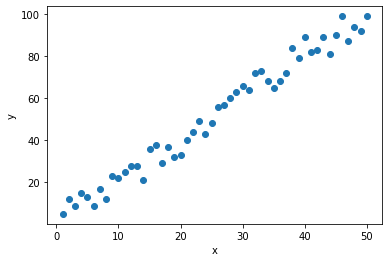

In [113]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

Note that when we created tensor $X$, we did <em>not</em> pass <tt>requires_grad=True</tt>. This means that $y$ doesn't have a gradient function, and <tt>y.backward()</tt> won't work. Since PyTorch is not tracking operations, it doesn't know the relationship between $X$ and $y$.

### Simple linear model
As a quick demonstration we'll show how the built-in <tt>nn.Linear()</tt> model preselects weight and bias values at random.

In [115]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1, dtype=torch.float)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


Without seeing any data, the model sets a random weight of 0.1060 and a bias of 0.9638.

### Model classes
PyTorch lets us define models as object classes that can store multiple model layers. In upcoming sections we'll set up several neural network layers, and determine how each layer should perform its forward pass to the next layer. For now, though, we only need a single <tt>linear</tt> layer.

In [132]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

<div class="alert alert-info"><strong>NOTE:</strong> The "Linear" model layer used here doesn't really refer to linear regression. Instead, it describes the type of neural network layer employed. Linear layers are also called "fully connected" or "dense" layers. Going forward our models may contain linear layers, convolutional layers, and more.</div>

When <tt>Model</tt> is instantiated, we need to pass in the size (dimensions) of the incoming and outgoing features. For our purposes we'll use (1,1).<br>As above, we can see the initial hyperparameters.

In [133]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


As models become more complex, it may be better to iterate over all the model parameters:

In [134]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


<div class="alert alert-info"><strong>NOTE:</strong> In the above example we had our Model class accept arguments for the number of input and output features.<br>For simplicity we can hardcode them into the Model:
         
<tt><font color=white>
class Model(torch.nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;self.linear = Linear(1,1)<br><br>
model = Model()
</font></tt><br><br>

Alternatively we can use default arguments:

<tt><font color=white>
class Model(torch.nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self, in_dim=1, out_dim=1):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;self.linear = Linear(in_dim,out_dim)<br><br>
model = Model()<br>
<em>\# or</em><br>
model = Model(i,o)</font></tt>
</div>

Now let's see the result when we pass a tensor into the model.

In [135]:
x = torch.tensor([2.0])
print(model.forward(x))   # equivalent to print(model(x))

tensor([1.1758], grad_fn=<AddBackward0>)


which is confirmed with $f(x) = (0.1060)(2.0)+(0.9638) = 1.1758$

### Plot the initial model
We can plot the untrained model against our dataset to get an idea of our starting point.

In [136]:
x1 = np.array([X.min(),X.max()])
print(x1)

[ 1. 50.]


In [137]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Initial weight: {w1:.8f}, Initial bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(y1)

Initial weight: 0.10597813, Initial bias: 0.96379614

[1.0697743 6.2627025]


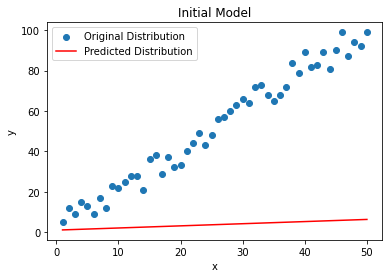

In [138]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(["Original Distribution","Predicted Distribution"])

## Set the loss function
We could write our own function to apply a Mean Squared Error (MSE) that follows<br>

$\begin{align}MSE &= \frac {1} {n} \sum_{i=1}^n {(y_i - \hat y_i)}^2 \\
&= \frac {1} {n} \sum_{i=1}^n {(y_i - (wx_i + b))}^2\end{align}$<br>

Fortunately PyTorch has it built in.<br>
<em>By convention, you'll see the variable name "criterion" used, but feel free to use something like "linear_loss_func" if that's clearer.</em>

In [139]:
criterion = nn.MSELoss()

### Set the optimization
Here we'll use <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent'>Stochastic Gradient Descent</a> (SGD) with an applied <a href='https://en.wikipedia.org/wiki/Learning_rate'>learning rate</a> (lr) of 0.001. Recall that the learning rate tells the optimizer how much to adjust each parameter on the next round of calculations. Too large a step and we run the risk of overshooting the minimum, causing the algorithm to diverge. Too small and it will take a long time to converge.

For more complicated (multivariate) data, you might also consider passing optional <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum'><tt>momentum</tt></a> and <a href='https://en.wikipedia.org/wiki/Tikhonov_regularization'><tt>weight_decay</tt></a> arguments. Momentum allows the algorithm to "roll over" small bumps to avoid local minima that can cause convergence too soon. Weight decay (also called an L2 penalty) applies to biases.

For more information, see <a href='https://pytorch.org/docs/stable/optim.html'><strong><tt>torch.optim</tt></strong></a>

In [140]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

# You'll sometimes see this as
# optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

### Train the model
An <em>epoch</em> is a single pass through the entire dataset. We want to pick a sufficiently large number of epochs to reach a plateau close to our known parameters of $\mathrm {weight} = 2,\; \mathrm {bias} = 1$

<div class="alert alert-info"><strong>Let's walk through the steps we're about to take:</strong><br>

1. Set a reasonably large number of passes<br>
<tt><font color=white>epochs = 50</font></tt><br>
2. Create a list to store loss values. This will let us view our progress afterward.<br>
<tt><font color=white>losses = []</font></tt><br>
<tt><font color=white>for i in range(epochs):</font></tt><br>
3. Bump "i" so that the printed report starts at 1<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;i+=1</font></tt><br>
4. Create a prediction set by running "X" through the current model parameters<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;y_pred = model.forward(X)</font></tt><br>
5. Calculate the loss<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;loss = criterion(y_pred, y)</font></tt><br>
6. Add the loss value to our tracking list<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;losses.append(loss)</font></tt><br>
7. Print the current line of results<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;print(f'epoch: {i:2} loss: {loss.item():10.8f}')</font></tt><br>
8. Gradients accumulate with every backprop. To prevent compounding we need to reset the stored gradient for each new epoch.<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.zero_grad()</font></tt><br>
9. Now we can backprop<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;loss.backward()</font></tt><br>
10. Finally, we can update the hyperparameters of our model<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.step()</font></tt>
</div>

In [141]:
epochs = 50
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}') 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 3057.21679688  weight: 0.10597813  bias: 0.96379614
epoch:  2  loss: 1588.53112793  weight: 3.33490038  bias: 1.06046367
epoch:  3  loss: 830.29998779  weight: 1.01483274  bias: 0.99226284
epoch:  4  loss: 438.85241699  weight: 2.68179965  bias: 1.04252183
epoch:  5  loss: 236.76152039  weight: 1.48402119  bias: 1.00766504
epoch:  6  loss: 132.42912292  weight: 2.34460592  bias: 1.03396463
epoch:  7  loss: 78.56572723  weight: 1.72622538  bias: 1.01632178
epoch:  8  loss: 50.75775909  weight: 2.17050409  bias: 1.03025162
epoch:  9  loss: 36.40125656  weight: 1.85124564  bias: 1.02149546
epoch: 10  loss: 28.98922920  weight: 2.08060074  bias: 1.02903891
epoch: 11  loss: 25.16238213  weight: 1.91576838  bias: 1.02487016
epoch: 12  loss: 23.18647385  weight: 2.03416562  bias: 1.02911627
epoch: 13  loss: 22.16612625  weight: 1.94905841  bias: 1.02731562
epoch: 14  loss: 21.63911057  weight: 2.01017213  bias: 1.02985907
epoch: 15  loss: 21.36677170  weight: 1.96622372  bias

### Plot the loss values
Let's see how loss changed over time

Text(0.5, 0, 'epoch')

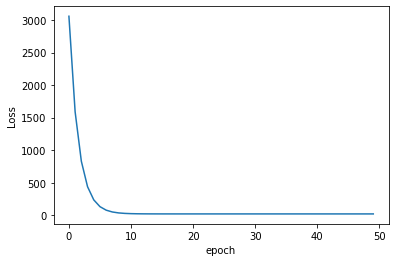

In [142]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

### Plot the result
Now we'll derive <tt>y1</tt> from the new model to plot the most recent best-fit line.

In [143]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.98381913, Current bias: 1.05575156

[ 1. 50.]
[  3.0395708 100.246704 ]


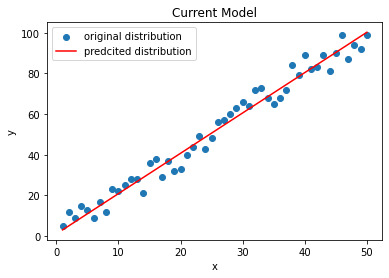

In [146]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(["original distribution", "predcited distribution"])

## Datasets with PyTorch

In this section we'll show how to:
* load data from outside files
* build random batches using PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>data</tt></strong></a> utilities<br>

At the end we'll briefly mention <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>.

### Imports

In [147]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data from files
We've seen how to load NumPy arrays into PyTorch, and anyone familiar with <tt>pandas.read_csv()</tt> can use it to prepare data before forming tensors. Here we'll load the <a href='https://en.wikipedia.org/wiki/Iris_flower_data_set'>iris flower dataset</a> saved as a .csv file.

In [148]:
df = pd.read_csv('Data/iris.csv')
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [149]:
df.shape

(150, 5)

### Plot the data

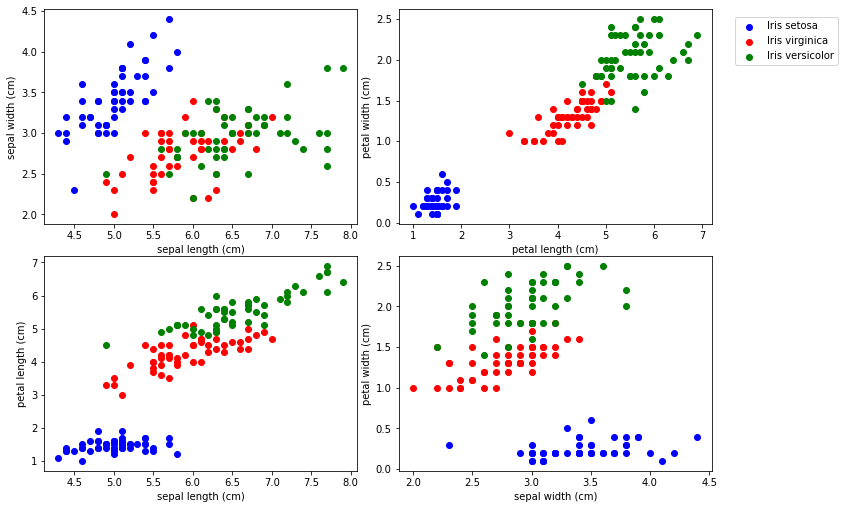

In [150]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

The iris dataset consists of 50 samples each from three species of Iris (<em>Iris setosa</em>, <em>Iris virginica</em> and <em>Iris versicolor</em>), for 150 total samples. We have four features (sepal length & width, petal length & width) and three unique labels:
0. <em>Iris setosa</em>
1. <em>Iris virginica</em>
2. <em>Iris versicolor</em>

### The classic method for building train/test split tensors
Before introducing PyTorch's Dataset and DataLoader classes, we'll take a quick look at the alternative.

In [151]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df.drop('target',axis=1).values,
                                                    df['target'].values, test_size=0.2,
                                                    random_state=33)

X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)
y_train = torch.LongTensor(train_y).reshape(-1, 1)
y_test = torch.LongTensor(test_y).reshape(-1, 1)

In [152]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 120
Labels: tensor([0, 1, 2])
Counts: tensor([42, 42, 36])


<div class="alert alert-success"><strong>NOTE: </strong>The importance of a balanced training set is discussed in <em>A systematic study of the class imbalance problem in convolutional neural networks</em> by Mateusz Buda, Atsuto Maki, Maciej A. Mazurowski (10/15/17, latest rev 10/13/18) <a href='https://arxiv.org/abs/1710.05381'>https://arxiv.org/abs/1710.05381</a><br>For example, the authors show that oversampling a less common class so that it matches the more common classes is always the preferred choice.</div>

In [153]:
X_train.size()

torch.Size([120, 4])

In [154]:
y_train.size()

torch.Size([120, 1])

<div class="alert alert-info"><strong>NOTE: </strong>It's up to us to remember which columns correspond to which features.</div>

### Using PyTorch's Dataset and DataLoader classes
A far better alternative is to leverage PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>Dataset</tt></strong></a> and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><strong><tt>DataLoader</strong></tt></a> classes.

Usually, to set up a Dataset specific to our investigation we would define our own custom class that inherits from <tt>torch.utils.data.Dataset</tt> (we'll do this in the CNN section). For now, we can use the built-in <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset'><strong><tt>TensorDataset</tt></strong></a> class.

In [155]:
from torch.utils.data import TensorDataset, DataLoader

data = df.drop('target',axis=1).values
labels = df['target'].values

iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))

In [156]:
len(iris)

150

In [157]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [158]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

Once we have a dataset we can wrap it with a DataLoader. This gives us a powerful sampler that provides single- or multi-process iterators over the dataset.

In [160]:
iris_loader = DataLoader(iris, batch_size=105, shuffle=True)

In [161]:
for i_batch, sample_batched in enumerate(iris_loader):
    print(i_batch, sample_batched)

0 [tensor([[5.1000, 3.8000, 1.9000, 0.4000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.0000, 4.5000, 1.5000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.4000, 3.4000, 1.5000, 0.4000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [6.2000, 2.9000, 4.3000

In [163]:
list(iris_loader)[0][1].bincount()

tensor([38, 35, 32])

In [17]:
next(iter(iris_loader))

[tensor([[5.4000, 3.7000, 1.5000, 0.2000],
         [4.7000, 3.2000, 1.3000, 0.2000],
         [6.1000, 3.0000, 4.6000, 1.4000],
         [4.3000, 3.0000, 1.1000, 0.1000],
         [5.0000, 3.5000, 1.3000, 0.3000],
         [7.2000, 3.2000, 6.0000, 1.8000],
         [4.8000, 3.4000, 1.9000, 0.2000],
         [6.4000, 3.1000, 5.5000, 1.8000],
         [6.6000, 3.0000, 4.4000, 1.4000],
         [6.8000, 3.2000, 5.9000, 2.3000],
         [6.4000, 3.2000, 4.5000, 1.5000],
         [5.0000, 2.3000, 3.3000, 1.0000],
         [6.0000, 2.2000, 4.0000, 1.0000],
         [6.7000, 3.1000, 5.6000, 2.4000],
         [6.0000, 2.7000, 5.1000, 1.6000],
         [6.2000, 2.8000, 4.8000, 1.8000],
         [5.4000, 3.4000, 1.7000, 0.2000],
         [5.4000, 3.9000, 1.7000, 0.4000],
         [4.6000, 3.2000, 1.4000, 0.2000],
         [5.2000, 2.7000, 3.9000, 1.4000],
         [6.0000, 3.0000, 4.8000, 1.8000],
         [5.7000, 2.8000, 4.5000, 1.3000],
         [7.7000, 2.6000, 6.9000, 2.3000],
         [5

### A Quick Note on Torchvision

PyTorch offers another powerful dataset tool called <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>, which is useful when working with image data. We'll go into a lot more detail in the Convolutional Neural Network (CNN) section. For now, just know that torchvision offers built-in image datasets like <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST</a> and <a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a>, as well as tools for transforming images into tensors.

## Basic PyTorch Neural Network
Now it's time to put the pieces together. In this section we'll:
* create a multi-layer deep learning model
* load data
* train and validate the model<br>

We'll also introduce a new step:
* save and load a trained model

Our goal is to develop a model capable of classifying an iris plant based on four features. This is a multi-class classification where each sample can belong to ONE of 3 classes (<em>Iris setosa</em>, <em>Iris virginica</em> or <em>Iris versicolor</em>). The network will have 4 input neurons (flower dimensions) and 3 output neurons (scores). Our loss function will compare the target label (ground truth) to the corresponding output score. 

<div class="alert alert-info"><strong>NOTE:</strong> Multi-class classifications usually involve converting the target vector to a one_hot encoded matrix. That is, if 5 labels show up as<br>
<pre style='background-color:rgb(100,120,100)'>tensor([0,2,1,0,1])</pre>
then we would encode them as:
<pre style='background-color:rgb(100,120,100)'>tensor([[1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0]])</pre>
This is easily accomplished with <a href='https://pytorch.org/docs/stable/nn.html#one-hot'><strong><tt>torch.nn.functional.one_hot()</tt></strong></a>.<br>
However, our loss function <a href='https://pytorch.org/docs/stable/nn.html#crossentropyloss'><strong><tt>torch.nn.CrossEntropyLoss()</tt></strong></a> takes care of this for us.</div>

### Imports

In [164]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Create a model class
For this exercise we're using the Iris dataset. Since a single straight line can't classify three flowers we should include at least one hidden layer in our model.

In the forward section we'll use the <a href='https://en.wikipedia.org/wiki/Rectifier_(neural_networks)'>rectified linear unit</a> (ReLU)  function<br>
$\quad f(x)=max(0,x)$<br>
as our activation function. This is available as a full module <a href='https://pytorch.org/docs/stable/nn.html#relu'><strong><tt>torch.nn.ReLU</tt></strong></a> or as just a functional call <a href='https://pytorch.org/docs/stable/nn.html#id27'><strong><tt>torch.nn.functional.relu</tt></strong></a>

In [165]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [166]:
# Instantiate the Model class using parameter defaults:
torch.manual_seed(32)
model = Model()

### Load the iris dataset

In [167]:
df = pd.read_csv('Data/iris.csv')
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

### Plot the dataset
The iris dataset has 4 features. To get an idea how they correlate we can plot four different relationships among them.<br>
We'll use the index positions of the columns to grab their names in pairs with <tt>plots = [(0,1),(2,3),(0,2),(1,3)]</tt>.<br>
Here <tt>(0,1)</tt> sets "sepal length (cm)" as <tt>x</tt> and "sepal width (cm)" as <tt>y</tt>

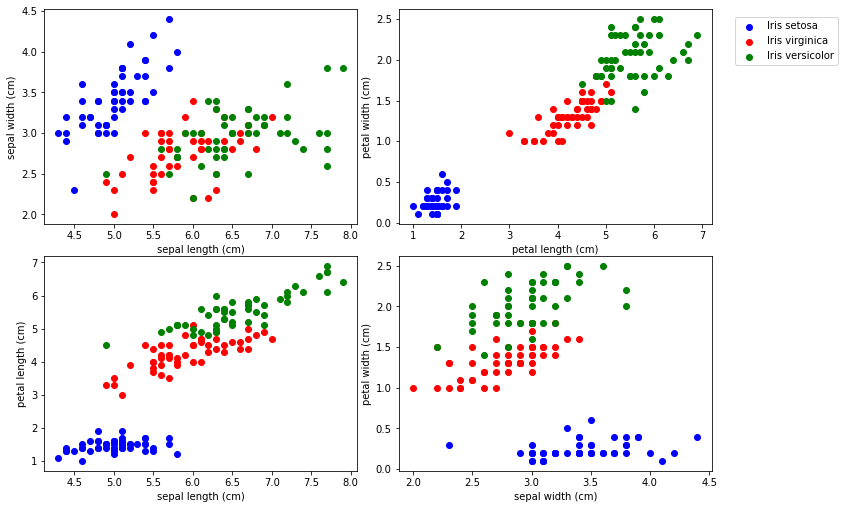

In [168]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

### Perform Train/Test/Split

In [169]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [170]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([120, 4]) torch.Size([120])
torch.Size([30, 4]) torch.Size([30])


### Prepare DataLoader
For this analysis we don't need to create a Dataset object, but we should take advantage of PyTorch's DataLoader tool. Even though our dataset is small (120 training samples), we'll load it into our model in two batches. This technique becomes very helpful with large datasets.

Note that scikit-learn already shuffled the source dataset before preparing train and test sets. We'll still benefit from the DataLoader shuffle utility for model training if we make multiple passes throught the dataset.

In [171]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

### Define loss equations and optimizations
As before, we'll utilize <a href='https://en.wikipedia.org/wiki/Cross_entropy'>Cross Entropy</a> with <a href='https://pytorch.org/docs/stable/nn.html#crossentropyloss'><strong><tt>torch.nn.CrossEntropyLoss()</tt></strong></a><br>
For the optimizer, we'll use a variation of Stochastic Gradient Descent called <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam'>Adam</a> (short for Adaptive Moment Estimation), with <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.Adam'><strong><tt>torch.optim.Adam()</tt></strong></a>

In [174]:
# FOR REDO
torch.manual_seed(4)
model = Model()

In [175]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Train the model

In [176]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.09568226
epoch: 11  loss: 0.98190629
epoch: 21  loss: 0.75652379
epoch: 31  loss: 0.49447373
epoch: 41  loss: 0.34981731
epoch: 51  loss: 0.22807984
epoch: 61  loss: 0.13547556
epoch: 71  loss: 0.09162237
epoch: 81  loss: 0.07378434
epoch: 91  loss: 0.06546316


### Plot the loss function

Text(0.5, 0, 'epoch')

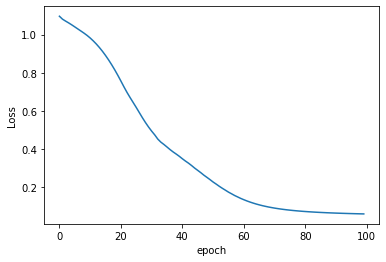

In [178]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

### Validate the model
Now we run the test set through the model to see if the loss calculation resembles the training data.

In [179]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06247790


In [180]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-0.3360,  7.3629,  1.3780])     1
 2. tensor([0.2770, 8.1552, 0.4267])        1
 3. tensor([ 11.9968,   6.1842, -19.1980])  0
 4. tensor([-2.0192,  7.9662,  4.2445])     1
 5. tensor([-6.1353,  7.9516, 11.0908])     2
 6. tensor([-10.2640,   8.3102,  17.9992])  2
 7. tensor([ 12.0541,   6.4316, -19.2913])  0
 8. tensor([ 12.9496,   6.4815, -20.7530])  0
 9. tensor([-5.7727,  8.2435, 10.5079])     2
10. tensor([-7.8872,  8.6126, 14.0726])     2
11. tensor([-8.7060,  8.6074, 15.4331])     2
12. tensor([ 11.6348,   5.8164, -18.6210])  0
13. tensor([-8.1013,  8.2331, 14.3883])     2
14. tensor([-2.0796,  7.7751,  4.3184])     1
15. tensor([-6.0833,  8.3916, 11.0582])     2
16. tensor([0.1354, 7.8658, 0.6406])        1
17. tensor([-4.0880,  7.7216,  7.6638])     2
18. tensor([ 13.1511,   6.5907, -21.0787])  0
19. tensor([-1.5649,  8.0220,  3.4751])     1
20. tensor([-6.2865,  8.9727, 11.4244])     2
21. tensor([ 12.3848,   6.2568, -19.8265])  0
22. tensor([ 13.8199,   7.0854, -2

Here we can see that `#17` was misclassified.

### Save the trained model to a file
Right now <strong><tt>model</tt></strong> has been trained and validated, and seems to correctly classify an iris 97% of the time. Let's save this to disk.<br>
The tools we'll use are <a href='https://pytorch.org/docs/stable/torch.html#torch.save'><strong><tt>torch.save()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/torch.html#torch.load'><strong><tt>torch.load()</tt></strong></a><br>

There are two basic ways to save a model.<br>

The first saves/loads the `state_dict` (learned parameters) of the model, but not the model class. The syntax follows:<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model.state_dict(), PATH)<br><br>
<strong>Load:</strong>&nbsp;model = TheModelClass(\*args, \*\*kwargs)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.load_state_dict(torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

The second saves the entire model including its class and parameters as a pickle file. Care must be taken if you want to load this into another notebook to make sure all the target data is brought in properly.<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model, PATH)<br><br>
<strong>Load:</strong>&nbsp;model = torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

In either method, you must call <tt>model.eval()</tt> to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

For more information visit https://pytorch.org/tutorials/beginner/saving_loading_models.html

#### Save the model

In [181]:
torch.save(model.state_dict(), 'IrisDatasetModel.pt')

#### Load a new model
We'll load a new model object and test it as we had before to make sure it worked.

In [183]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [184]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06247790


### Apply the model to classify new, unseen data

In [185]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

Let's plot this new iris in yellow to see where it falls in relation to the others:

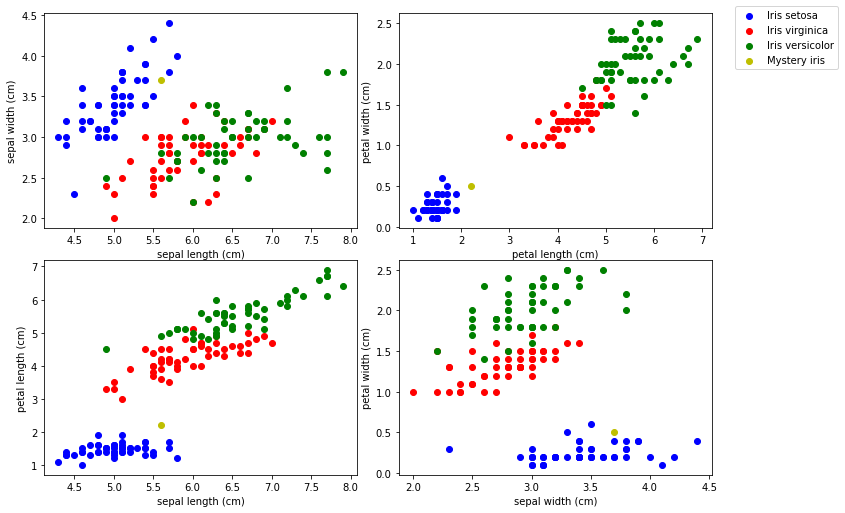

In [186]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

Now run it through the model:

In [187]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([ 12.2112,   7.1279, -19.5248])

Iris setosa


## Full Artificial Neural Network

In the last section we took in four continuous variables (lengths) to perform a classification. In this section we'll combine continuous and categorical data to perform a regression. The goal is to estimate the cost of a New York City cab ride from several inputs. The inspiration behind this code along is a recent <a href='https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'>Kaggle competition</a>.

<div class="alert alert-success"><strong>NOTE:</strong> In this notebook we'll perform a regression with one output value. In the next one we'll perform a binary classification with two output values.</div>

Here we're working with tabular data (spreadsheets, SQL tables, etc.) with columns of values that may or may not be relevant. As it happens, neural networks can learn to make connections we probably wouldn't have developed on our own. However, to do this we have to handle categorical values separately from continuous ones.


### Imports

In [188]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load the NYC Taxi Fares dataset
The <a href='https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'>Kaggle competition</a> provides a dataset with about 55 million records. The data contains only the pickup date & time, the latitude & longitude (GPS coordinates) of the pickup and dropoff locations, and the number of passengers. It is up to the contest participant to extract any further information. For instance, does the time of day matter? The day of the week? How do we determine the distance traveled from pairs of GPS coordinates?

For this exercise we've whittled the dataset down to just 120,000 records from April 11 to April 24, 2010. The records are randomly sorted. We'll show how to calculate distance from GPS coordinates, and how to create a pandas datatime object from a text column. This will let us quickly get information like day of the week, am vs. pm, etc.

Let's get started!

In [190]:
df = pd.read_csv('Data/NYCTaxiFares.csv')
df.head()

pickup_datetime  fare_amount  fare_class  pickup_longitude  \
0  2010-04-19 08:17:56 UTC          6.5           0        -73.992365   
1  2010-04-17 15:43:53 UTC          6.9           0        -73.990078   
2  2010-04-17 11:23:26 UTC         10.1           1        -73.994149   
3  2010-04-11 21:25:03 UTC          8.9           0        -73.990485   
4  2010-04-17 02:19:01 UTC         19.7           1        -73.990976   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.730521         -73.975499         40.744746                1  
1        40.740558         -73.974232         40.744114                1  
2        40.751118         -73.960064         40.766235                2  
3        40.756422         -73.971205         40.748192                1  
4        40.734202         -73.905956         40.743115                1

In [191]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

From this we see that fares range from \\$2.50 to \\$49.90, with a mean of \\$10.04 and a median of \\$7.70

### Calculate the distance traveled
The <a href='https://en.wikipedia.org/wiki/Haversine_formula'>haversine formula</a> calculates the distance on a sphere between two sets of GPS coordinates.<br>
Here we assign latitude values with $\varphi$ (phi) and longitude with $\lambda$ (lambda).

The distance formula works out to

${\displaystyle d=2r\arcsin \left({\sqrt {\sin ^{2}\left({\frac {\varphi _{2}-\varphi _{1}}{2}}\right)+\cos(\varphi _{1})\:\cos(\varphi _{2})\:\sin ^{2}\left({\frac {\lambda _{2}-\lambda _{1}}{2}}\right)}}\right)}$

where

$\begin{align} r&: \textrm {radius of the sphere (Earth's radius averages 6371 km)}\\
\varphi_1, \varphi_2&: \textrm {latitudes of point 1 and point 2}\\
\lambda_1, \lambda_2&: \textrm {longitudes of point 1 and point 2}\end{align}$

In [192]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [193]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

pickup_datetime  fare_amount  fare_class  pickup_longitude  \
0  2010-04-19 08:17:56 UTC          6.5           0        -73.992365   
1  2010-04-17 15:43:53 UTC          6.9           0        -73.990078   
2  2010-04-17 11:23:26 UTC         10.1           1        -73.994149   
3  2010-04-11 21:25:03 UTC          8.9           0        -73.990485   
4  2010-04-17 02:19:01 UTC         19.7           1        -73.990976   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.730521         -73.975499         40.744746                1   
1        40.740558         -73.974232         40.744114                1   
2        40.751118         -73.960064         40.766235                2   
3        40.756422         -73.971205         40.748192                1   
4        40.734202         -73.905956         40.743115                1   

    dist_km  
0  2.126312  
1  1.392307  
2  3.326763  
3  1.864129  
4  7.231321

## Add a datetime column and derive useful statistics
By creating a datetime object, we can extract information like "day of the week", "am vs. pm" etc.
Note that the data was saved in UTC time. Our data falls in April of 2010 which occurred during Daylight Savings Time in New York. For that reason, we'll make an adjustment to EDT using UTC-4 (subtracting four hours).

In [194]:
df['EDTdate'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.head()

pickup_datetime  fare_amount  fare_class  pickup_longitude  \
0  2010-04-19 08:17:56 UTC          6.5           0        -73.992365   
1  2010-04-17 15:43:53 UTC          6.9           0        -73.990078   
2  2010-04-17 11:23:26 UTC         10.1           1        -73.994149   
3  2010-04-11 21:25:03 UTC          8.9           0        -73.990485   
4  2010-04-17 02:19:01 UTC         19.7           1        -73.990976   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.730521         -73.975499         40.744746                1   
1        40.740558         -73.974232         40.744114                1   
2        40.751118         -73.960064         40.766235                2   
3        40.756422         -73.971205         40.748192                1   
4        40.734202         -73.905956         40.743115                1   

    dist_km             EDTdate  Hour AMorPM Weekday  
0  2.126312 2010-04-19 04:17:56     4     am     Mon  
1  1.392307 2010-04-17 11:43:53    11     am     Sat  
2  3.326763 2010-04-17 07:23:26     7     am     Sat  
3  1.864129 2010-04-11 17:25:03    17     pm     Sun  
4  7.231321 2010-04-16 22:19:01    22     pm     Fri

In [195]:
df['EDTdate'].min()

Timestamp('2010-04-11 00:00:10')

In [196]:
df['EDTdate'].max()

Timestamp('2010-04-24 23:59:42')

### Separate categorical from continuous columns

In [197]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [198]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_col = ['fare_amount']  # this column contains the labels

<div class="alert alert-info"><strong>NOTE:</strong> If you plan to use all of the columns in the data table, there's a shortcut to grab the remaining continuous columns:<br>
<pre style='background-color:rgb(217,237,247)'>cont_cols = [col for col in df.columns if col not in cat_cols + y_col]</pre>

Here we entered the continuous columns explicitly because there are columns we're not running through the model (pickup_datetime and EDTdate)</div>


### Categorify
Pandas offers a <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html'><strong>category dtype</strong></a> for converting categorical values to numerical codes. A dataset containing months of the year will be assigned 12 codes, one for each month. These will usually be the integers 0 to 11. Pandas replaces the column values with codes, and retains an index list of category values. In the steps ahead we'll call the categorical values "names" and the encodings "codes".

In [199]:
# Convert our three categorical columns to category dtypes.
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [200]:
df.dtypes

pickup_datetime              object
fare_amount                 float64
fare_class                    int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dist_km                     float64
EDTdate              datetime64[ns]
Hour                       category
AMorPM                     category
Weekday                    category
dtype: object

We can see that <tt>df['Hour']</tt> is a categorical feature by displaying some of the rows:

In [201]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

Here our categorical names are the integers 0 through 23, for a total of 24 unique categories. These values <em>also</em> correspond to the codes assigned to each name.

We can access the category names with <tt>Series.cat.categories</tt> or just the codes with <tt>Series.cat.codes</tt>. This will make more sense if we look at <tt>df['AMorPM']</tt>:

In [204]:
df['AMorPM'].cat.codes

0         0
1         0
2         0
3         1
4         1
         ..
119995    0
119996    0
119997    1
119998    0
119999    1
Length: 120000, dtype: int8

In [205]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [206]:
df['AMorPM'].head().cat.codes

0    0
1    0
2    0
3    1
4    1
dtype: int8

In [207]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [18]:
df['Weekday'].head().cat.codes

0    1
1    2
2    2
3    3
4    0
dtype: int8

<div class="alert alert-info"><strong>NOTE: </strong>NaN values in categorical data are assigned a code of -1. We don't have any in this particular dataset.</div>

Now we want to combine the three categorical columns into one input array using <a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.stack.html'><tt>numpy.stack</tt></a> We don't want the Series index, just the values.

In [211]:
np.stack([[1, 2, 3], [4, 5, 6]], 0)

array([[1, 2, 3],
       [4, 5, 6]])

In [213]:
hr = df['Hour'].cat.codes.values
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [214]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

cats = np.stack([hr, ampm, wkdy], 1)

cats[:5]

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       [17,  1,  3],
       [22,  1,  0]], dtype=int8)

<div class="alert alert-info"><strong>NOTE:</strong> This can be done in one line of code using a list comprehension:
<pre style='background-color:rgb(217,237,247)'>cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)</pre>

Don't worry about the dtype for now, we can make it int64 when we convert it to a tensor.</div>


## Convert numpy arrays to tensors

In [215]:
# Convert categorical variables to a tensor
cats = torch.tensor(cats, dtype=torch.int64) 
# this syntax is ok, since the source data is an array, not an existing tensor

cats[:5]

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3],
        [22,  1,  0]])

We can feed all of our continuous variables into the model as a tensor. Note that we're not normalizing the values here; we'll let the model perform this step.
<div class="alert alert-info"><strong>NOTE:</strong> We have to store <tt>conts</tt> and <tt>y</tt> as Float (float32) tensors, not Double (float64) in order for batch normalization to work properly.</div>

In [216]:
# Convert continuous variables to a tensor
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:5]

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        [ 40.7564, -73.9905,  40.7482, -73.9712,   1.0000,   1.8641],
        [ 40.7342, -73.9910,  40.7431, -73.9060,   1.0000,   7.2313]])

In [217]:
conts.type()

'torch.FloatTensor'

In [218]:
# Convert labels to a tensor
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1,1)

y[:5]

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        [ 8.9000],
        [19.7000]])

In [219]:
cats.shape

torch.Size([120000, 3])

In [220]:
conts.shape

torch.Size([120000, 6])

In [221]:
y.shape

torch.Size([120000, 1])

### Set an embedding size
The rule of thumb for determining the embedding size is to divide the number of unique entries in each column by 2, but not to exceed 50.

In [224]:
# This will set embedding sizes for Hours, AMvsPM and Weekdays
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

### Define a TabularModel
This somewhat follows the <a href='https://docs.fast.ai/tabular.models.html'>fast.ai library</a> The goal is to define a model based on the number of continuous columns (given by <tt>conts.shape[1]</tt>) plus the number of categorical columns and their embeddings (given by <tt>len(emb_szs)</tt> and <tt>emb_szs</tt> respectively). The output would either be a regression (a single float value), or a classification (a group of bins and their softmax values). For this exercise our output will be a single regression value. Note that we'll assume our data contains both categorical and continuous data. You can add boolean parameters to your own model class to handle a variety of datasets.

<div class="alert alert-info"><strong>Let's walk through the steps we're about to take. See below for more detailed illustrations of the steps.</strong><br>

1. Extend the base Module class, set up the following parameters:
   * <tt>emb_szs: </tt>list of tuples: each categorical variable size is paired with an embedding size
   * <tt>n_cont:  </tt>int: number of continuous variables
   * <tt>out_sz:  </tt>int: output size
   * <tt>layers:  </tt>list of ints: layer sizes
   * <tt>p:       </tt>float: dropout probability for each layer (for simplicity we'll use the same value throughout)
   
<tt><font color=white>class TabularModel(nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self, emb_szs, n_cont, out_sz, layers, p=0.5):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()</font></tt><br>

2. Set up the embedded layers with <a href='https://pytorch.org/docs/stable/nn.html#modulelist'><tt><strong>torch.nn.ModuleList()</strong></tt></a> and <a href='https://pytorch.org/docs/stable/nn.html#embedding'><tt><strong>torch.nn.Embedding()</strong></tt></a><br>Categorical data will be filtered through these Embeddings in the forward section.<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])</font></tt><br><br>
3. Set up a dropout function for the embeddings with <a href='https://pytorch.org/docs/stable/nn.html#dropout'><tt><strong>torch.nn.Dropout()</strong></tt></a> The default p-value=0.5<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;self.emb_drop = nn.Dropout(emb_drop)</font></tt><br><br>
4. Set up a normalization function for the continuous variables with <a href='https://pytorch.org/docs/stable/nn.html#batchnorm1d'><tt><strong>torch.nn.BatchNorm1d()</strong></tt></a><br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;self.bn_cont = nn.BatchNorm1d(n_cont)</font></tt><br><br>
5. Set up a sequence of neural network layers where each level includes a Linear function, an activation function (we'll use <a href='https://pytorch.org/docs/stable/nn.html#relu'><strong>ReLU</strong></a>), a normalization step, and a dropout layer. We'll combine the list of layers with <a href='https://pytorch.org/docs/stable/nn.html#sequential'><tt><strong>torch.nn.Sequential()</strong></tt></a><br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;self.bn_cont = nn.BatchNorm1d(n_cont)<br>
&nbsp;&nbsp;&nbsp;&nbsp;layerlist = []<br>
&nbsp;&nbsp;&nbsp;&nbsp;n_emb = sum((nf for ni,nf in emb_szs))<br>
&nbsp;&nbsp;&nbsp;&nbsp;n_in = n_emb + n_cont<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;for i in layers:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Linear(n_in,i)) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.ReLU(inplace=True))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.BatchNorm1d(i))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Dropout(p))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;n_in = i<br>
&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Linear(layers[-1],out_sz))<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;self.layers = nn.Sequential(*layerlist)</font></tt><br><br>
6. Define the forward method. Preprocess the embeddings and normalize the continuous variables before passing them through the layers.<br>Use <a href='https://pytorch.org/docs/stable/torch.html#torch.cat'><tt><strong>torch.cat()</strong></tt></a> to combine multiple tensors into one.<br>
<tt><font color=white>&nbsp;&nbsp;&nbsp;&nbsp;def forward(self, x_cat, x_cont):<br>
&nbsp;&nbsp;&nbsp;&nbsp;embeddings = []<br>
&nbsp;&nbsp;&nbsp;&nbsp;for i,e in enumerate(self.embeds):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;embeddings.append(e(x_cat[:,i]))<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = torch.cat(embeddings, 1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = self.emb_drop(x)<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;x_cont = self.bn_cont(x_cont)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = torch.cat([x, x_cont], 1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = self.layers(x)<br>
&nbsp;&nbsp;&nbsp;&nbsp;return x</font></tt>
</div>

<div class="alert alert-danger"><strong>Breaking down the embeddings steps</strong> (this code is for illustration purposes only.)</div>

In [222]:
# This is our source data
catz = cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [225]:
# This is passed in when the model is instantiated
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [226]:
# This is assigned inside the __init__() method
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [31]:
list(enumerate(selfembeds))

[(0, Embedding(24, 12)), (1, Embedding(2, 1)), (2, Embedding(7, 4))]

In [235]:
catz.shape

torch.Size([4, 3])

In [236]:
# This happens inside the forward() method
embeddingz = []
for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))
embeddingz

[tensor([[ 1.8417, -0.2837, -0.7026,  0.9711,  0.4294,  0.8364, -1.1848,  0.3927,
          -0.9458,  0.6490,  1.4444,  0.5714],
         [-1.1353,  0.0902,  0.3363,  0.8464, -1.1776, -0.2490, -1.1271, -0.5327,
           0.5478,  0.2850, -0.5962, -0.0875],
         [ 0.6092, -0.0526, -0.5090,  1.9597, -2.6770,  0.0338,  0.6480, -0.3108,
          -0.8344,  1.2324,  0.9555, -1.9756],
         [ 0.1504, -0.6900, -0.4894, -1.7272,  0.3362, -0.7398, -0.4180,  0.1941,
           1.3690, -1.5036, -1.4767,  0.7304]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.6220],
         [0.6220],
         [0.6220],
         [0.4341]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.5068, -1.3209,  0.2486, -1.5305],
         [-1.2628,  0.2574,  0.5675, -0.2091],
         [-1.2628,  0.2574,  0.5675, -0.2091],
         [ 1.2168,  0.8964, -0.1930, -0.1738]], grad_fn=<EmbeddingBackward0>)]

In [240]:
# We concatenate the embedding sections (12,1,4) into one (17)
z = torch.cat(embeddingz, dim = 1)
z

tensor([[ 1.8417, -0.2837, -0.7026,  0.9711,  0.4294,  0.8364, -1.1848,  0.3927,
         -0.9458,  0.6490,  1.4444,  0.5714,  0.6220, -0.5068, -1.3209,  0.2486,
         -1.5305],
        [-1.1353,  0.0902,  0.3363,  0.8464, -1.1776, -0.2490, -1.1271, -0.5327,
          0.5478,  0.2850, -0.5962, -0.0875,  0.6220, -1.2628,  0.2574,  0.5675,
         -0.2091],
        [ 0.6092, -0.0526, -0.5090,  1.9597, -2.6770,  0.0338,  0.6480, -0.3108,
         -0.8344,  1.2324,  0.9555, -1.9756,  0.6220, -1.2628,  0.2574,  0.5675,
         -0.2091],
        [ 0.1504, -0.6900, -0.4894, -1.7272,  0.3362, -0.7398, -0.4180,  0.1941,
          1.3690, -1.5036, -1.4767,  0.7304,  0.4341,  1.2168,  0.8964, -0.1930,
         -0.1738]], grad_fn=<CatBackward0>)

In [238]:
# This was assigned under the __init__() method
selfembdrop = nn.Dropout(.4)

In [239]:
z = selfembdrop(z)
z

tensor([[ 3.0694, -0.4728, -0.0000,  1.6185,  0.7157,  1.3940, -0.0000,  0.6545,
         -1.5764,  0.0000,  2.4073,  0.0000,  1.0367, -0.0000, -2.2014,  0.0000,
         -2.5508],
        [-0.0000,  0.1503,  0.0000,  0.0000, -1.9626, -0.0000, -1.8785, -0.8879,
          0.9129,  0.0000, -0.9936, -0.1459,  1.0367, -2.1047,  0.4290,  0.9458,
         -0.0000],
        [ 0.0000, -0.0876, -0.0000,  0.0000, -4.4616,  0.0563,  1.0800, -0.5180,
         -1.3907,  0.0000,  0.0000, -0.0000,  0.0000, -2.1047,  0.0000,  0.0000,
         -0.0000],
        [ 0.0000, -0.0000, -0.8157, -2.8786,  0.5603, -1.2330, -0.0000,  0.3235,
          2.2817, -2.5059, -0.0000,  0.0000,  0.7235,  0.0000,  1.4940, -0.0000,
         -0.0000]], grad_fn=<MulBackward0>)

<div class="alert alert-danger"><strong>This is how the categorical embeddings are passed into the layers.</strong></div>

In [241]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [242]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200,100], p=0.4)

In [244]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

### Define loss function & optimizer
PyTorch does not offer a built-in <a href='https://en.wikipedia.org/wiki/Root-mean-square_deviation'>RMSE Loss</a> function, and it would be nice to see this in place of MSE.<br>
For this reason, we'll simply apply the <tt>torch.sqrt()</tt> function to the output of MSELoss during training.

In [245]:
criterion = nn.MSELoss()  # we'll convert this to RMSE later
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Perform train/test splits
At this point our batch size is the entire dataset of 120,000 records. This will take a long time to train, so you might consider reducing this. We'll use 60,000. Recall that our tensors are already randomly shuffled.

In [246]:
batch_size = 60000
test_size = int(batch_size * .2)

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [247]:
len(cat_train)

48000

In [248]:
len(cat_test)

12000

### Train the model
Expect this to take 30 minutes or more! We've added code to tell us the duration at the end.

In [249]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) # RMSE
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 12.56900406
epoch:  26  loss: 10.90558720
epoch:  51  loss: 10.22911644
epoch:  76  loss: 9.74716187
epoch: 101  loss: 9.19737911
epoch: 126  loss: 8.42081642
epoch: 151  loss: 7.40498066
epoch: 176  loss: 6.24138880
epoch: 201  loss: 5.04117393
epoch: 226  loss: 4.22712564
epoch: 251  loss: 3.88598156
epoch: 276  loss: 3.75510907
epoch: 300  loss: 3.72177267

Duration: 38 seconds


### Plot the loss function

Text(0.5, 0, 'epoch')

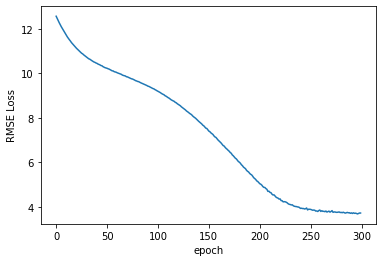

In [254]:
losses = [loss.item() for loss in losses]
plt.plot(range(epochs), losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')

### Validate the model
Here we want to run the entire test set through the model, and compare it to the known labels.<br>
For this step we don't want to update weights and biases, so we set <tt>torch.no_grad()</tt>

In [255]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 3.62411571


This means that on average, predicted values are within &plusmn;$3.31 of the actual value.

Now let's look at the first 50 predicted values:

In [256]:
print(f'{"PREDICTED":>12} {"ACTUAL":>8} {"DIFF":>8}')
for i in range(50):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f'{i+1:2}. {y_val[i].item():8.4f} {y_test[i].item():8.4f} {diff:8.4f}')

   PREDICTED   ACTUAL     DIFF
 1.   4.1602   2.9000   1.2602
 2.  14.4651   5.7000   8.7651
 3.   6.9766   7.7000   0.7234
 4.  14.6666  12.5000   2.1666
 5.   5.6680   4.1000   1.5680
 6.   5.5343   5.3000   0.2343
 7.   4.4665   3.7000   0.7665
 8.  19.7686  14.5000   5.2686
 9.   9.2317   5.7000   3.5317
10.  12.5788  10.1000   2.4788
11.   7.8125   4.5000   3.3125
12.   1.1172   6.1000   4.9828
13.   6.3301   6.9000   0.5699
14.  10.7137  14.1000   3.3863
15.   4.8021   4.5000   0.3021
16.  31.7048  34.1000   2.3952
17.   1.0708  12.5000  11.4292
18.   6.1732   4.1000   2.0732
19.   7.1626   8.5000   1.3374
20.   3.7815   5.3000   1.5185
21.  14.7375  11.3000   3.4375
22.   9.6364  10.5000   0.8636
23.  17.4182  15.3000   2.1182
24.  16.7962  14.9000   1.8962
25.  46.3019  49.5700   3.2681
26.   1.8683   5.3000   3.4317
27.   4.7335   3.7000   1.0335
28.   4.4671   6.5000   2.0329
29.  14.5037  14.1000   0.4037
30.   6.2075   4.9000   1.3075
31.   4.4534   3.7000   0.7534
32.  31.

So while many predictions were off by a few cents, some were off by \\$19.00. Feel free to change the batch size, test size, and number of epochs to obtain a better model.

### Save the model
We can save a trained model to a file in case we want to come back later and feed new data through it. The best practice is to save the state of the model (weights & biases) and not the full definition. Also, we want to ensure that only a trained model is saved, to prevent overwriting a previously saved model with an untrained one.<br>For more information visit <a href='https://pytorch.org/tutorials/beginner/saving_loading_models.html'>https://pytorch.org/tutorials/beginner/saving_loading_models.html</a>

In [257]:
# Make sure to save the model only after the training has happened!
if len(losses) == epochs:
    torch.save(model.state_dict(), 'TaxiFareRegrModel.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')

### Loading a saved model (starting from scratch)
We can load the trained weights and biases from a saved model. If we've just opened the notebook, we'll have to run standard imports and function definitions. To demonstrate, restart the kernel before proceeding.

In [258]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return r * c

class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        return self.layers(x)

Now define the model. Before we can load the saved settings, we need to instantiate our TabularModel with the parameters we used before (embedding sizes, number of continuous columns, output size, layer sizes, and dropout layer p-value). 

In [259]:
emb_szs = [(24, 12), (2, 1), (7, 4)]
model2 = TabularModel(emb_szs, 6, 1, [200,100], p=0.4)

Once the model is set up, loading the saved settings is a snap.

In [260]:
model2.load_state_dict(torch.load('TaxiFareRegrModel.pt'));
model2.eval() # be sure to run this step!

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

Next we'll define a function that takes in new parameters from the user, performs all of the preprocessing steps above, and passes the new data through our trained model.

In [261]:
def test_data(mdl): # pass in the name of the new model
    # INPUT NEW DATA
    plat = float(input('What is the pickup latitude?  '))
    plong = float(input('What is the pickup longitude? '))
    dlat = float(input('What is the dropoff latitude?  '))
    dlong = float(input('What is the dropoff longitude? '))
    psngr = int(input('How many passengers? '))
    dt = input('What is the pickup date and time?\nFormat as YYYY-MM-DD HH:MM:SS     ')
    
    # PREPROCESS THE DATA
    dfx_dict = {'pickup_latitude':plat,'pickup_longitude':plong,'dropoff_latitude':dlat,
         'dropoff_longitude':dlong,'passenger_count':psngr,'EDTdate':dt}
    dfx = pd.DataFrame(dfx_dict, index=[0])
    dfx['dist_km'] = haversine_distance(dfx,'pickup_latitude', 'pickup_longitude',
                                        'dropoff_latitude', 'dropoff_longitude')
    dfx['EDTdate'] = pd.to_datetime(dfx['EDTdate'])
    
    # We can skip the .astype(category) step since our fields are small,
    # and encode them right away
    dfx['Hour'] = dfx['EDTdate'].dt.hour
    dfx['AMorPM'] = np.where(dfx['Hour']<12,0,1) 
    dfx['Weekday'] = dfx['EDTdate'].dt.strftime("%a")
    dfx['Weekday'] = dfx['Weekday'].replace(['Fri','Mon','Sat','Sun','Thu','Tue','Wed'],
                                            [0,1,2,3,4,5,6]).astype('int64')
    # CREATE CAT AND CONT TENSORS
    cat_cols = ['Hour', 'AMorPM', 'Weekday']
    cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
                 'dropoff_longitude', 'passenger_count', 'dist_km']
    xcats = np.stack([dfx[col].values for col in cat_cols], 1)
    xcats = torch.tensor(xcats, dtype=torch.int64)
    xconts = np.stack([dfx[col].values for col in cont_cols], 1)
    xconts = torch.tensor(xconts, dtype=torch.float)
    
    # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
    with torch.no_grad():
        z = mdl(xcats, xconts)
    print(f'\nThe predicted fare amount is ${z.item():.2f}')

## Feed new data through the trained model
For convenience, here are the max and min values for each of the variables:
<table style="display: inline-block">
<tr><th>Column</th><th>Minimum</th><th>Maximum</th></tr>
<tr><td>pickup_latitude</td><td>40</td><td>41</td></tr>
<tr><td>pickup_longitude</td><td>-74.5</td><td>-73.3</td></tr>
<tr><td>dropoff_latitude</td><td>40</td><td>41</td></tr>
<tr><td>dropoff_longitude</td><td>-74.5</td><td>-73.3</td></tr>
<tr><td>passenger_count</td><td>1</td><td>5</td></tr>
<tr><td>EDTdate</td><td>2010-04-11 00:00:00</td><td>2010-04-24 23:59:42</td></tr>

<strong>Use caution!</strong> The distance between 1 degree of latitude (from 40 to 41) is 111km (69mi) and between 1 degree of longitude (from -73 to -74) is 85km (53mi). The longest cab ride in the dataset spanned a difference of only 0.243 degrees latitude and 0.284 degrees longitude. The mean difference for both latitude and longitude was about 0.02. To get a fair prediction, use values that fall close to one another.

In [262]:
z = test_data(model2)


The predicted fare amount is $2761.88


## Artificial Neural Network - CLASSIFICATION
In the last section we took in four continuous variables (lengths) to perform a classification. In this section we'll combine continuous and categorical data to perform a similar classification. The goal is to estimate the relative cost of a New York City cab ride from several inputs. The inspiration behind this code along is a recent <a href='https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'>Kaggle competition</a>.

<div class="alert alert-success"><strong>NOTE:</strong> This notebook differs from the previous regression notebook in that it uses <tt>'fare_class'</tt> for the <tt><strong>y</strong></tt> set, and the output contains two values instead of one. In this exercise we're training our model to perform a binary classification, and predict whether a fare is greater or less than $10.00.</div>


### Imports

In [263]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load the NYC Taxi Fares dataset
The <a href='https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'>Kaggle competition</a> provides a dataset with about 55 million records. The data contains only the pickup date & time, the latitude & longitude (GPS coordinates) of the pickup and dropoff locations, and the number of passengers. It is up to the contest participant to extract any further information. For instance, does the time of day matter? The day of the week? How do we determine the distance traveled from pairs of GPS coordinates?

For this exercise we've whittled the dataset down to just 120,000 records from April 11 to April 24, 2010. The records are randomly sorted. We'll show how to calculate distance from GPS coordinates, and how to create a pandas datatime object from a text column. This will let us quickly get information like day of the week, am vs. pm, etc.

Let's get started!

In [266]:
df = pd.read_csv('Data/NYCTaxiFares.csv')
df.head()

pickup_datetime  fare_amount  fare_class  pickup_longitude  \
0  2010-04-19 08:17:56 UTC          6.5           0        -73.992365   
1  2010-04-17 15:43:53 UTC          6.9           0        -73.990078   
2  2010-04-17 11:23:26 UTC         10.1           1        -73.994149   
3  2010-04-11 21:25:03 UTC          8.9           0        -73.990485   
4  2010-04-17 02:19:01 UTC         19.7           1        -73.990976   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.730521         -73.975499         40.744746                1  
1        40.740558         -73.974232         40.744114                1  
2        40.751118         -73.960064         40.766235                2  
3        40.756422         -73.971205         40.748192                1  
4        40.734202         -73.905956         40.743115                1

In [267]:
df['fare_class'].value_counts()

0    80000
1    40000
Name: fare_class, dtype: int64

Conveniently, 2/3 of the data have fares under \\$10, and 1/3 have fares \\$10 and above.

Fare classes correspond to fare amounts as follows:
<table style="display: inline-block">
<tr><th>Class</th><th>Values</th></tr>
<tr><td>0</td><td>< \$10.00</td></tr>
<tr><td>1</td><td>>= \$10.00</td></tr>
</table>

### Calculate the distance traveled
The <a href='https://en.wikipedia.org/wiki/Haversine_formula'>haversine formula</a> calculates the distance on a sphere between two sets of GPS coordinates.<br>
Here we assign latitude values with $\varphi$ (phi) and longitude with $\lambda$ (lambda).

The distance formula works out to

${\displaystyle d=2r\arcsin \left({\sqrt {\sin ^{2}\left({\frac {\varphi _{2}-\varphi _{1}}{2}}\right)+\cos(\varphi _{1})\:\cos(\varphi _{2})\:\sin ^{2}\left({\frac {\lambda _{2}-\lambda _{1}}{2}}\right)}}\right)}$

where

$\begin{align} r&: \textrm {radius of the sphere (Earth's radius averages 6371 km)}\\
\varphi_1, \varphi_2&: \textrm {latitudes of point 1 and point 2}\\
\lambda_1, \lambda_2&: \textrm {longitudes of point 1 and point 2}\end{align}$

In [268]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [269]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

pickup_datetime  fare_amount  fare_class  pickup_longitude  \
0  2010-04-19 08:17:56 UTC          6.5           0        -73.992365   
1  2010-04-17 15:43:53 UTC          6.9           0        -73.990078   
2  2010-04-17 11:23:26 UTC         10.1           1        -73.994149   
3  2010-04-11 21:25:03 UTC          8.9           0        -73.990485   
4  2010-04-17 02:19:01 UTC         19.7           1        -73.990976   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.730521         -73.975499         40.744746                1   
1        40.740558         -73.974232         40.744114                1   
2        40.751118         -73.960064         40.766235                2   
3        40.756422         -73.971205         40.748192                1   
4        40.734202         -73.905956         40.743115                1   

    dist_km  
0  2.126312  
1  1.392307  
2  3.326763  
3  1.864129  
4  7.231321

## Add a datetime column and derive useful statistics
By creating a datetime object, we can extract information like "day of the week", "am vs. pm" etc.
Note that the data was saved in UTC time. Our data falls in April of 2010 which occurred during Daylight Savings Time in New York. For that reason, we'll make an adjustment to EDT using UTC-4 (subtracting four hours).

In [270]:
df['EDTdate'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.head()

pickup_datetime  fare_amount  fare_class  pickup_longitude  \
0  2010-04-19 08:17:56 UTC          6.5           0        -73.992365   
1  2010-04-17 15:43:53 UTC          6.9           0        -73.990078   
2  2010-04-17 11:23:26 UTC         10.1           1        -73.994149   
3  2010-04-11 21:25:03 UTC          8.9           0        -73.990485   
4  2010-04-17 02:19:01 UTC         19.7           1        -73.990976   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.730521         -73.975499         40.744746                1   
1        40.740558         -73.974232         40.744114                1   
2        40.751118         -73.960064         40.766235                2   
3        40.756422         -73.971205         40.748192                1   
4        40.734202         -73.905956         40.743115                1   

    dist_km             EDTdate  Hour AMorPM Weekday  
0  2.126312 2010-04-19 04:17:56     4     am     Mon  
1  1.392307 2010-04-17 11:43:53    11     am     Sat  
2  3.326763 2010-04-17 07:23:26     7     am     Sat  
3  1.864129 2010-04-11 17:25:03    17     pm     Sun  
4  7.231321 2010-04-16 22:19:01    22     pm     Fri

In [271]:
df['EDTdate'].min()

Timestamp('2010-04-11 00:00:10')

In [272]:
df['EDTdate'].max()

Timestamp('2010-04-24 23:59:42')

## Separate categorical from continuous columns

In [273]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [274]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_col = ['fare_class']  # this column contains the labels

<div class="alert alert-info"><strong>NOTE:</strong> If you plan to use all of the columns in the data table, there's a shortcut to grab the remaining continuous columns:<br>
<pre style='background-color:rgb(217,237,247)'>cont_cols = [col for col in df.columns if col not in cat_cols + y_col]</pre>

Here we entered the continuous columns explicitly because there are columns we're not running through the model (fare_amount and EDTdate)</div>

## Categorify
Pandas offers a <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html'><strong>category dtype</strong></a> for converting categorical values to numerical codes. A dataset containing months of the year will be assigned 12 codes, one for each month. These will usually be the integers 0 to 11. Pandas replaces the column values with codes, and retains an index list of category values. In the steps ahead we'll call the categorical values "names" and the encodings "codes".

In [275]:
# Convert our three categorical columns to category dtypes.
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [276]:
df.dtypes

pickup_datetime              object
fare_amount                 float64
fare_class                    int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dist_km                     float64
EDTdate              datetime64[ns]
Hour                       category
AMorPM                     category
Weekday                    category
dtype: object

We can see that <tt>df['Hour']</tt> is a categorical feature by displaying some of the rows:

In [278]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

Here our categorical names are the integers 0 through 23, for a total of 24 unique categories. These values <em>also</em> correspond to the codes assigned to each name.

We can access the category names with <tt>Series.cat.categories</tt> or just the codes with <tt>Series.cat.codes</tt>. This will make more sense if we look at <tt>df['AMorPM']</tt>:

In [279]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [280]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [281]:
df['AMorPM'].head().cat.codes

0    0
1    0
2    0
3    1
4    1
dtype: int8

In [282]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [283]:
df['Weekday'].head().cat.codes

0    1
1    2
2    2
3    3
4    0
dtype: int8

<div class="alert alert-info"><strong>NOTE: </strong>NaN values in categorical data are assigned a code of -1. We don't have any in this particular dataset.</div>

Now we want to combine the three categorical columns into one input array using <a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.stack.html'><tt>numpy.stack</tt></a> We don't want the Series index, just the values.

In [284]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

cats = np.stack([hr, ampm, wkdy], 1)

cats[:5]

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       [17,  1,  3],
       [22,  1,  0]], dtype=int8)

<div class="alert alert-info"><strong>NOTE:</strong> This can be done in one line of code using a list comprehension:
<pre style='background-color:rgb(217,237,247)'>cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)</pre>

Don't worry about the dtype for now, we can make it int64 when we convert it to a tensor.</div>


## Convert numpy arrays to tensors

In [285]:
# Convert categorical variables to a tensor
cats = torch.tensor(cats, dtype=torch.int64)
# this syntax is ok, since the source data is an array, not an existing tensor

cats[:5]

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3],
        [22,  1,  0]])

We can feed all of our continuous variables into the model as a tensor. We're not normalizing the values here; we'll let the model perform this step.
<div class="alert alert-info"><strong>NOTE:</strong> We have to store <tt>conts</tt> and <tt>y</tt> as Float (float32) tensors, not Double (float64) in order for batch normalization to work properly.</div>

In [286]:
# Convert continuous variables to a tensor
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:5]

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        [ 40.7564, -73.9905,  40.7482, -73.9712,   1.0000,   1.8641],
        [ 40.7342, -73.9910,  40.7431, -73.9060,   1.0000,   7.2313]])

In [287]:
conts.type()

'torch.FloatTensor'

Note: the CrossEntropyLoss function we'll use below expects a 1d y-tensor, so we'll replace <tt>.reshape(-1,1)</tt> with <tt>.flatten()</tt> this time.

In [288]:
# Convert labels to a tensor
y = torch.tensor(df[y_col].values).flatten()

y[:5]

tensor([0, 0, 1, 0, 1])

In [289]:
cats.shape

torch.Size([120000, 3])

In [290]:
conts.shape

torch.Size([120000, 6])

In [291]:
y.shape

torch.Size([120000])

## Set an embedding size
The rule of thumb for determining the embedding size is to divide the number of unique entries in each column by 2, but not to exceed 50.

In [292]:
# This will set embedding sizes for Hours, AMvsPM and Weekdays
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

## Define a TabularModel
This somewhat follows the <a href='https://docs.fast.ai/tabular.models.html'>fast.ai library</a> The goal is to define a model based on the number of continuous columns (given by <tt>conts.shape[1]</tt>) plus the number of categorical columns and their embeddings (given by <tt>len(emb_szs)</tt> and <tt>emb_szs</tt> respectively). The output would either be a regression (a single float value), or a classification (a group of bins and their softmax values). For this exercise our output will be a single regression value. Note that we'll assume our data contains both categorical and continuous data. You can add boolean parameters to your own model class to handle a variety of datasets.

<div class="alert alert-info"><strong>Let's walk through the steps we're about to take. See below for more detailed illustrations of the steps.</strong><br>

1. Extend the base Module class, set up the following parameters:
   * <tt>emb_szs: </tt>list of tuples: each categorical variable size is paired with an embedding size
   * <tt>n_cont:  </tt>int: number of continuous variables
   * <tt>out_sz:  </tt>int: output size
   * <tt>layers:  </tt>list of ints: layer sizes
   * <tt>p:       </tt>float: dropout probability for each layer (for simplicity we'll use the same value throughout)
   
<tt><font color=black>class TabularModel(nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self, emb_szs, n_cont, out_sz, layers, p=0.5):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()</font></tt><br>

2. Set up the embedded layers with <a href='https://pytorch.org/docs/stable/nn.html#modulelist'><tt><strong>torch.nn.ModuleList()</strong></tt></a> and <a href='https://pytorch.org/docs/stable/nn.html#embedding'><tt><strong>torch.nn.Embedding()</strong></tt></a><br>Categorical data will be filtered through these Embeddings in the forward section.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])</font></tt><br><br>
3. Set up a dropout function for the embeddings with <a href='https://pytorch.org/docs/stable/nn.html#dropout'><tt><strong>torch.nn.Dropout()</strong></tt></a> The default p-value=0.5<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.emb_drop = nn.Dropout(emb_drop)</font></tt><br><br>
4. Set up a normalization function for the continuous variables with <a href='https://pytorch.org/docs/stable/nn.html#batchnorm1d'><tt><strong>torch.nn.BatchNorm1d()</strong></tt></a><br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.bn_cont = nn.BatchNorm1d(n_cont)</font></tt><br><br>
5. Set up a sequence of neural network layers where each level includes a Linear function, an activation function (we'll use <a href='https://pytorch.org/docs/stable/nn.html#relu'><strong>ReLU</strong></a>), a normalization step, and a dropout layer. We'll combine the list of layers with <a href='https://pytorch.org/docs/stable/nn.html#sequential'><tt><strong>torch.nn.Sequential()</strong></tt></a><br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.bn_cont = nn.BatchNorm1d(n_cont)<br>
&nbsp;&nbsp;&nbsp;&nbsp;layerlist = []<br>
&nbsp;&nbsp;&nbsp;&nbsp;n_emb = sum((nf for ni,nf in emb_szs))<br>
&nbsp;&nbsp;&nbsp;&nbsp;n_in = n_emb + n_cont<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;for i in layers:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Linear(n_in,i)) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.ReLU(inplace=True))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.BatchNorm1d(i))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Dropout(p))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;n_in = i<br>
&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Linear(layers[-1],out_sz))<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;self.layers = nn.Sequential(*layerlist)</font></tt><br><br>
6. Define the forward method. Preprocess the embeddings and normalize the continuous variables before passing them through the layers.<br>Use <a href='https://pytorch.org/docs/stable/torch.html#torch.cat'><tt><strong>torch.cat()</strong></tt></a> to combine multiple tensors into one.<br>
<tt><font color=black>def forward(self, x_cat, x_cont):<br>
&nbsp;&nbsp;&nbsp;&nbsp;embeddings = []<br>
&nbsp;&nbsp;&nbsp;&nbsp;for i,e in enumerate(self.embeds):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;embeddings.append(e(x_cat[:,i]))<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = torch.cat(embeddings, 1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = self.emb_drop(x)<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;x_cont = self.bn_cont(x_cont)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = torch.cat([x, x_cont], 1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = self.layers(x)<br>
&nbsp;&nbsp;&nbsp;&nbsp;return x</font></tt>
</div>

<div class="alert alert-danger"><strong>Breaking down the embeddings steps</strong> (this code is for illustration purposes only.)</div>

In [293]:
# This is our source data
catz = cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [294]:
# This is passed in when the model is instantiated
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [295]:
# This is assigned inside the __init__() method
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [296]:
list(enumerate(selfembeds))

[(0, Embedding(24, 12)), (1, Embedding(2, 1)), (2, Embedding(7, 4))]

In [297]:
# This happens inside the forward() method
embeddingz = []
for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))
embeddingz

[tensor([[ 0.7268,  0.0713,  0.0948,  0.1935,  1.6536,  0.3350, -0.9723,  2.2576,
           0.5259, -0.8132,  1.0265, -0.4972],
         [-0.7020,  0.4218,  0.1264, -0.2705,  1.7312, -0.0175, -0.8859,  0.1006,
          -0.8818,  2.1605, -0.3257, -0.5527],
         [ 0.1261, -0.6211, -1.2882,  0.1639, -0.7151,  0.4649,  0.7779,  1.6613,
          -1.1588,  1.2087,  0.5334, -0.9004],
         [-0.5262, -0.5038,  0.2831,  0.2782, -1.4458, -1.5889, -0.3890, -0.7310,
          -1.8204, -0.8545, -0.6321,  1.1033]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.9057],
         [-1.9057],
         [-1.9057],
         [ 0.3733]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.6732, -0.4798,  1.0815, -1.1311],
         [ 1.2737, -0.6798, -1.1873, -2.1049],
         [ 1.2737, -0.6798, -1.1873, -2.1049],
         [-1.5072,  1.0909,  0.2356, -2.2692]], grad_fn=<EmbeddingBackward0>)]

In [298]:
# We concatenate the embedding sections (12,1,4) into one (17)
z = torch.cat(embeddingz, 1)
z

tensor([[ 0.7268,  0.0713,  0.0948,  0.1935,  1.6536,  0.3350, -0.9723,  2.2576,
          0.5259, -0.8132,  1.0265, -0.4972, -1.9057, -0.6732, -0.4798,  1.0815,
         -1.1311],
        [-0.7020,  0.4218,  0.1264, -0.2705,  1.7312, -0.0175, -0.8859,  0.1006,
         -0.8818,  2.1605, -0.3257, -0.5527, -1.9057,  1.2737, -0.6798, -1.1873,
         -2.1049],
        [ 0.1261, -0.6211, -1.2882,  0.1639, -0.7151,  0.4649,  0.7779,  1.6613,
         -1.1588,  1.2087,  0.5334, -0.9004, -1.9057,  1.2737, -0.6798, -1.1873,
         -2.1049],
        [-0.5262, -0.5038,  0.2831,  0.2782, -1.4458, -1.5889, -0.3890, -0.7310,
         -1.8204, -0.8545, -0.6321,  1.1033,  0.3733, -1.5072,  1.0909,  0.2356,
         -2.2692]], grad_fn=<CatBackward0>)

In [299]:
# This was assigned under the __init__() method
selfembdrop = nn.Dropout(.4)

In [300]:
z = selfembdrop(z)
z

tensor([[ 1.2114,  0.1188,  0.1580,  0.3226,  0.0000,  0.5583, -1.6206,  3.7627,
          0.0000, -1.3554,  0.0000, -0.8287, -0.0000, -0.0000, -0.0000,  1.8025,
         -0.0000],
        [-1.1700,  0.0000,  0.0000, -0.4508,  2.8854, -0.0000, -1.4765,  0.1676,
         -1.4697,  3.6008, -0.5428, -0.9211, -0.0000,  2.1228, -1.1330, -1.9789,
         -0.0000],
        [ 0.2102, -1.0352, -0.0000,  0.0000, -0.0000,  0.7748,  0.0000,  2.7689,
         -1.9313,  2.0145,  0.8890, -1.5006, -3.1762,  2.1228, -1.1330, -0.0000,
         -0.0000],
        [-0.0000, -0.8397,  0.4719,  0.0000, -2.4097, -0.0000, -0.0000, -0.0000,
         -0.0000, -0.0000, -0.0000,  1.8388,  0.0000, -0.0000,  0.0000,  0.0000,
         -3.7820]], grad_fn=<MulBackward0>)

<div class="alert alert-danger"><strong>This is how the categorical embeddings are passed into the layers.</strong></div>

In [310]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [311]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 2, [200,100], p=0.4) # out_sz = 2

In [312]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

### Define loss function & optimizer
For our classification we'll replace the MSE loss function with <a href='https://pytorch.org/docs/stable/nn.html#crossentropyloss'><strong><tt>torch.nn.CrossEntropyLoss()</tt></strong></a><br>
For the optimizer, we'll continue to use <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.Adam'><strong><tt>torch.optim.Adam()</tt></strong></a>

In [313]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Perform train/test splits
At this point our batch size is the entire dataset of 120,000 records. To save time we'll use the first 60,000. Recall that our tensors are already randomly shuffled.

In [314]:
batch_size = 60000
test_size = 12000

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [315]:
len(cat_train)

48000

In [316]:
len(cat_test)

12000

## Train the model
Expect this to take 30 minutes or more! We've added code to tell us the duration at the end.

In [317]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.82983702
epoch:  26  loss: 0.37778980
epoch:  51  loss: 0.33751053
epoch:  76  loss: 0.31323501
epoch: 101  loss: 0.30390278
epoch: 126  loss: 0.29264045
epoch: 151  loss: 0.28529644
epoch: 176  loss: 0.28257105
epoch: 201  loss: 0.27608112
epoch: 226  loss: 0.26900011
epoch: 251  loss: 0.26408491
epoch: 276  loss: 0.26179600
epoch: 300  loss: 0.25743753

Duration: 38 seconds


### Plot the loss function

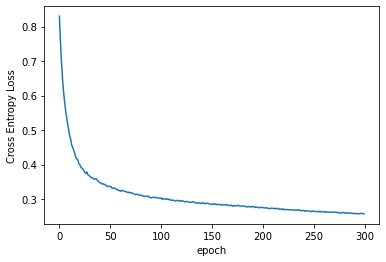

In [318]:
losses = [loss.item() for loss in losses]
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

### Validate the model

In [45]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.25455481


Now let's look at the first 50 predicted values

In [319]:
rows = 50
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([4.1602])              0      0   
tensor([14.4651])             0      0   
tensor([6.9766])              0      0   
tensor([14.6666])             0      1   
tensor([5.6680])              0      0   
tensor([5.5343])              0      0   
tensor([4.4665])              0      0   
tensor([19.7686])             0      1   
tensor([9.2317])              0      0   
tensor([12.5788])             0      1   
tensor([7.8125])              0      0   
tensor([1.1172])              0      0   
tensor([6.3301])              0      0   
tensor([10.7137])             0      1   
tensor([4.8021])              0      0   
tensor([31.7048])             0      1   
tensor([1.0708])              0      1   
tensor([6.1732])              0      0   
tensor([7.1626])              0      0   
tensor([3.7815])              0      0   
tensor([14.7375])             0      1   
tensor([9.6364])              0      1   
tensor([17.4182])             0   

## Save the model
Save the trained model to a file in case you want to come back later and feed new data through it.

In [320]:
# Make sure to save the model only after the training has happened!
if len(losses) == epochs:
    torch.save(model.state_dict(), 'TaxiFareClssModel.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')

## Loading a saved model (starting from scratch)
We can load the trained weights and biases from a saved model. If we've just opened the notebook, we'll have to run standard imports and function definitions. To demonstrate, restart the kernel before proceeding.

In [321]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return r * c

class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        return self.layers(x)

Now define the model. Before we can load the saved settings, we need to instantiate our TabularModel with the parameters we used before (embedding sizes, number of continuous columns, output size, layer sizes, and dropout layer p-value). 

In [322]:
emb_szs = [(24, 12), (2, 1), (7, 4)]
model2 = TabularModel(emb_szs, 6, 2, [200,100], p=0.4)

Once the model is set up, loading the saved settings is a snap.

In [323]:
model2.load_state_dict(torch.load('TaxiFareClssModel.pt'));
model2.eval() # be sure to run this step!

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

Next we'll define a function that takes in new parameters from the user, performs all of the preprocessing steps above, and passes the new data through our trained model.

In [324]:
def test_data(mdl): # pass in the name of the new model
    # INPUT NEW DATA
    plat = float(input('What is the pickup latitude?  '))
    plong = float(input('What is the pickup longitude? '))
    dlat = float(input('What is the dropoff latitude?  '))
    dlong = float(input('What is the dropoff longitude? '))
    psngr = int(input('How many passengers? '))
    dt = input('What is the pickup date and time?\nFormat as YYYY-MM-DD HH:MM:SS     ')
    
    # PREPROCESS THE DATA
    dfx_dict = {'pickup_latitude':plat,'pickup_longitude':plong,'dropoff_latitude':dlat,
         'dropoff_longitude':dlong,'passenger_count':psngr,'EDTdate':dt}
    dfx = pd.DataFrame(dfx_dict, index=[0])
    dfx['dist_km'] = haversine_distance(dfx,'pickup_latitude', 'pickup_longitude',
                                        'dropoff_latitude', 'dropoff_longitude')
    dfx['EDTdate'] = pd.to_datetime(dfx['EDTdate'])
    
    # We can skip the .astype(category) step since our fields are small,
    # and encode them right away
    dfx['Hour'] = dfx['EDTdate'].dt.hour
    dfx['AMorPM'] = np.where(dfx['Hour']<12,0,1) 
    dfx['Weekday'] = dfx['EDTdate'].dt.strftime("%a")
    dfx['Weekday'] = dfx['Weekday'].replace(['Fri','Mon','Sat','Sun','Thu','Tue','Wed'],
                                            [0,1,2,3,4,5,6]).astype('int64')
    # CREATE CAT AND CONT TENSORS
    cat_cols = ['Hour', 'AMorPM', 'Weekday']
    cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
                 'dropoff_longitude', 'passenger_count', 'dist_km']
    xcats = np.stack([dfx[col].values for col in cat_cols], 1)
    xcats = torch.tensor(xcats, dtype=torch.int64)
    xconts = np.stack([dfx[col].values for col in cont_cols], 1)
    xconts = torch.tensor(xconts, dtype=torch.float)
    
    # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
    with torch.no_grad():
        z = mdl(xcats, xconts).argmax().item()
    print(f'\nThe predicted fare class is {z}')

## Feed new data through the trained model
For convenience, here are the max and min values for each of the variables:
<table style="display: inline-block">
<tr><th>Column</th><th>Minimum</th><th>Maximum</th></tr>
<tr><td>pickup_latitude</td><td>40</td><td>41</td></tr>
<tr><td>pickup_longitude</td><td>-74.5</td><td>-73.3</td></tr>
<tr><td>dropoff_latitude</td><td>40</td><td>41</td></tr>
<tr><td>dropoff_longitude</td><td>-74.5</td><td>-73.3</td></tr>
<tr><td>passenger_count</td><td>1</td><td>5</td></tr>
<tr><td>EDTdate</td><td>2010-04-11 00:00:00</td><td>2010-04-24 23:59:42</td></tr>

<strong>Use caution!</strong> The distance between 1 degree of latitude (from 40 to 41) is 111km (69mi) and between 1 degree of longitude (from -73 to -74) is 85km (53mi). The longest cab ride in the dataset spanned a difference of only 0.243 degrees latitude and 0.284 degrees longitude. The mean difference for both latitude and longitude was about 0.02. To get a fair prediction, use values that fall close to one another.

In [5]:
test_data(model2)

What is the pickup latitude?  40.5
What is the pickup longitude? -73.9
What is the dropoff latitude?  40.52
What is the dropoff longitude? -73.92
How many passengers? 2
What is the pickup date and time?
Format as YYYY-MM-DD HH:MM:SS     2010-04-15 16:00:00

The predicted fare class is 1


Perfect! Where our regression predicted a fare value of ~\\$14, our binary classification predicts a fare greater than $10.

## Neural Network - Exercises
For these exercises we'll perform a binary classification on the Census Income dataset available from the <a href = 'http://archive.ics.uci.edu/ml/datasets/Adult'>UC Irvine Machine Learning Repository</a><br>
The goal is to determine if an individual earns more than $50K based on a set of continuous and categorical variables.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

## Census Income Dataset
For this exercises we're using the Census Income dataset available from the <a href='http://archive.ics.uci.edu/ml/datasets/Adult'>UC Irvine Machine Learning Repository</a>.

The full dataset has 48,842 entries. For this exercise we have reduced the number of records, fields and field entries, and have removed entries with null values. The file <strong>income.csv</strong> has	30,000 entries

Each entry contains the following information about an individual:
* <strong>age</strong>: the age of an individual as an integer from 18 to 90 (continuous)
* <strong>sex</strong>: Male or Female (categorical)
* <strong>education</strong>: represents the highest level of education achieved by an individual (categorical)
* <strong>education_num</strong>: represents education as an integer from 3 to 16 (categorical)
<div><table style="display: inline-block">
<tr><td>3</td><td>5th-6th</td><td>8</td><td>12th</td><td>13</td><td>Bachelors</td></tr>
<tr><td>4</td><td>7th-8th</td><td>9</td><td>HS-grad</td><td>14</td><td>Masters</td></tr>
<tr><td>5</td><td>9th</td><td>10</td><td>Some-college</td><td>15</td><td>Prof-school</td></tr>
<tr><td>6</td><td>10th</td><td>11</td><td>Assoc-voc</td><td>16</td><td>Doctorate</td></tr>
<tr><td>7</td><td>11th</td><td>12</td><td>Assoc-acdm</td></tr>
</table></div>
* <strong>marital-status</strong>: marital status of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Married</td><td>Divorced</td><td>Married-spouse-absent</td></tr>
<tr><td>Separated</td><td>Widowed</td><td>Never-married</td></tr>
</table></div>
* <strong>workclass</strong>: a general term to represent the employment status of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Local-gov</td><td>Private</td></tr>
<tr><td>State-gov</td><td>Self-emp</td></tr>
<tr><td>Federal-gov</td></tr>
</table></div>
* <strong>occupation</strong>: the general type of occupation of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Adm-clerical</td><td>Handlers-cleaners</td><td>Protective-serv</td></tr>
<tr><td>Craft-repair</td><td>Machine-op-inspct</td><td>Sales</td></tr>
<tr><td>Exec-managerial</td><td>Other-service</td><td>Tech-support</td></tr>
<tr><td>Farming-fishing</td><td>Prof-specialty</td><td>Transport-moving</td></tr>
</table></div>
* <strong>hours-per-week</strong>: the hours an individual has reported to work per week as an integer from 20 to 90 (continuous)
* <strong>income</strong>: whether or not an individual makes more than \\$50,000 annually (label)
* <strong>label</strong>: income represented as an integer (0: <=\\$50K, 1: >\\$50K) (optional label)

## Perform standard imports
Run the cell below to load the libraries needed for this exercise and the Census Income dataset.

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

In [38]:

df = pd.read_csv('Data/income.csv')

In [39]:
print(len(df))
df.head()

30000


age     sex    education  education-num marital-status    workclass  \
0   27    Male      HS-grad              9  Never-married      Private   
1   47    Male      Masters             14        Married    Local-gov   
2   59    Male      HS-grad              9       Divorced     Self-emp   
3   38  Female  Prof-school             15  Never-married  Federal-gov   
4   64  Female         11th              7        Widowed      Private   

        occupation  hours-per-week income  label  
0     Craft-repair              40  <=50K      0  
1  Exec-managerial              50   >50K      1  
2   Prof-specialty              20  <=50K      0  
3   Prof-specialty              57   >50K      1  
4  Farming-fishing              40  <=50K      0

In [40]:
df['label'].value_counts()

0    21700
1     8300
Name: label, dtype: int64

#### 1. Separate continuous, categorical and label column names
You should find that there are 5 categorical columns, 2 continuous columns and 1 label.<br>
In the case of <em>education</em> and <em>education-num</em> it doesn't matter which column you use. For the label column, be sure to use <em>label</em> and not <em>income</em>.<br>
Assign the variable names "cat_cols", "cont_cols" and "y_col" to the lists of names.

In [41]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [42]:
df.dtypes

age                int64
sex               object
education         object
education-num      int64
marital-status    object
workclass         object
occupation        object
hours-per-week     int64
income            object
label              int64
dtype: object

In [43]:
# CODE HERE
cat_cols = ["sex", "education", "marital-status", "workclass", "occupation"]
cont_cols = ["age", "hours-per-week"]
y_col = ["label"]

# RUN THIS CODE TO COMPARE RESULTS:
print(f'cat_cols  has {len(cat_cols)} columns')
print(f'cont_cols has {len(cont_cols)} columns')
print(f'y_col     has {len(y_col)} column')

cat_cols  has 5 columns
cont_cols has 2 columns
y_col     has 1 column


In [44]:
# DON'T WRITE HERE

#### 2. Convert categorical columns to category dtypes

In [45]:
# CODE HERE
for cat_col in cat_cols:
    df[cat_col] = df[cat_col].astype('category')


In [5]:
# DON'T WRITE HERE

#### Optional: Shuffle the dataset
The <strong>income.csv</strong> dataset is already shuffled. However, if you would like to try different configurations after completing the exercises, this is where you would want to shuffle the entire set.

In [46]:
# THIS CELL IS OPTIONAL
df = shuffle(df, random_state=101)
df.reset_index(drop=True, inplace=True)
df.head()

age     sex     education  education-num marital-status  workclass  \
0   23  Female       HS-grad              9  Never-married    Private   
1   37  Female   Prof-school             15        Married  State-gov   
2   34    Male  Some-college             10       Divorced    Private   
3   31    Male       HS-grad              9        Married    Private   
4   20  Female  Some-college             10  Never-married    Private   

       occupation  hours-per-week income  label  
0   Other-service              50  <=50K      0  
1  Prof-specialty              39   >50K      1  
2    Adm-clerical              40  <=50K      0  
3    Craft-repair              40   >50K      1  
4           Sales              25  <=50K      0

#### 3. Set the embedding sizes
Create a variable "cat_szs" to hold the number of categories in each variable.<br>
Then create a variable "emb_szs" to hold the list of (category size, embedding size) tuples.

In [47]:
df['sex'].cat.categories

Index(['Female', 'Male'], dtype='object')

In [48]:
# CODE HERE
cat_sz = [len(df[cat_col].cat.categories) for cat_col in cat_cols]
emb_sz = [(cat_size, min((cat_size+1)//2, 50)) for cat_size in cat_sz]
emb_sz

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

In [6]:
# DON'T WRITE HERE

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

### 4. Create an array of categorical values
Create a NumPy array called "cats" that contains a stack of each categorical column <tt>.cat.codes.values</tt><br>
Note: your output may contain different values. Ours came after performing the shuffle step shown above.

In [49]:
# CODE HERE
cats = [df[cat].cat.codes.values for cat in cat_cols]

cats = np.stack(cats, 1)

# RUN THIS CODE TO COMPARE RESULTS
cats[:5]

array([[ 0, 10,  3,  2,  6],
       [ 0, 12,  1,  4,  7],
       [ 1, 13,  0,  2,  0],
       [ 1, 10,  1,  2,  1],
       [ 0, 13,  3,  2,  9]], dtype=int8)

In [7]:
# DON'T WRITE HERE

array([[ 1, 10,  3,  2,  1],
       [ 1, 11,  1,  1,  2],
       [ 1, 10,  0,  3,  7],
       [ 0, 12,  3,  0,  7],
       [ 0,  1,  5,  2,  3]], dtype=int8)

### 5. Convert "cats" to a tensor
Convert the "cats" NumPy array to a tensor of dtype <tt>int64</tt>

In [50]:
# CODE HERE
cats = torch.tensor(cats, dtype=torch.int64)
cats

tensor([[ 0, 10,  3,  2,  6],
        [ 0, 12,  1,  4,  7],
        [ 1, 13,  0,  2,  0],
        ...,
        [ 1, 10,  1,  2,  2],
        [ 0,  6,  3,  2,  0],
        [ 1,  8,  5,  3,  9]])

In [8]:
# DON'T WRITE HERE

### 6. Create an array of continuous values
Create a NumPy array called "conts" that contains a stack of each continuous column.<br>
Note: your output may contain different values. Ours came after performing the shuffle step shown above.

In [51]:
# CODE HERE
conts = [df[cont].values for cont in cont_cols]

conts = np.stack(conts, 1)

# RUN THIS CODE TO COMPARE RESULTS
conts[:5]

array([[23, 50],
       [37, 39],
       [34, 40],
       [31, 40],
       [20, 25]])

In [9]:
# DON'T WRITE HERE

array([[27, 40],
       [47, 50],
       [59, 20],
       [38, 57],
       [64, 40]], dtype=int64)

### 7. Convert "conts" to a tensor
Convert the "conts" NumPy array to a tensor of dtype <tt>float32</tt>

In [52]:
# CODE HERE
conts = torch.tensor(conts, dtype=torch.float32)

# RUN THIS CODE TO COMPARE RESULTS
conts.dtype

torch.float32

In [10]:
# DON'T WRITE HERE

torch.float32

### 8. Create a label tensor
Create a tensor called "y" from the values in the label column. Be sure to flatten the tensor so that it can be passed into the CE Loss function.

In [54]:
# CODE HERE
y = df['label'].values
y = torch.tensor(y)
y


tensor([0, 1, 0,  ..., 1, 0, 1])

In [11]:
# DON'T WRITE HERE

### 9. Create train and test sets from <tt>cats</tt>, <tt>conts</tt>, and <tt>y</tt>
We use the entire batch of 30,000 records, but a smaller batch size will save time during training.<br>
We used a test size of 5,000 records, but you can choose another fixed value or a percentage of the batch size.<br>
Make sure that your test records remain separate from your training records, without overlap.<br>
To make coding slices easier, we recommend assigning batch and test sizes to simple variables like "b" and "t".

In [102]:
# CODE HERE
b = 30000 # suggested batch size
t = 5000  # suggested test size

cont_train = conts[:b-t]
cont_test = conts[b-t:]
cat_train = cats[:b-t]
cat_test = cats[b-t:]
y_train = y[:b-t]
y_test = y[b-t:]

print(f"cont_train : {cont_train.shape}")
print(f"cont_test : {cont_train.shape}")
print(f"cat_train : {cat_train.shape}")
print(f"cat_test : {cat_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.size()}")

cont_train : torch.Size([25000, 2])
cont_test : torch.Size([25000, 2])
cat_train : torch.Size([25000, 5])
cat_test : torch.Size([5000, 5])
y_train : torch.Size([25000])
y_test : torch.Size([5000])


In [12]:
# DON'T WRITE HERE

### Define the model class
Run the cell below to define the TabularModel model class we've used before.

In [66]:
emb_sz

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

In [69]:
cat_train

tensor([[ 0, 10,  3,  2,  6],
        [ 0, 12,  1,  4,  7],
        [ 1, 13,  0,  2,  0],
        ...,
        [ 1, 13,  1,  2,  5],
        [ 0,  8,  3,  2,  0],
        [ 1,  8,  1,  2,  0]])

In [72]:
emb_layer = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_sz])

In [86]:
cat_test[:, 0]

tensor([1, 0, 0,  ..., 1, 0, 1])

In [168]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        # Call the parent __init__
        super().__init__()
   
        # Set up the embedding, dropout, and batch normalization layer attributes
        self.emb_layer = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.drp_out = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        # Assign a variable to hold a list of layers
        layerlist = []
        # Assign a variable to store the number of embedding and continuous layers
        n_cat = np.sum([nf for ni, nf in emb_sz])
        n_in = n_cont + n_cat
        # Iterate through the passed-in "layers" parameter (ie, [200,100]) to build a list of layers
        for i in layers:
            #append linear layer
            layerlist.append(nn.Linear(n_in, i))
            #append activation function
            layerlist.append(nn.ReLU(inplace=True))
            #append batch normalization
            layerlist.append(nn.BatchNorm1d(i))
            #append dropout layer
            layerlist.append(nn.Dropout(p))
            #reset n_in
            n_in = i
        layerlist.append(nn.Linear(layers[-1], out_sz))
        # Convert the list of layers into an attribute
        self.layers = nn.Sequential(*layerlist)
  
    def forward(self, x_cat, x_cont):
        # Extract embedding values from the incoming categorical data
        embeddings = []
        for i,e in enumerate(self.emb_layer):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x  = self.drp_out(x)
        # Normalize the incoming continuous data
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x_cont, x], 1)
        # Set up model layers
        return self.layers(x)


### 10. Set the random seed
To obtain results that can be recreated, set a torch manual_seed (we used 33).

In [139]:
# CODE HERE
torch.manual_seed(33)

In [98]:
# DON'T WRITE HERE

### 11. Create a TabularModel instance
Create an instance called "model" with one hidden layer containing 50 neurons and a dropout layer p-value of 0.4

In [169]:
# CODE HERE
model = TabularModel(emb_sz, 2, 2, [50], 0.4)

# RUN THIS CODE TO COMPARE RESULTS
model

TabularModel(
  (emb_layer): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(12, 6)
  )
  (drp_out): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=22, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

In [15]:
# DON'T WRITE HERE

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(12, 6)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=22, out_features=50, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

### 12. Define the loss and optimization functions
Create a loss function called "criterion" using CrossEntropyLoss<br>
Create an optimization function called "optimizer" using Adam, with a learning rate of 0.001

In [170]:
# CODE HERE
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



In [16]:
# DON'T WRITE HERE

### Train the model
Run the cell below to train the model through 300 epochs. Remember, results may vary!<br>
After completing the exercises, feel free to come back to this section and experiment with different parameters.

In [112]:
cat_train.shape, cont_train.shape

(torch.Size([25000, 5]), torch.Size([25000, 2]))

In [171]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, cont_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

5
epoch:   1  loss: 0.89055532
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
epoch:  26  loss: 0.60918289
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
epoch:  51  loss: 0.51481241
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
epoch:  76  loss: 0.46739167
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
epoch: 101  loss: 0.43212327
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
epoch: 126  loss: 0.40339988
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
epoch: 151  loss: 0.38148421
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
epoch: 176  loss: 0.36245692
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
epoch: 201  loss: 0.35026625
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
epoch: 226  loss: 0.33853665
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
epoch: 251  loss: 0.32719064
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
epoch: 276  loss: 0.31840596
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
epoch: 300  loss: 0.31245685

Duration: 8 seconds


### 13. Plot the Cross Entropy Loss against epochs
Results may vary. The shape of the plot is what matters.

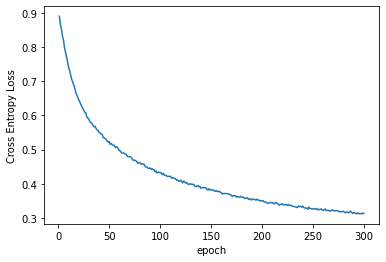

In [172]:
# CODE HERE
losses = [loss.item() for loss in losses]
plt.plot(range(1, epochs+1), losses)
plt.xlabel("epoch")
plt.ylabel("Cross Entropy Loss")
plt.show()


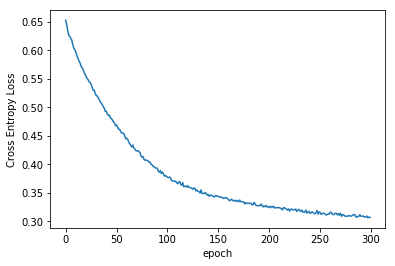

In [18]:
# DON'T WRITE HERE

### 14. Evaluate the test set
With torch set to <tt>no_grad</tt>, pass <tt>cat_test</tt> and <tt>con_test</tt> through the trained model. Create a validation set called "y_val". Compare the output to <tt>y_test</tt> using the loss function defined above. Results may vary.

In [174]:
# CODE HERE
model.eval()
with torch.no_grad():
    y_pred = model(cat_test, cont_test)
    loss = criterion(y_pred, y_test)

# RUN THIS CODE TO COMPARE RESULTS
print(f'CE Loss: {loss:.8f}')

5
CE Loss: 0.30330011


In [19]:
# TO EVALUATE THE TEST SET

CE Loss: 0.30774996


### 15. Calculate the overall percent accuracy
Using a for loop, compare the argmax values of the <tt>y_val</tt> validation set to the <tt>y_test</tt> set.

In [161]:
# CODE HERE
rows = 5000
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    #print(f'{str(y_pred[i]):26} {y_pred[i].argmax():^7}{y_test[i]:^7}')
    if y_pred[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')





MODEL OUTPUT               ARGMAX  Y_TEST

4199 out of 5000 = 83.98% correct


In [167]:
(y_test == 0).sum(), (y_test == 1).sum()

(tensor(3579), tensor(1421))

In [20]:
# DON'T WRITE HERE


4255 out of 5000 = 85.10% correct


### BONUS: Feed new data through the trained model
See if you can write a function that allows a user to input their own values, and generates a prediction.<br>
<strong>HINT</strong>:<br>There's no need to build a DataFrame. You can use inputs to populate column variables, convert them to embeddings with a context dictionary, and pass the embedded values directly into the tensor constructors:<br>
<pre>mar = input("What is the person's marital status? ")
mar_d = dict(Divorced=0, Married=1, Married-spouse-absent=2, Never-married=3, Separated=4, Widowed=5)
mar = mar_d[mar]
cats = torch.tensor([..., ..., mar, ..., ...], dtype=torch.int64).reshape(1,-1)</pre>
Make sure that names are put in alphabetical order before assigning numbers.

Also, be sure to run <tt>model.eval()</tt> before passing new date through. Good luck!

In [ ]:
# WRITE YOUR CODE HERE:


In [ ]:
# RUN YOUR CODE HERE:


In [21]:
# DON'T WRITE HERE

What is the person's age? (18-90)  22
What is the person's sex? (Male/Female) male
What is the person's education level? (3-16) 12
What is the person's marital status? married
What is the person's workclass? private
What is the person's occupation? sales
How many hours/week are worked? (20-90)  40

The predicted label is 0


# Neural Network Exercises - SOLUTIONS
For these exercises we'll perform a binary classification on the Census Income dataset available from the <a href = 'http://archive.ics.uci.edu/ml/datasets/Adult'>UC Irvine Machine Learning Repository</a><br>
The goal is to determine if an individual earns more than $50K based on a set of continuous and categorical variables.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

## Census Income Dataset
For this exercises we're using the Census Income dataset available from the <a href='http://archive.ics.uci.edu/ml/datasets/Adult'>UC Irvine Machine Learning Repository</a>.

The full dataset has 48,842 entries. For this exercise we have reduced the number of records, fields and field entries, and have removed entries with null values. The file <strong>income.csv</strong> has	30,000 entries

Each entry contains the following information about an individual:
* <strong>age</strong>: the age of an individual as an integer from 18 to 90 (continuous)
* <strong>sex</strong>: Male or Female (categorical)
* <strong>education</strong>: represents the highest level of education achieved by an individual (categorical)
* <strong>education_num</strong>: represents education as an integer from 3 to 16 (categorical)
<div><table style="display: inline-block">
<tr><td>3</td><td>5th-6th</td><td>8</td><td>12th</td><td>13</td><td>Bachelors</td></tr>
<tr><td>4</td><td>7th-8th</td><td>9</td><td>HS-grad</td><td>14</td><td>Masters</td></tr>
<tr><td>5</td><td>9th</td><td>10</td><td>Some-college</td><td>15</td><td>Prof-school</td></tr>
<tr><td>6</td><td>10th</td><td>11</td><td>Assoc-voc</td><td>16</td><td>Doctorate</td></tr>
<tr><td>7</td><td>11th</td><td>12</td><td>Assoc-acdm</td></tr>
</table></div>
* <strong>marital-status</strong>: marital status of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Married</td><td>Divorced</td><td>Married-spouse-absent</td></tr>
<tr><td>Separated</td><td>Widowed</td><td>Never-married</td></tr>
</table></div>
* <strong>workclass</strong>: a general term to represent the employment status of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Local-gov</td><td>Private</td></tr>
<tr><td>State-gov</td><td>Self-emp</td></tr>
<tr><td>Federal-gov</td></tr>
</table></div>
* <strong>occupation</strong>: the general type of occupation of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Adm-clerical</td><td>Handlers-cleaners</td><td>Protective-serv</td></tr>
<tr><td>Craft-repair</td><td>Machine-op-inspct</td><td>Sales</td></tr>
<tr><td>Exec-managerial</td><td>Other-service</td><td>Tech-support</td></tr>
<tr><td>Farming-fishing</td><td>Prof-specialty</td><td>Transport-moving</td></tr>
</table></div>
* <strong>hours-per-week</strong>: the hours an individual has reported to work per week as an integer from 20 to 90 (continuous)
* <strong>income</strong>: whether or not an individual makes more than \\$50,000 annually (label)
* <strong>label</strong>: income represented as an integer (0: <=\\$50K, 1: >\\$50K) (optional label)

## Perform standard imports
Run the cell below to load the libraries needed for this exercise and the Census Income dataset.

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

df = pd.read_csv('../Data/income.csv')

In [2]:
print(len(df))
df.head()

30000


age     sex    education  education-num marital-status    workclass  \
0   27    Male      HS-grad              9  Never-married      Private   
1   47    Male      Masters             14        Married    Local-gov   
2   59    Male      HS-grad              9       Divorced     Self-emp   
3   38  Female  Prof-school             15  Never-married  Federal-gov   
4   64  Female         11th              7        Widowed      Private   

        occupation  hours-per-week income  label  
0     Craft-repair              40  <=50K      0  
1  Exec-managerial              50   >50K      1  
2   Prof-specialty              20  <=50K      0  
3   Prof-specialty              57   >50K      1  
4  Farming-fishing              40  <=50K      0

In [3]:
df['label'].value_counts()

0    21700
1     8300
Name: label, dtype: int64

### 1. Separate continuous, categorical and label column names
You should find that there are 5 categorical columns, 2 continuous columns and 1 label.<br>
In the case of <em>education</em> and <em>education-num</em> it doesn't matter which column you use. For the label column, be sure to use <em>label</em> and not <em>income</em>.<br>
Assign the variable names "cat_cols", "cont_cols" and "y_col" to the lists of names.

In [ ]:
df.columns

In [ ]:
# CODE HERE







# RUN THIS CODE TO COMPARE RESULTS:
print(f'cat_cols  has {len(cat_cols)} columns')
print(f'cont_cols has {len(cont_cols)} columns')
print(f'y_col     has {len(y_col)} column')

In [4]:
# DON'T WRITE HERE
cat_cols = ['sex', 'education', 'marital-status', 'workclass', 'occupation']
cont_cols = ['age', 'hours-per-week']
y_col = ['label']

print(f'cat_cols  has {len(cat_cols)} columns')  # 5
print(f'cont_cols has {len(cont_cols)} columns') # 2
print(f'y_col     has {len(y_col)} column')      # 1

cat_cols  has 5 columns
cont_cols has 2 columns
y_col     has 1 column


### 2. Convert categorical columns to category dtypes

In [ ]:
# CODE HERE







In [5]:
# DON'T WRITE HERE
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

### Optional: Shuffle the dataset
The <strong>income.csv</strong> dataset is already shuffled. However, if you would like to try different configurations after completing the exercises, this is where you would want to shuffle the entire set.

In [ ]:
# THIS CELL IS OPTIONAL
df = shuffle(df, random_state=101)
df.reset_index(drop=True, inplace=True)
df.head()

### 3. Set the embedding sizes
Create a variable "cat_szs" to hold the number of categories in each variable.<br>
Then create a variable "emb_szs" to hold the list of (category size, embedding size) tuples.

In [ ]:
# CODE HERE




In [6]:
# DON'T WRITE HERE
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

### 4. Create an array of categorical values
Create a NumPy array called "cats" that contains a stack of each categorical column <tt>.cat.codes.values</tt><br>
Note: your output may contain different values. Ours came after performing the shuffle step shown above.

In [ ]:
# CODE HERE







# RUN THIS CODE TO COMPARE RESULTS
cats[:5]

In [7]:
# DON'T WRITE HERE
sx = df['sex'].cat.codes.values
ed = df['education'].cat.codes.values
ms = df['marital-status'].cat.codes.values
wc = df['workclass'].cat.codes.values
oc = df['occupation'].cat.codes.values

cats = np.stack([sx,ed,ms,wc,oc], 1)

cats[:5]

array([[ 1, 10,  3,  2,  1],
       [ 1, 11,  1,  1,  2],
       [ 1, 10,  0,  3,  7],
       [ 0, 12,  3,  0,  7],
       [ 0,  1,  5,  2,  3]], dtype=int8)

### 5. Convert "cats" to a tensor
Convert the "cats" NumPy array to a tensor of dtype <tt>int64</tt>

In [ ]:
# CODE HERE


In [8]:
# DON'T WRITE HERE
cats = torch.tensor(cats, dtype=torch.int64)

### 6. Create an array of continuous values
Create a NumPy array called "conts" that contains a stack of each continuous column.<br>
Note: your output may contain different values. Ours came after performing the shuffle step shown above.

In [ ]:
# CODE HERE


# RUN THIS CODE TO COMPARE RESULTS
conts[:5]

In [9]:
# DON'T WRITE HERE
conts = np.stack([df[col].values for col in cont_cols], 1)
conts[:5]

array([[27, 40],
       [47, 50],
       [59, 20],
       [38, 57],
       [64, 40]], dtype=int64)

### 7. Convert "conts" to a tensor
Convert the "conts" NumPy array to a tensor of dtype <tt>float32</tt>

In [ ]:
# CODE HERE


# RUN THIS CODE TO COMPARE RESULTS
conts.dtype

In [10]:
# DON'T WRITE HERE
conts = torch.tensor(conts, dtype=torch.float)
conts.dtype

torch.float32

### 8. Create a label tensor
Create a tensor called "y" from the values in the label column. Be sure to flatten the tensor so that it can be passed into the CE Loss function.

In [ ]:
# CODE HERE


In [11]:
# DON'T WRITE HERE
y = torch.tensor(df[y_col].values).flatten()

### 9. Create train and test sets from <tt>cats</tt>, <tt>conts</tt>, and <tt>y</tt>
We use the entire batch of 30,000 records, but a smaller batch size will save time during training.<br>
We used a test size of 5,000 records, but you can choose another fixed value or a percentage of the batch size.<br>
Make sure that your test records remain separate from your training records, without overlap.<br>
To make coding slices easier, we recommend assigning batch and test sizes to simple variables like "b" and "t".

In [ ]:
# CODE HERE
b = 30000 # suggested batch size
t = 5000  # suggested test size







In [12]:
# DON'T WRITE HERE
b = 30000 # suggested batch size
t = 5000  # suggested test size

cat_train = cats[:b-t]
cat_test  = cats[b-t:b]
con_train = conts[:b-t]
con_test  = conts[b-t:b]
y_train   = y[:b-t]
y_test    = y[b-t:b]

### Define the model class
Run the cell below to define the TabularModel model class we've used before.

In [13]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        # Call the parent __init__
        super().__init__()
        
        # Set up the embedding, dropout, and batch normalization layer attributes
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        # Assign a variable to hold a list of layers
        layerlist = []
        
        # Assign a variable to store the number of embedding and continuous layers
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        # Iterate through the passed-in "layers" parameter (ie, [200,100]) to build a list of layers
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        
        # Convert the list of layers into an attribute
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        # Extract embedding values from the incoming categorical data
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        # Perform an initial dropout on the embeddings
        x = self.emb_drop(x)
        
        # Normalize the incoming continuous data
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        
        # Set up model layers
        x = self.layers(x)
        return x

### 10. Set the random seed
To obtain results that can be recreated, set a torch manual_seed (we used 33).

In [ ]:
# CODE HERE


In [14]:
# DON'T WRITE HERE
torch.manual_seed(33)

### 11. Create a TabularModel instance
Create an instance called "model" with one hidden layer containing 50 neurons and a dropout layer p-value of 0.4

In [ ]:
# CODE HERE


# RUN THIS CODE TO COMPARE RESULTS
model

In [15]:
# DON'T WRITE HERE
model = TabularModel(emb_szs, conts.shape[1], 2, [50], p=0.4)
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(12, 6)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=22, out_features=50, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

### 12. Define the loss and optimization functions
Create a loss function called "criterion" using CrossEntropyLoss<br>
Create an optimization function called "optimizer" using Adam, with a learning rate of 0.001

In [ ]:
# CODE HERE




In [16]:
# DON'T WRITE HERE
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Train the model
Run the cell below to train the model through 300 epochs. Remember, results may vary!<br>
After completing the exercises, feel free to come back to this section and experiment with different parameters.

In [17]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.65308946
epoch:  26  loss: 0.54059124
epoch:  51  loss: 0.46917316
epoch:  76  loss: 0.41288978
epoch: 101  loss: 0.37744597
epoch: 126  loss: 0.35649022
epoch: 151  loss: 0.34338138
epoch: 176  loss: 0.33378774
epoch: 201  loss: 0.32601979
epoch: 226  loss: 0.32018784
epoch: 251  loss: 0.31548899
epoch: 276  loss: 0.30901730
epoch: 300  loss: 0.30690485

Duration: 170 seconds


### 13. Plot the Cross Entropy Loss against epochs
Results may vary. The shape of the plot is what matters.

In [ ]:
# CODE HERE




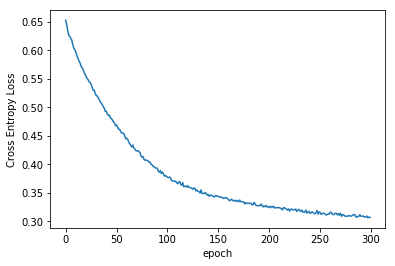

In [18]:
# DON'T WRITE HERE
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch')

### 14. Evaluate the test set
With torch set to <tt>no_grad</tt>, pass <tt>cat_test</tt> and <tt>con_test</tt> through the trained model. Create a validation set called "y_val". Compare the output to <tt>y_test</tt> using the loss function defined above. Results may vary.

In [ ]:
# CODE HERE




# RUN THIS CODE TO COMPARE RESULTS
print(f'CE Loss: {loss:.8f}')

In [19]:
# TO EVALUATE THE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.30774996


### 15. Calculate the overall percent accuracy
Using a for loop, compare the argmax values of the <tt>y_val</tt> validation set to the <tt>y_test</tt> set.

In [ ]:
# CODE HERE







In [20]:
# DON'T WRITE HERE
rows = len(y_test)
correct = 0

# print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')

for i in range(rows):
    # print(f'{str(y_val[i]):26} {y_val[i].argmax().item():^7}{y_test[i]:^7}')

    if y_val[i].argmax().item() == y_test[i]:
        correct += 1

print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')


4255 out of 5000 = 85.10% correct


### BONUS: Feed new data through the trained model
See if you can write a function that allows a user to input their own values, and generates a prediction.<br>
<strong>HINT</strong>:<br>There's no need to build a DataFrame. You can use inputs to populate column variables, convert them to embeddings with a context dictionary, and pass the embedded values directly into the tensor constructors:<br>
<pre>mar = input("What is the person's marital status? ")
mar_d = dict(Divorced=0, Married=1, Married-spouse-absent=2, Never-married=3, Separated=4, Widowed=5)
mar = mar_d[mar]
cats = torch.tensor([..., ..., mar, ..., ...], dtype=torch.int64).reshape(1,-1)</pre>
Make sure that names are put in alphabetical order before assigning numbers.

Also, be sure to run <tt>model.eval()</tt> before passing new date through. Good luck!

In [ ]:
# WRITE YOUR CODE HERE:


In [ ]:
# RUN YOUR CODE HERE:


In [21]:
# DON'T WRITE HERE
def test_data(mdl): # pass in the name of the model
    # INPUT NEW DATA
    age = float(input("What is the person's age? (18-90)  "))
    sex = input("What is the person's sex? (Male/Female) ").capitalize()
    edn = int(input("What is the person's education level? (3-16) "))
    mar = input("What is the person's marital status? ").capitalize()
    wrk = input("What is the person's workclass? ").capitalize()
    occ = input("What is the person's occupation? ").capitalize()
    hrs = float(input("How many hours/week are worked? (20-90)  "))

    # PREPROCESS THE DATA
    sex_d = {'Female':0, 'Male':1}
    mar_d = {'Divorced':0, 'Married':1, 'Married-spouse-absent':2, 'Never-married':3, 'Separated':4, 'Widowed':5}
    wrk_d = {'Federal-gov':0, 'Local-gov':1, 'Private':2, 'Self-emp':3, 'State-gov':4}
    occ_d = {'Adm-clerical':0, 'Craft-repair':1, 'Exec-managerial':2, 'Farming-fishing':3, 'Handlers-cleaners':4,
            'Machine-op-inspct':5, 'Other-service':6, 'Prof-specialty':7, 'Protective-serv':8, 'Sales':9, 
            'Tech-support':10, 'Transport-moving':11}

    sex = sex_d[sex]
    mar = mar_d[mar]
    wrk = wrk_d[wrk]
    occ = occ_d[occ]

    # CREATE CAT AND CONT TENSORS
    cats = torch.tensor([sex,edn,mar,wrk,occ], dtype=torch.int64).reshape(1,-1)
    conts = torch.tensor([age,hrs], dtype=torch.float).reshape(1,-1)
    
    # SET MODEL TO EVAL (in case this hasn't been done)
    mdl.eval()

    # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
    with torch.no_grad():
        z = mdl(cats, conts).argmax().item()

    print(f'\nThe predicted label is {z}')
    
test_data(model)

What is the person's age? (18-90)  22
What is the person's sex? (Male/Female) male
What is the person's education level? (3-16) 12
What is the person's marital status? married
What is the person's workclass? private
What is the person's occupation? sales
How many hours/week are worked? (20-90)  40

The predicted label is 0


# Saving and Loading Trained Models
Refer back to this notebook as a refresher on saving and loading models.

## Saving a trained model
Save a trained model to a file in case you want to come back later and feed new data through it.


To save a trained model called "model" to a file called "MyModel.pt":

In [ ]:
torch.save(model.state_dict(), 'MyModel.pt')

To ensure the model has been trained before saving (assumes the variables "losses" and "epochs" have been defined):

In [ ]:
if len(losses) == epochs:
    torch.save(model.state_dict(), 'MyModel.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')

## Loading a saved model (starting from scratch)
We can load the trained weights and biases from a saved model. If we've just opened the notebook, we'll have to run standard imports and function definitions.

### 1. Perform standard imports
These will depend on the scope of the model, chosen displays, metrics, etc.

In [ ]:
# Perform standard imports
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

### 2. Run the model definition
We'll introduce the model shown below in the next section.

In [ ]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

### 3. Instantiate the model, load parameters
First we instantiate the model, then we load the pre-trained weights & biases, and finally we set the model to "eval" mode to prevent any further backprops.

In [ ]:
model2 = MultilayerPerceptron()
model2.load_state_dict(torch.load('MyModel.pt'))
model2.eval() # be sure to run this step!

# MNIST Code Along with ANN
Before we start working with Convolutional Neural Networks (CNN), let's model the <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST dataset</a> using only linear layers.<br>
In this exercise we'll use the same logic laid out in the ANN notebook. We'll reshape the MNIST data from a 28x28 image to a flattened 1x784 vector to mimic a single row of 784 features.

## Perform standard imports
Torchvision should have been installed by the environment file during setup. If not, you can install it now. At the terminal with your virtual environment activated, run<br>
<pre>conda install torchvision -c pytorch
<em>or</em>
pip install torchvision</pre>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F          # adds some efficiency
from torch.utils.data import DataLoader  # lets us load data in batches
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt
%matplotlib inline

## Load the MNIST dataset
PyTorch makes the MNIST dataset available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.
### Define transform
As part of the loading process, we can apply multiple transformations (reshape, convert to tensor, normalize, etc.) to the incoming data.<br>For this exercise we only need to convert images to tensors. 

In [2]:
transform = transforms.ToTensor()

### Load the training set

In [3]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)
train_data

100%|██████████| 9912422/9912422 [00:03<00:00, 2543027.74it/s]


Extracting ../Data/MNIST/raw/train-images-idx3-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 64917306.44it/s]


Extracting ../Data/MNIST/raw/train-labels-idx1-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 1648877/1648877 [00:03<00:00, 442874.58it/s]


Extracting ../Data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23147665.57it/s]

Extracting ../Data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

### Load the test set
There's a companion set of MNIST data containing 10,000 records accessible by setting train=False. As before, torchvision will only download this once, and in the future will look for the local copy.

In [4]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

### Examine a training record

In [5]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Calling the first record from <tt>train_data</tt> returns a two-item tuple. The first item is our 28x28 tensor representing the image. The second is a label, in this case the number "5".

In [7]:
image, label = train_data[0]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([1, 28, 28]) 
Label: 5


### View the image
Matplotlib can interpret pixel values through a variety of <a href='https://matplotlib.org/tutorials/colors/colormaps.html'>colormaps</a>.

In [14]:
train_data[0][0].squeeze().shape

torch.Size([28, 28])

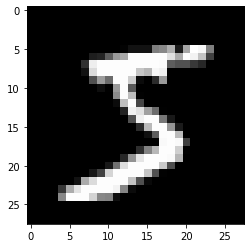

In [19]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap="gray")

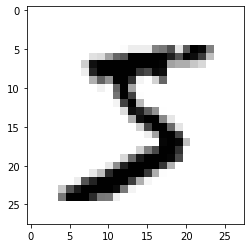

In [20]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap="gist_yarg");

## Batch loading with DataLoader
Our training set contains 60,000 records. If we look ahead to our model we have 784 incoming features, hidden layers of 120 and 84 neurons, and 10 output features. Including the bias terms for each layer, the total number of parameters being trained is:<br>

$\begin{align}\quad(784\times120)+120+(120\times84)+84+(84\times10)+10 &=\\
94080+120+10080+84+840+10 &= 105,214\end{align}$<br>

For this reason it makes sense to load training data in batches using <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><tt><strong>DataLoader</strong></tt></a>.

In [21]:
torch.manual_seed(101)  # for consistent results

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In the cell above, <tt><strong>train_data</strong></tt> is a PyTorch <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset'><em>Dataset</em></a> object (an object that supports data loading and sampling).<br>
The <tt><strong>batch_size</strong></tt> is the number of records to be processed at a time. If it's not evenly divisible into the dataset, then the final batch contains the remainder.<br>
Setting <tt><strong>shuffle</strong></tt> to True means that the dataset will be shuffled after each epoch.

<div class="alert alert-info"><strong>NOTE:</strong> DataLoader takes an optional <tt><strong>num_workers</strong></tt> parameter that sets up how many subprocesses to use for data loading. This behaves differently with different operating systems so we've omitted it here. See <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'>the docs</a> for more information.</div>

### View a batch of images
Once we've defined a DataLoader, we can create a grid of images using <a href='https://pytorch.org/docs/stable/torchvision/utils.html#torchvision.utils.make_grid'><tt><strong>torchvision.utils.make_grid</strong></tt></a>

Labels:  [   2    0    2    0    3    7    4    1    2    2    2    3]


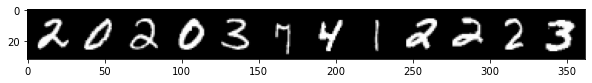

In [27]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # to widen the printed array

# Grab the first batch of images
for images,labels in train_loader: 
    break

# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))


## Define the model
For this exercise we'll use fully connected layers to develop a <a href='https://en.wikipedia.org/wiki/Multilayer_perceptron'>multilayer perceptron</a>.<br>
Our input size is 784 once we flatten the incoming 28x28 tensors.<br>
Our output size represents the 10 possible digits.<br>
We'll set our hidden layers to [120, 84] for now. Once you've completed the exercise feel free to come back and try different values.

In [28]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [48]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

<div class="alert alert-info"><strong>NOTE:</strong> You may have noticed our shortcut for adding ReLU to the linear layer. In the last section this was done under the <tt>__init__</tt> section as
<pre style='background-color:rgb(217,237,247)'>
layerlist = []
for i in layers:
    layerlist.append(nn.Linear(n_in,i)) 
    layerlist.append(nn.ReLU(inplace=True))
self.layers = nn.Sequential(*layerlist)</pre>
    
Here we're calling <tt>F.relu()</tt> as a functional wrapper on the linear layer directly:
<pre style='background-color:rgb(217,237,247)'>
def forward(self,X):
    X = F.relu(self.fc1(X))</pre></div>

## Count the model parameters
This optional step shows that the number of trainable parameters in our model matches the equation above.

In [49]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [31]:
count_parameters(model)

 94080
   120
 10080
    84
   840
    10
______
105214


## Define loss function & optimizer

In [50]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Flatten the training data
The batch tensors fed in by DataLoader have a shape of [100, 1, 28, 28]:

In [51]:
# Load the first batch, print its shape
for images, labels in train_loader:
    print('Batch shape:', images.size())
    break
    
# EQUIVALENT TO:
# dataiter = iter(train_loader)
# images, labels = dataiter.next()
# print('Batch shape:', images.size())

Batch shape: torch.Size([100, 1, 28, 28])


We can flatten them using <tt>.view()</tt>

In [52]:
images.view(100,-1).size()

torch.Size([100, 784])

We'll do this just before applying the model to our data.

## Train the model
This time we'll run the test data through the model during each epoch, so that we can compare loss & accuracy on the same plot.

<div class="alert alert-info"><strong>A QUICK NOTE: </strong>In the section below marked &nbsp;<tt><em>#Tally the number of correct predictions</em></tt> &nbsp;we include the code
<pre style='background-color:rgb(217,100,247)'>
predicted = torch.max(y_pred.data, 1)[1]</pre>
This uses the <a href='https://pytorch.org/docs/stable/torch.html#torch.max'><tt><strong>torch.max()</strong></tt></a> function. <tt>torch.max()</tt> returns a tensor of maximum values, and a tensor of the indices where the max values were found. In our code we're asking for the index positions of the maximum values along dimension 1. In this way we can match predictions up to image labels.</div>

In [53]:
torch.max(torch.FloatTensor([[1, 2, 3]]), 1)

torch.return_types.max(
values=tensor([3.]),
indices=tensor([2]))

In [54]:
X_train

NameError: name 'X_train' is not defined

In [56]:
train_loader

In [55]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.29955003  accuracy:  82.655%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.27258992  accuracy:  87.248%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.18161908  accuracy:  89.317%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.17173445  accuracy:  94.625%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.05123505  accuracy:  95.005%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.14078441  accuracy:  95.247%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.16554320  accuracy:  96.535%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.17340404  accuracy:  96.525%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.11122656  accuracy:  96.593%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.14234422  accuracy:  97.435%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.01247079  accuracy:  97.480%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.07791124  accuracy:  97.417%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.05589315  accuracy:  98.050%
epoch:  4  b

## Plot the loss and accuracy comparisons

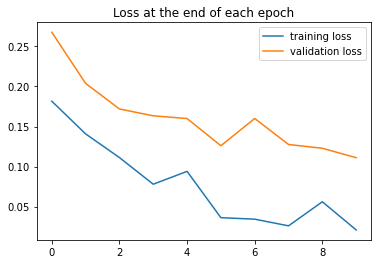

In [58]:
train_losses = [loss.item() for loss in train_losses]
test_losses = [loss.item() for loss in test_losses]
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend()

This shows some evidence of overfitting the training data.

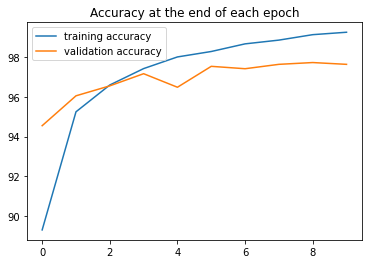

In [59]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

## Evaluate Test Data
We retained the test scores during our training session:

In [60]:
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(9455), tensor(9605), tensor(9655), tensor(9716), tensor(9648), tensor(9753), tensor(9741), tensor(9763), tensor(9772), tensor(9763)]

Test accuracy: 97.630%


However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

In [61]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [62]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9763/10000 =  97.630%


Not bad considering that a random guess gives only 10% accuracy!

## Display the confusion matrix
This uses scikit-learn, and the predicted values obtained above.

In [63]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 970    0    3    1    1    2    2    0    3    4]
 [   0 1120    1    0    0    0    4    5    0    1]
 [   3    4 1015    8    5    0    3   13    2    0]
 [   0    3    3  990    1   16    1    3    4   10]
 [   0    0    1    0  952    1    1    0    0    7]
 [   0    0    0    1    0  852    1    0    2    7]
 [   3    3    2    0    8    8  944    0    4    1]
 [   0    0    4    3    3    0    0  997    2    1]
 [   3    5    2    6    2   11    2    5  956   11]
 [   1    0    1    1   10    2    0    5    1  967]]


This shows that the model had the greatest success with ones, twos and sevens, and the lowest with fives, sixes and eights.

## Examine the misses
We can track the index positions of "missed" predictions, and extract the corresponding image and label. We'll do this in batches to save screen space.

In [64]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

237

In [66]:
# Display the first 10 index positions
misses

array([   8,   18,  115,  149,  151,  241,  247,  274,  321,  340,  381,
        445,  447,  448,  478,  582,  619,  720,  877,  900,  938,  951,
        956, 1003, 1014, 1032, 1039, 1044, 1107, 1112, 1128, 1156, 1178,
       1181, 1182, 1226, 1232, 1242, 1247, 1260, 1319, 1326, 1328, 1378,
       1393, 1500, 1522, 1527, 1530, 1549, 1553, 1554, 1609, 1678, 1681,
       1709, 1717, 1748, 1751, 1754, 1773, 1790, 1800, 1901, 1911, 1913,
       1938, 1941, 1984, 1987, 2016, 2035, 2043, 2053, 2070, 2109, 2130,
       2135, 2182, 2266, 2272, 2292, 2293, 2329, 2369, 2387, 2395, 2406,
       2414, 2488, 2526, 2582, 2597, 2607, 2648, 2654, 2743, 2810, 2863,
       2877, 2896, 2915, 2921, 2927, 2939, 3073, 3114, 3117, 3132, 3172,
       3173, 3422, 3451, 3503, 3520, 3549, 3558, 3567, 3597, 3702, 3718,
       3751, 3776, 3780, 3808, 3811, 3838, 3853, 3893, 3902, 3906, 3926,
       3941, 3976, 4000, 4065, 4078, 4116, 4163, 4176, 4199, 4248, 4269,
       4271, 4289, 4294, 4360, 4369, 4425, 4463, 44

In [67]:
# Set up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Now that everything is set up, run and re-run the cell below to view all of the missed predictions.<br>
Use <kbd>Ctrl+Enter</kbd> to remain on the cell between runs. You'll see a <tt>StopIteration</tt> once all the misses have been seen.

Index: [   8   18  115  149  151  241  247  274  321  340  381  445]
Label: [   5    3    4    2    9    9    4    9    2    5    3    6]
Guess: [   6    8    9    9    8    8    2    3    7    3    7    0]


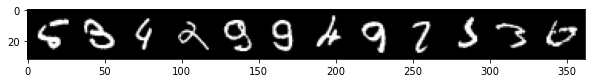

In [68]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

# MNIST Code Along with CNN
Now that we've seen the results of an artificial neural network model on the <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST dataset</a>, let's work the same data with a <a href='https://en.wikipedia.org/wiki/Convolutional_neural_network'>Convolutional Neural Network</a> (CNN).
Make sure to watch the theory lectures! You'll want to be comfortable with:
* convolutional layers
* filters/kernels
* pooling
* depth, stride and zero-padding

Note that in this exercise there is no need to flatten the MNIST data, as a CNN expects 2-dimensional data.

## Perform standard imports

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

## Load the MNIST dataset
PyTorch makes the MNIST train and test datasets available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. The first time they're called, the datasets will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.

Refer to the previous section for explanations of transformations, batch sizes and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><tt><strong>DataLoader</strong></tt></a>.

In [18]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [19]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

### Create loaders
When working with images, we want relatively small batches; a batch size of 4 is not uncommon.

In [20]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

## Define a convolutional model
In the previous section we used only fully connected layers, with an input layer of 784 (our flattened 28x28 images), hidden layers of 120 and 84 neurons, and an output size representing 10 possible digits.

This time we'll employ two convolutional layers and two pooling layers before feeding data through fully connected hidden layers to our output. The model follows CONV/RELU/POOL/CONV/RELU/POOL/FC/RELU/FC.

<div class="alert alert-info"><strong>Let's walk through the steps we're about to take.</strong><br>

1. Extend the base Module class:
   
<tt><font color=green>class ConvolutionalNetwork(nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()</font></tt><br>

2. Set up the convolutional layers with <a href='https://pytorch.org/docs/stable/nn.html#conv2d'><tt><strong>torch.nn.Conv2d()</strong></tt></a><br><br>The first layer has one input channel (the grayscale color channel). We'll assign 6 output channels for feature extraction. We'll set our kernel size to 3 to make a 3x3 filter, and set the step size to 1.<br>
<tt><font color=green>&nbsp;&nbsp;&nbsp;&nbsp;self.conv1 = nn.Conv2d(1, 6, 3, 1)</font></tt><br>
The second layer will take our 6 input channels and deliver 16 output channels.<br>
<tt><font color=green>&nbsp;&nbsp;&nbsp;&nbsp;self.conv2 = nn.Conv2d(6, 16, 3, 1)</font></tt><br><br>

3. Set up the fully connected layers with <a href='https://pytorch.org/docs/stable/nn.html#linear'><tt><strong>torch.nn.Linear()</strong></tt></a>.<br><br>The input size of (5x5x16) is determined by the effect of our kernels on the input image size. A 3x3 filter applied to a 28x28 image leaves a 1-pixel edge on all four sides. In one layer the size changes from 28x28 to 26x26. We could address this with zero-padding, but since an MNIST image is mostly black at the edges, we should be safe ignoring these pixels. We'll apply the kernel twice, and apply pooling layers twice, so our resulting output will be 
$\;(((28-2)/2)-2)/2 = 5.5\;$ which rounds down to 5 pixels per side.<br>
<tt><font color=green>&nbsp;&nbsp;&nbsp;&nbsp;self.fc1 = nn.Linear(5\*5\*16, 120)</font></tt><br>
<tt><font color=green>&nbsp;&nbsp;&nbsp;&nbsp;self.fc2 = nn.Linear(120, 84)</font></tt><br>
<tt><font color=green>&nbsp;&nbsp;&nbsp;&nbsp;self.fc3 = nn.Linear(84, 10)</font></tt><br>
See below for a more detailed look at this step.<br><br>

4. Define the forward method.<br><br>Activations can be applied to the convolutions in one line using <a href='https://pytorch.org/docs/stable/nn.html#id27'><tt><strong>F.relu()</strong></tt></a> and pooling is done using <a href='https://pytorch.org/docs/stable/nn.html#maxpool2d'><tt><strong>F.max_pool2d()</strong></tt></a><br>
<tt><font color=green>def forward(self, X):<br>
&nbsp;&nbsp;&nbsp;&nbsp;X = F.relu(self.conv1(X))<br>
&nbsp;&nbsp;&nbsp;&nbsp;X = F.max_pool2d(X, 2, 2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;X = F.relu(self.conv2(X))<br>
&nbsp;&nbsp;&nbsp;&nbsp;X = F.max_pool2d(X, 2, 2)<br>
</font></tt>Flatten the data for the fully connected layers:<br><tt><font color=green>
&nbsp;&nbsp;&nbsp;&nbsp;X = X.view(-1, 5\*5\*16)<br>
&nbsp;&nbsp;&nbsp;&nbsp;X = F.relu(self.fc1(X))<br>
&nbsp;&nbsp;&nbsp;&nbsp;X = self.fc2(X)<br>
&nbsp;&nbsp;&nbsp;&nbsp;return F.log_softmax(X, dim=1)</font></tt>
</div>

<div class="alert alert-danger"><strong>Breaking down the convolutional layers</strong> (this code is for illustration purposes only.)</div>

In [21]:
# Define layers
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [22]:
# Grab the first MNIST record
for i, (X_train, y_train) in enumerate(train_data):
    break

In [23]:
# Create a rank-4 tensor to be passed into the model
# (train_loader will have done this already)
x = X_train.view(1,1,28,28)
print(x.shape)

torch.Size([1, 1, 28, 28])


In [24]:
# Perform the first convolution/activation
x = F.relu(conv1(x))
print(x.shape)

torch.Size([1, 6, 26, 26])


In [25]:
# Run the first pooling layer
x = F.max_pool2d(x, 2, 2)
print(x.shape)

torch.Size([1, 6, 13, 13])


In [12]:
# Perform the second convolution/activation
x = F.relu(conv2(x))
print(x.shape)

torch.Size([1, 16, 11, 11])


In [13]:
# Run the second pooling layer
x = F.max_pool2d(x, 2, 2)
print(x.shape)

torch.Size([1, 16, 5, 5])


In [14]:
# Flatten the data
x = x.view(-1, 5*5*16)
print(x.shape)

torch.Size([1, 400])


<div class="alert alert-danger"><strong>This is how the convolution output is passed into the fully connected layers.</strong></div>

Now let's run the code.

In [15]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [26]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Including the bias terms for each layer, the total number of parameters being trained is:<br>

$\quad\begin{align}(1\times6\times3\times3)+6+(6\times16\times3\times3)+16+(400\times120)+120+(120\times84)+84+(84\times10)+10 &=\\
54+6+864+16+48000+120+10080+84+840+10 &= 60,074\end{align}$<br>

In [27]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [28]:
count_parameters(model)

    54
     6
   864
    16
 48000
   120
 10080
    84
   840
    10
______
 60074


## Define loss function & optimizer

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Train the model
This time we'll feed the data directly into the model without flattening it first.

In [30]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 0.04255060  accuracy:  78.483%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.07605958  accuracy:  85.825%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.36373824  accuracy:  88.661%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.02648054  accuracy:  90.479%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.00858532  accuracy:  91.640%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.00124670  accuracy:  92.478%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.57951450  accuracy:  93.152%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.05387225  accuracy:  93.617%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.01389736  accuracy:  94.024%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.03344604  accuracy:  94.315%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.03261919  accuracy:  97.950%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.03684944  accuracy:  97.917%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 0.00127477  accuracy:  97.883%
epoch:  1  b

## Plot the loss and accuracy comparisons

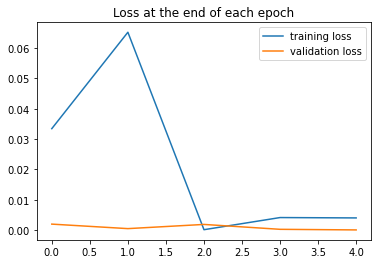

In [32]:
train_losses = [loss.item() for loss in train_losses]
test_losses = [loss.item() for loss in test_losses]

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend()

In [33]:
test_losses

[0.0019811829552054405,
 0.0004964157124049962,
 0.0018784744897857308,
 0.0002669095993041992,
 6.986892549321055e-05]

While there may be some overfitting of the training data, there is far less than we saw with the ANN model.

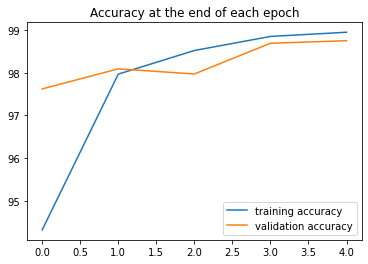

In [34]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

## Evaluate Test Data

In [35]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [36]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9875/10000 =  98.750%


Recall that our [784,120,84,10] ANN returned an accuracy of 97.25% after 10 epochs. And it used 105,214 parameters to our current 60,074.

## Display the confusion matrix

In [37]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 972    0    1    0    0    2    4    0    2    0]
 [   0 1134    2    0    0    0    4    3    0    0]
 [   1    0 1024    0    1    0    1    9    2    0]
 [   0    1    0 1002    0    8    0    1    2    0]
 [   0    0    1    0  975    0    1    5    1    6]
 [   0    0    0    3    0  869    3    0    1    3]
 [   6    0    0    0    1    2  944    0    0    1]
 [   1    0    2    1    0    1    0 1000    1    3]
 [   0    0    2    3    0    0    1    2  962    3]
 [   0    0    0    1    5   10    0    8    3  993]]


## Examine the misses
We can track the index positions of "missed" predictions, and extract the corresponding image and label. We'll do this in batches to save screen space.

In [38]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

125

In [39]:
# Display the first 10 index positions
misses[:10]

array([  18,  247,  320,  321,  340,  445,  460,  551,  582,  659])

In [40]:
# Set up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Now that everything is set up, run and re-run the cell below to view all of the missed predictions.<br>
Use <kbd>Ctrl+Enter</kbd> to remain on the cell between runs. You'll see a <tt>StopIteration</tt> once all the misses have been seen.

Index: [  18  247  320  321  340  445  460  551  582  659  674  684]
Label: [   3    4    9    2    5    6    5    7    8    2    5    7]
Guess: [   8    2    8    7    3    0    9    9    2    1    3    3]


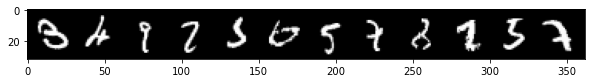

In [41]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Run a new image through the model
We can also pass a single image through the model to obtain a prediction.
Pick a number from 0 to 9999, assign it to "x", and we'll use that value to select a number from the MNIST test set.

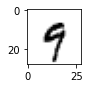

In [42]:
x = 2019
plt.figure(figsize=(1,1))
plt.imshow(test_data[x][0].reshape((28,28)), cmap="gist_yarg");

In [32]:
model.eval()
with torch.no_grad():
    new_pred = model(test_data[x][0].view(1,1,28,28)).argmax()
print("Predicted value:",new_pred.item())

Predicted value: 9


# CIFAR Code Along with CNN
The <a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a> dataset is similar to MNIST, except that instead of one color channel (grayscale) there are three channels (RGB).<br>
Where an MNIST image has a size of (1,28,28), CIFAR images are (3,32,32). There are 10 categories an image may fall under:
0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

As with the previous code along, make sure to watch the theory lectures! You'll want to be comfortable with:
* convolutional layers
* filters/kernels
* pooling
* depth, stride and zero-padding

## Perform standard imports

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sn  # for heatmaps
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

## Load the CIFAR-10 dataset
PyTorch makes the CIFAR-10 train and test datasets available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. The first time they're called, the datasets will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.<br>The set contains 50,000 train and 10,000 test images.

Refer to the previous section for explanations of transformations, batch sizes and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><tt><strong>DataLoader</strong></tt></a>.

In [44]:
transform = transforms.ToTensor()

train_data = datasets.CIFAR10(root='Data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='Data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [01:27<00:00, 1948817.81it/s]


Extracting Data/cifar-10-python.tar.gz to Data
Files already downloaded and verified


In [45]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [46]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: Data
    Split: Test
    StandardTransform
Transform: ToTensor()

### Create loaders

In [47]:
torch.manual_seed(101)  # for reproducible results

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

### Define strings for labels
We can call the labels whatever we want, so long as they appear in the order of 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'. Here we're using 5-character labels padded with spaces so that our reports line up later.

In [48]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

We don't want to use the variable name "class" here, as it would overwrite Python's built-in keyword.

## View a batch of images

Label: [    1     5     8     1     6     1     6     3     7     9]
Class:    car   dog  ship   car  frog   car  frog   cat horse truck


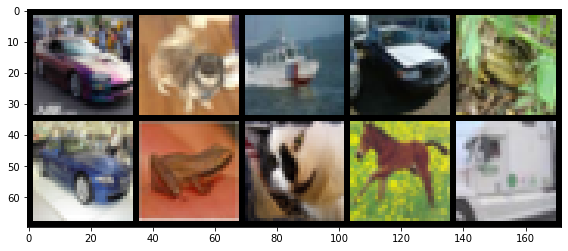

In [49]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}')) # to widen the printed array

# Grab the first batch of 10 images
for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

# Print the images
im = make_grid(images, nrow=5)  # the default nrow is 8
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Define the model
In the previous section we used two convolutional layers and two pooling layers before feeding data through a fully connected hidden layer to our output. The model follows CONV/RELU/POOL/CONV/RELU/POOL/FC/RELU/FC. We'll use the same format here.

The only changes are:
* take in 3-channel images instead of 1-channel
* adjust the size of the fully connected input<br>

Our first convolutional layer will have 3 input channels, 6 output channels, a kernel size of 3 (resulting in a 3x3 filter), and a stride length of 1 pixel.<br>These are passed in as <tt>nn.Conv2d(3,6,3,1)</tt>

In [50]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)  # changed from (1, 6, 5, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(6*6*16, 120)   # changed from (4*4*16) to fit 32x32 images with 3x3 filters
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 6*6*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

<div class="alert alert-info"><strong>Why <tt>(6x6x16)</tt> instead of <tt>(5x5x16)</tt>?</strong><br>
With MNIST the kernels and pooling layers resulted in $\;(((28−2)/2)−2)/2=5.5 \;$ which rounds down to 5 pixels per side.<br>
With CIFAR the result is $\;(((32-2)/2)-2)/2 = 6.5\;$ which rounds down to 6 pixels per side.</div>

In [51]:
torch.manual_seed(101)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Including the bias terms for each layer, the total number of parameters being trained is:<br>

$\quad\begin{align}(3\times6\times3\times3)+6+(6\times16\times3\times3)+16+(576\times120)+120+(120\times84)+84+(84\times10)+10 &=\\
162+6+864+16+69120+120+10080+84+840+10 &= 81,302\end{align}$<br>

In [52]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [53]:
count_parameters(model)

   162
     6
   864
    16
 69120
   120
 10080
    84
   840
    10
______
 81302


## Define loss function & optimizer

In [54]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Train the model
This time we'll feed the data directly into the model without flattening it first.<br>
<div class="alert alert-info"><font color=blue><strong>OPTIONAL: </strong>In the event that training takes too long, you can interrupt the kernel, skip ahead to the bottom of the notebook, and load a trained version of the model that's been saved in this folder.</font></div>

In [55]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch: 1000 [ 10000/50000]  loss: 1.77271104  accuracy:  23.990%
epoch:  0  batch: 2000 [ 20000/50000]  loss: 2.35207582  accuracy:  30.445%
epoch:  0  batch: 3000 [ 30000/50000]  loss: 1.38118100  accuracy:  34.150%
epoch:  0  batch: 4000 [ 40000/50000]  loss: 1.93600404  accuracy:  36.935%
epoch:  0  batch: 5000 [ 50000/50000]  loss: 0.74392456  accuracy:  39.228%
epoch:  1  batch: 1000 [ 10000/50000]  loss: 1.33628440  accuracy:  49.450%
epoch:  1  batch: 2000 [ 20000/50000]  loss: 1.30076873  accuracy:  50.345%
epoch:  1  batch: 3000 [ 30000/50000]  loss: 1.60126591  accuracy:  50.953%
epoch:  1  batch: 4000 [ 40000/50000]  loss: 1.01084065  accuracy:  51.370%
epoch:  1  batch: 5000 [ 50000/50000]  loss: 1.20091128  accuracy:  51.768%
epoch:  2  batch: 1000 [ 10000/50000]  loss: 1.32971191  accuracy:  55.280%
epoch:  2  batch: 2000 [ 20000/50000]  loss: 0.99893683  accuracy:  55.725%
epoch:  2  batch: 3000 [ 30000/50000]  loss: 1.02295947  accuracy:  55.813%
epoch:  2  b

## Optional: Save the model
This will save your trained model, without overwriting the saved model we have provided called <strong>CIFAR10-CNN-Model-master.pt</strong>

In [56]:
torch.save(model.state_dict(), 'CIFAR10-CNN-Model.pt')

## Plot the loss and accuracy comparisons

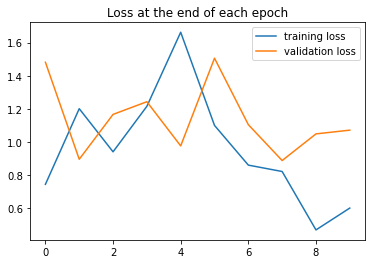

In [58]:
train_losses = [loss.item() for loss in train_losses]
test_losses = [loss.item() for loss in test_losses]
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

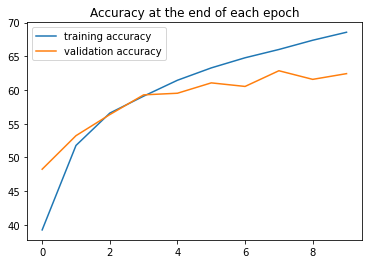

In [59]:
plt.plot([t/500 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend()

## Evaluate Test Data

In [61]:
print(test_correct) # contains the results of all 10 epochs
print(f'\nTest accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(4824), tensor(5322), tensor(5635), tensor(5928), tensor(5952), tensor(6106), tensor(6053), tensor(6286), tensor(6158), tensor(6243)]

Test accuracy: 62.430%


This is not as impressive as with MNIST, which makes sense. We would have to adjust our parameters to obtain better results.<br>
Still, it's much better than the 10% we'd get with random chance!

## Display the confusion matrix
In order to map predictions against ground truth, we need to run the entire test set through the model.<br>
Also, since our model was not as accurate as with MNIST, we'll use a <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>heatmap</a> to better display the results.

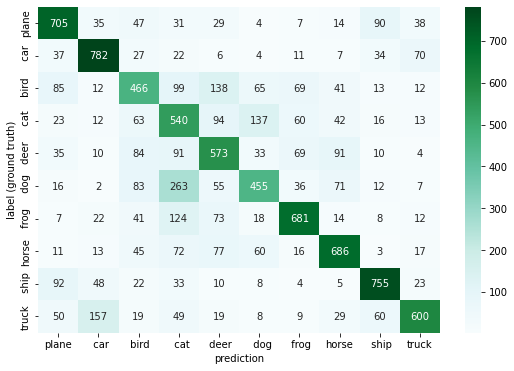

In [62]:
# Create a loader for the entire the test set
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show()

For more info on the above chart, visit the docs on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html'>scikit-learn's confusion_matrix</a>, <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps</a>, and <a href='https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html'>matplotlib colormaps</a>. 

## Examine the misses
We can track the index positions of "missed" predictions, and extract the corresponding image and label. We'll do this in batches to save screen space.

In [63]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

3757

In [64]:
# Display the first 8 index positions
misses[:8]

array([    3,     4,     8,    10,    17,    20,    22,    24])

In [65]:
# Set up an iterator to feed batched rows
r = 8   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Now that everything is set up, run and re-run the cell below to view all of the missed predictions.<br>
Use <kbd>Ctrl+Enter</kbd> to remain on the cell between runs. You'll see a <tt>StopIteration</tt> once all the misses have been seen.

Index: [   58    59    61    63    65    67    70    71]
Label: [    4     6     3     3     2     2     2     6]
Class:  Coat Shirt Dress Dress Sweater Sweater Sweater Shirt

Guess: [    5     3     5     2     6     0     4     3]
Class:  Sandal Dress Sandal Sweater Shirt T-shirt Coat Dress


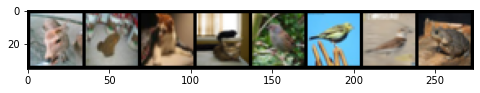

In [98]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}')) # to widen the printed array

nextrow = next(row)
lbls = y_test.index_select(0,torch.tensor(nextrow)).numpy()
gues = predicted.index_select(0,torch.tensor(nextrow)).numpy()
print("Index:", nextrow)
print("Label:", lbls)
print("Class: ", *np.array([class_names[i] for i in lbls]))
print()
print("Guess:", gues)
print("Class: ", *np.array([class_names[i] for i in gues]))

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(8,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [99]:
r

8

<div class="alert alert-info"><font color=blue><h2>Optional: Load a Saved Model</h2>
In the event that training the ConvolutionalNetwork takes too long, you can load a trained version by running the following code:</font>
<pre style='background-color:rgb(217,237,247)'>
model2 = ConvolutionalNetwork()
model2.load_state_dict(torch.load('CIFAR10-CNN-Model-master.pt'))
model2.eval()</pre>
</div>

In [68]:
# Instantiate the model and load saved parameters
model2 = ConvolutionalNetwork()
model2.load_state_dict(torch.load('CIFAR10-CNN-Model-master.pt'))
model2.eval()

FileNotFoundError: [Errno 2] No such file or directory: 'CIFAR10-CNN-Model-master.pt'

In [24]:
# Evaluate the saved model against the test set
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model2(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 6105/10000 =  61.050%


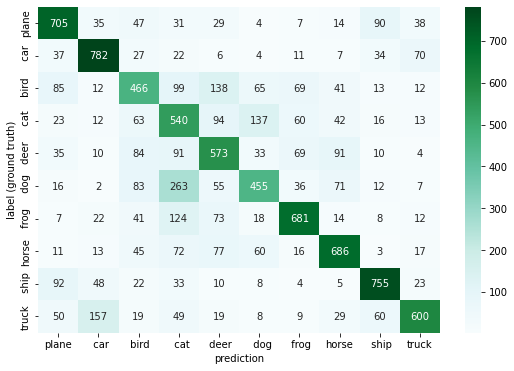

In [70]:
# Display the confusion matrix as a heatmap
arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();

# Loading Real Image Data
So far we've only worked with toy datasets (MNIST, CIFAR-10) conveniently packaged by torchvision, where every image has the same size and shape. Now let's learn the real deal, and work from a varied collection of .jpg files.

For this section we'll be working with a version of the Cats vs. Dogs dataset inspired by a classic <a href='https://www.kaggle.com/c/dogs-vs-cats'>Kaggle competition</a>.<br>
A quick note - do <strong>not</strong> download the dataset from Kaggle! Ours is a cleaned version of the data without any 0by0 files, etc.<br>The images are similar to ones available from the <a href='http://www.image-net.org/'>ImageNet</a> database.

We have organized the files into train and test folders, and further divided the images into CAT and DOG subfolders. In this way the file path contains the label.

### Image files directory tree
<pre>.
└── Data
    └── CATS_DOGS
        ├── test
        │   ├── CAT
        │   │   ├── 9374.jpg
        │   │   ├── 9375.jpg
        │   │   └── ... (3,126 files)
        │   └── DOG
        │       ├── 9374.jpg
        │       ├── 9375.jpg
        │       └── ... (3,125 files)       
        │           
        └── train
            ├── CAT
            │   ├── 0.jpg
            │   ├── 1.jpg
            │   └── ... (9,371 files)
            └── DOG
                ├── 0.jpg
                ├── 1.jpg
                └── ... (9,372 files)</pre>

## Perform standard imports

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Examine the data
We'll us Python's built-in <a href='https://docs.python.org/3/library/os.html'>os module</a> to walk the directories collecting file names. We'll then use <a href='https://python-pillow.org/'>Pillow</a>, an extension to the Python Imaging Library (PIL), to open image files and extract image sizes. A pandas DataFrame will provide summary statistics on our data like max/min width & height from which we can choose our model parameters.

In [72]:
import os
from PIL import Image
from IPython.display import display

# Filter harmless warnings
import warnings
warnings.filterwarnings("ignore")

<div class="alert-danger"><strong>NOTE: </strong>There's a <a href='https://github.com/python-pillow/Pillow/issues/3769'>known issue</a> with <strong>Pillow v6.0.0</strong> where it cannot open certain .jpg files, and instead raises an<br>
<tt><strong>UnboundLocalError: </strong>local variable 'photoshop' referenced before assignment</tt><br>This is due to be fixed in an upcoming release.
    
For example, the images affected in the CAT test set are:
<pre style='background-color:rgb(242,222,222)'>['../Data/CATS_DOGS/test/CAT/10107.jpg',
 '../Data/CATS_DOGS/test/CAT/10404.jpg',
 '../Data/CATS_DOGS/test/CAT/12086.jpg',
 '../Data/CATS_DOGS/test/CAT/9493.jpg',
 '../Data/CATS_DOGS/test/CAT/9683.jpg']</pre>

If this happens, you can either install an older version of Pillow, or use our pytorch_course_env.yml file.</div>

In [74]:
# TEST YOUR VERSION OF PILLOW
# Run this cell. If you see a picture of a cat you're all set!
with Image.open('Data/CATS_DOGS/test/CAT/10107.jpg') as im:
    display(im)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/CATS_DOGS/test/CAT/10107.jpg'

### Create a list of image filenames

In [4]:
path = '..\\Data\\CATS_DOGS\\'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'\\'+img)
        
print('Images: ',len(img_names))

Images:  24994


### Create a DataFrame of image sizes (width x height)
It's worth noting that <tt>Image.open()</tt> doesn't read the entire image into memory, so it's a reasonable way to get image sizes.<br>
Still, this can take awhile.

In [5]:
# Start by creating a list
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)
        
print(f'Images:  {len(img_sizes)}')
print(f'Rejects: {len(rejected)}')

Images:  24994
Rejects: 0


In [6]:
# Convert the list to a DataFrame
df = pd.DataFrame(img_sizes)

# Run summary statistics on image widths
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [7]:
# Run summary statistics on image heights
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

This tells us the shortest width is 42, the shortest height is 33, the largest width and height are 500, and that most images have more than 300 pixels per side. This is useful for deciding on an input size. We'll see in the next section that 224x224 will work well for our purposes (we'll take advantage of some pre-trained models that use this size!)

## Image Preprocessing
Any network we define requires consistent input data. That is, the incoming image files need to have the same number of channels (3 for red/green/blue), the same depth per channel (0-255), and the same height and width. This last requirement can be tricky. How do we transform an 800x450 pixel image into one that is 224x224? In the theory lectures we covered the following:
* <a href='https://en.wikipedia.org/wiki/Aspect_ratio_(image)'><strong>aspect ratio</strong></a>: the ratio of width to height (16:9, 1:1, etc.) An 800x450 pixel image has an aspect ration of 16:9. We can change the aspect ratio of an image by cropping it, by stretching/squeezing it, or by some combination of the two. In both cases we lose some information contained in the original. Let's say we crop 175 pixels from the left and right sides of our 800x450 image, resulting in one that's 450x450.
* <strong>scale</strong>: Once we've attained the proper aspect ratio we may need to scale an image up or down to fit our input parameters. There are several libraries we can use to scale a 450x450 image down to 224x224 with minimal loss.
* <a href=''><strong>normalization</strong></a>: when images are converted to tensors, the [0,255] rgb channels are loaded into range [0,1]. We can then normalize them using the generally accepted values of mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]. For the curious, these values were obtained by the PyTorch team using a random 10,000 sample of <a href='http://www.image-net.org/'>ImageNet</a> images. There's a good discussion of this <a href='https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/22'>here</a>, and the original source code can be found <a href='https://github.com/soumith/imagenet-multiGPU.torch/blob/master/donkey.lua#L154'>here</a>.

## Transformations
Before defining our Convolutional Network, let's look at a sample image and perform various transformations on it to see their effect.

(500, 387)


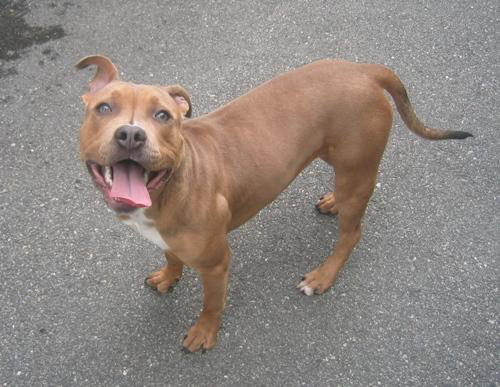

In [8]:
dog = Image.open('..\\Data\\CATS_DOGS\\train\\DOG\\14.jpg')
print(dog.size)
display(dog)

This is how jupyter displays the original .jpg image. Note that size is given as (width, height).<br>
Let's look at a single pixel:

In [9]:
r, g, b = dog.getpixel((0, 0))
print(r,g,b)

90 95 98


The pixel at position [0,0] (upper left) of the source image has an rgb value of (90,95,98). This corresponds to <font style="background-color:rgb(90,95,98)">this color </font><br>
Great! Now let's look at some specific transformations.
### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor'><tt>transforms.ToTensor()</tt></a>
Converts a PIL Image or numpy.ndarray (HxWxC) in the range [0, 255] to a <tt>torch.FloatTensor</tt> of shape (CxHxW) in the range [0.0, 1.0]

torch.Size([3, 387, 500])


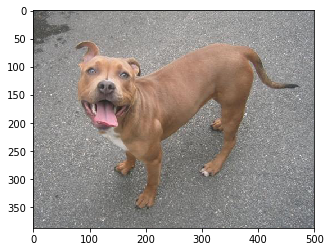

In [10]:
transform = transforms.Compose([
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

This is the same image converted to a tensor and displayed using matplotlib. Note that the torch dimensions follow [channel, height, width]<br><br>
PyTorch automatically loads the [0,255] pixel channels to [0,1]:<br><br>
$\frac{90}{255}=0.3529\quad\frac{95}{255}=0.3725\quad\frac{98}{255}=0.3843$

In [11]:
im[:,0,0]

tensor([0.3529, 0.3725, 0.3843])

### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Resize'><tt>transforms.Resize(<em>size</em>)</tt></a>
If size is a sequence like (h, w), the output size will be matched to this. If size is an integer, the smaller edge of the image will be matched to this number.<br>i.e, if height > width, then the image will be rescaled to (size * height / width, size)

torch.Size([3, 224, 289])


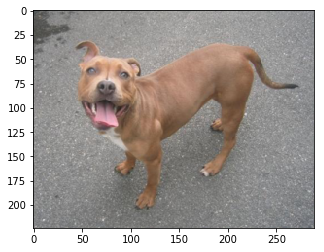

In [12]:
transform = transforms.Compose([
    transforms.Resize(224), 
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

This resized the shortest side, and scaled the other. Let's try this on a small image.

(135, 101)


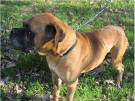

In [80]:
small_dog = Image.open('Data/dogs-vs-cats/train/dog.11.jpg')
print(small_dog.size)
display(small_dog)

torch.Size([3, 224, 296])


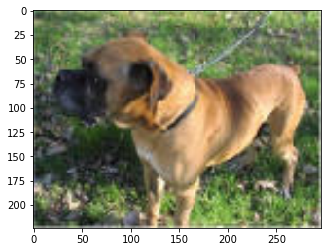

In [14]:
im = transform(small_dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.CenterCrop'><tt>transforms.CenterCrop(<em>size</em>)</tt></a>
If size is an integer instead of sequence like (h, w), a square crop of (size, size) is made.

torch.Size([3, 224, 224])


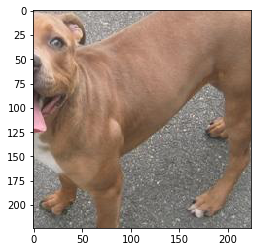

In [15]:
transform = transforms.Compose([
    transforms.CenterCrop(224), 
    transforms.ToTensor()
])
im = transform(dog) # this crops the original image
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

It may be better to resize the image first, then crop:

torch.Size([3, 224, 224])


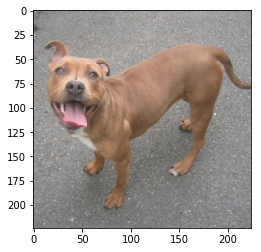

In [16]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224), 
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Other affine transformations
An <a href='https://en.wikipedia.org/wiki/Affine_transformation'><em>affine</em></a> transformation is one that preserves points and straight lines. Examples include rotation, reflection, and scaling. For instance, we can double the effective size of our training set simply by flipping the images.
### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomHorizontalFlip'><tt>transforms.RandomHorizontalFlip(<em>p=0.5</em>)</tt></a>
Horizontally flip the given PIL image randomly with a given probability.

torch.Size([3, 387, 500])


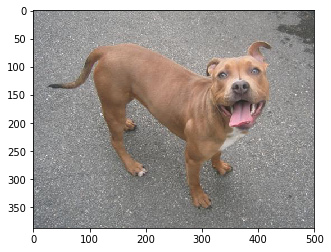

In [17]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # normally we'd set p=0.5
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomRotation'><tt>transforms.RandomRotation(<em>degrees</em>)</tt></a>
If degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees).<br>
Run the cell below several times to see a sample of rotations.

torch.Size([3, 387, 500])


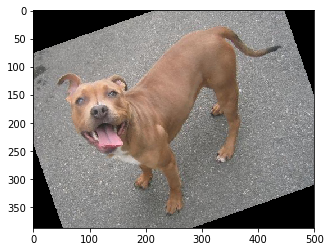

In [18]:
transform = transforms.Compose([
    transforms.RandomRotation(30),  # rotate randomly between +/- 30 degrees
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### Scaling is done using <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Resize'><tt>transforms.Resize(<em>size</em>)</tt></a>

torch.Size([3, 224, 224])


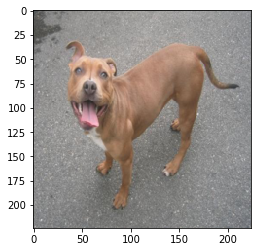

In [19]:
transform = transforms.Compose([
    transforms.Resize((224,224)),  # be sure to pass in a list or a tuple
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Let's put it all together

torch.Size([3, 224, 224])


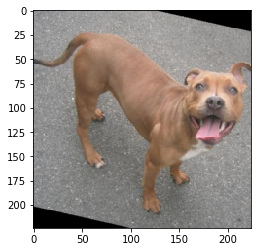

In [20]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # normally we'd set p=0.5
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224), 
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

___
## Normalization
Once the image has been loaded into a tensor, we can perform normalization on it. This serves to make convergence happen quicker during training. The values are somewhat arbitrary - you can use a mean of 0.5 and a standard deviation of 0.5 to convert a range of [0,1] to [-1,1], for example.<br>However, <a href='https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/22'>research has shown</a> that mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225] work well in practice.

### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize'><tt>transforms.Normalize(<em>mean, std</em>)</tt></a>
Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n channels, this transform will normalize each channel of the input tensor
### $\quad\textrm {input[channel]} = \frac{\textrm{input[channel] - mean[channel]}}{\textrm {std[channel]}}$

In [77]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

NameError: name 'dog' is not defined

Recall that before normalization, the upper-leftmost tensor had pixel values of <tt>[0.3529, 0.3725, 0.3843]</tt>.<br>
With normalization we subtract the channel mean from the input channel, then divide by the channel std.<br><br>
$\frac{(0.3529-0.485)}{0.229}=-0.5767\quad\frac{(0.3725-0.456)}{0.224}=-0.3725\quad\frac{(0.3843-0.406)}{0.225}=-0.0964$<br>

In [23]:
# After normalization:
im[:,0,0]

tensor([-0.5767, -0.3725, -0.0964])

When displayed, matplotlib clipped this particular pixel up to [0,0,0] so it appears black on the screen. However, the appearance isn't important; the goal of normalization is improved mathematical performance.

### Optional: De-normalize the images
To see the image back in its true colors, we can apply an inverse-transform to the tensor being displayed.

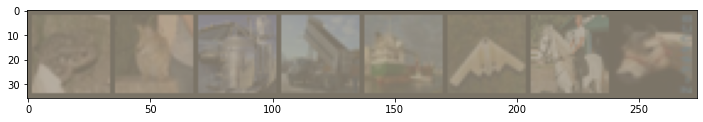

In [76]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

Note that the original tensor was not modified:

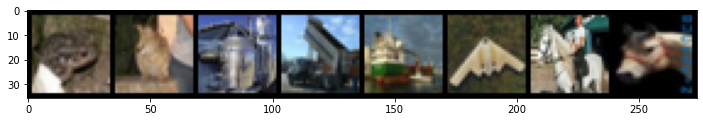

In [75]:
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

# CNN on Custom Images
For this exercise we're using a collection of Cats and Dogs images inspired by the classic <a href='https://www.kaggle.com/c/dogs-vs-cats'>Kaggle competition</a>.

In the last section we downloaded the files, looked at the directory structure, examined the images, and performed a variety of transforms in preparation for training.

In this section we'll define our model, then feed images through a training and validation sequence using DataLoader.



### Image files directory tree
<pre>.
└── Data
    └── CATS_DOGS
        ├── test
        │   ├── CAT
        │   │   ├── 9374.jpg
        │   │   ├── 9375.jpg
        │   │   └── ... (3,126 files)
        │   └── DOG
        │       ├── 9374.jpg
        │       ├── 9375.jpg
        │       └── ... (3,125 files)       
        │           
        └── train
            ├── CAT
            │   ├── 0.jpg
            │   ├── 1.jpg
            │   └── ... (9,371 files)
            └── DOG
                ├── 0.jpg
                ├── 1.jpg
                └── ... (9,372 files)</pre>

## Perform standard imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## Define transforms
In the previous section we looked at a variety of transforms available for data augmentation (rotate, flip, etc.) and normalization.<br>
Here we'll combine the ones we want, including the <a href='https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/22'>recommended normalization parameters</a> for mean and std per channel.

In [2]:
train_transform = transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

## Prepare train and test sets, loaders
We're going to take advantage of a built-in torchvision dataset tool called <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder'><tt><strong>ImageFolder</strong></tt></a>.

In [3]:
root = '../Data/CATS_DOGS'

train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)

torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['CAT', 'DOG']
Training images available: 18743
Testing images available:  6251


## Display a batch of images
To verify that the training loader selects cat and dog images at random, let's show a batch of loaded images.<br>
Recall that imshow clips pixel values <0, so the resulting display lacks contrast. We'll apply a quick inverse transform to the input tensor so that images show their "true" colors.

Label: [1 0 1 0 0 1 0 1 0 0]
Class: DOG CAT DOG CAT CAT DOG CAT DOG CAT CAT


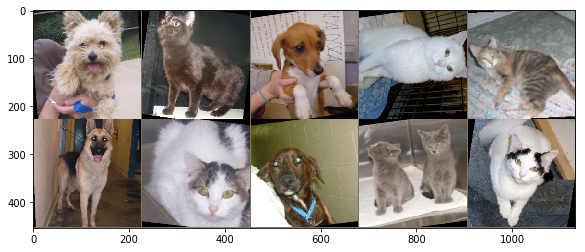

In [4]:
# Grab the first batch of 10 images
for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=5)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

## Define the model
We'll start by using a model similar to the one we applied to the CIFAR-10 dataset, except that here we have a binary classification (2 output channels, not 10). Also, we'll add another set of convolution/pooling layers.

In [5]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(54*54*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

<div class="alert alert-info"><strong>Why <tt>(54x54x16)</tt>?</strong><br>
With 224 pixels per side, the kernels and pooling layers result in $\;(((224-2)/2)-2)/2 = 54.5\;$ which rounds down to 54 pixels per side.</div>

### Instantiate the model, define loss and optimization functions
We're going to call our model "CNNmodel" to differentiate it from an "AlexNetmodel" we'll use later.

In [81]:
torch.manual_seed(101)
CNNmodel = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### Looking at the trainable parameters

In [82]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')

In [83]:
count_parameters(CNNmodel)

     162
       6
     864
      16
   69120
     120
   10080
      84
     840
      10
________
   81302


## Train the model
In the interests of time, we'll limit the number of training batches to 800, and the number of testing batches to 300. We'll train the model on 8000 of 18743 available images, and test it on 3000 out of 6251 images.

In [9]:
import time
start_time = time.time()

epochs = 3

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        # Limit the number of batches
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Limit the number of batches
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = CNNmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [  2000/8000]  loss: 0.73729956  accuracy:  57.150%
epoch:  0  batch:  400 [  4000/8000]  loss: 0.69267005  accuracy:  59.100%
epoch:  0  batch:  600 [  6000/8000]  loss: 0.64823747  accuracy:  61.067%
epoch:  0  batch:  800 [  8000/8000]  loss: 0.45315751  accuracy:  63.200%
epoch:  1  batch:  200 [  2000/8000]  loss: 0.57837021  accuracy:  69.450%
epoch:  1  batch:  400 [  4000/8000]  loss: 0.65500635  accuracy:  69.700%
epoch:  1  batch:  600 [  6000/8000]  loss: 0.85159266  accuracy:  70.433%
epoch:  1  batch:  800 [  8000/8000]  loss: 0.47595224  accuracy:  71.025%
epoch:  2  batch:  200 [  2000/8000]  loss: 0.68083632  accuracy:  74.500%
epoch:  2  batch:  400 [  4000/8000]  loss: 0.32654241  accuracy:  74.025%
epoch:  2  batch:  600 [  6000/8000]  loss: 0.52883595  accuracy:  74.467%
epoch:  2  batch:  800 [  8000/8000]  loss: 0.31269351  accuracy:  74.950%

Duration: 1142 seconds


## Save the trained model

In [11]:
torch.save(CNNmodel.state_dict(), 'CustomImageCNNModel.pt')

## Evaluate model performance

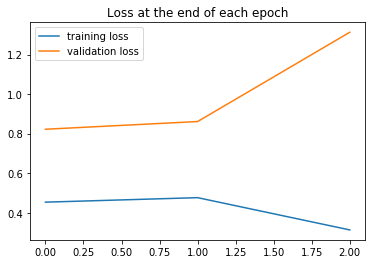

In [12]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

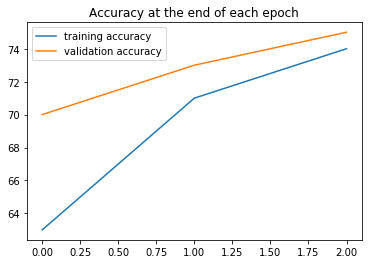

In [13]:
plt.plot([t/80 for t in train_correct], label='training accuracy')
plt.plot([t/30 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [14]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*100/3000:.3f}%')

[tensor(2109), tensor(2195), tensor(2254)]
Test accuracy: 75.133%


## Download a pretrained model
Torchvision has a number of proven models available through <a href='https://pytorch.org/docs/stable/torchvision/models.html#classification'><tt><strong>torchvision.models</strong></tt></a>:
<ul>
<li><a href="https://arxiv.org/abs/1404.5997">AlexNet</a></li>
<li><a href="https://arxiv.org/abs/1409.1556">VGG</a></li>
<li><a href="https://arxiv.org/abs/1512.03385">ResNet</a></li>
<li><a href="https://arxiv.org/abs/1602.07360">SqueezeNet</a></li>
<li><a href="https://arxiv.org/abs/1608.06993">DenseNet</a></li>
<li><a href="https://arxiv.org/abs/1512.00567">Inception</a></li>
<li><a href="https://arxiv.org/abs/1409.4842">GoogLeNet</a></li>
<li><a href="https://arxiv.org/abs/1807.11164">ShuffleNet</a></li>
<li><a href="https://arxiv.org/abs/1801.04381">MobileNet</a></li>
<li><a href="https://arxiv.org/abs/1611.05431">ResNeXt</a></li>
</ul>
These have all been trained on the <a href='http://www.image-net.org/'>ImageNet</a> database of images. Our only task is to reduce the output of the fully connected layers from (typically) 1000 categories to just 2.

To access the models, you can construct a model with random weights by calling its constructor:<br>
<pre>resnet18 = models.resnet18()</pre>
You can also obtain a pre-trained model by passing pretrained=True:<br>
<pre>resnet18 = models.resnet18(pretrained=True)</pre>
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

Feel free to investigate the different models available. Each one will be downloaded to a cache directory the first time they're accessed - from then on they'll be available locally.

For its simplicity and effectiveness, we'll use AlexNet:

In [15]:
AlexNetmodel = models.alexnet(pretrained=True)
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

<div class="alert alert-info">This model uses <a href='https://pytorch.org/docs/master/nn.html#torch.nn.AdaptiveAvgPool2d'><tt><strong>torch.nn.AdaptiveAvgPool2d(<em>output_size</em>)</strong></tt></a> to convert the large matrix coming out of the convolutional layers to a (6x6)x256 matrix being fed into the fully connected layers.</div>

## Freeze feature parameters
We want to freeze the pre-trained weights & biases. We set <tt>.requires_grad</tt> to False so we don't backprop through them.

In [17]:
for param in AlexNetmodel.parameters():
    param.requires_grad = False

## Modify the classifier
Next we need to modify the fully connected layers to produce a binary output. The section is labeled "classifier" in the AlexNet model.<br>
Note that when we assign new layers, their parameters default to <tt>.requires_grad=True</tt>.

In [18]:
torch.manual_seed(42)
AlexNetmodel.classifier = nn.Sequential(nn.Linear(9216, 1024),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(1024, 2),
                                 nn.LogSoftmax(dim=1))
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4)
    (3): Linear(in_featur

In [19]:
# These are the TRAINABLE parameters:
count_parameters(AlexNetmodel)

 9437184
    1024
    2048
       2
________
 9440258


## Define loss function & optimizer
We only want to optimize the classifier parameters, as the feature parameters are frozen.

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNetmodel.classifier.parameters(), lr=0.001)

## Train the model
Remember, we're only training the fully connected layers. The convolutional layers have fixed weights and biases. For this reason, we only need to run one epoch.

In [22]:
import time
start_time = time.time()

epochs = 1

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = AlexNetmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = AlexNetmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [  2000/8000]  loss: 0.01413172  accuracy:  88.900%
epoch:  0  batch:  400 [  4000/8000]  loss: 0.24275371  accuracy:  90.825%
epoch:  0  batch:  600 [  6000/8000]  loss: 0.09340305  accuracy:  91.900%
epoch:  0  batch:  800 [  8000/8000]  loss: 0.07545806  accuracy:  92.250%

Duration: 513 seconds


In [23]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*100/3000:.3f}%')

[tensor(2810)]
Test accuracy: 93.667%


## Run a new image through the model
We can also pass a single image through the model to obtain a prediction.<br>
Pick a number from 0 to 6250, assign it to "x", and we'll use that value to select an image from the Cats and Dogs test set.

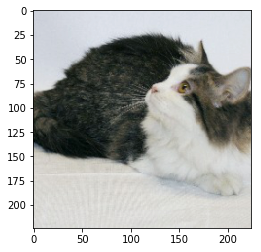

In [31]:
x = 2019
im = inv_normalize(test_data[x][0])
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [32]:
test_data[x][0].shape

torch.Size([3, 224, 224])

In [35]:
# CNN Model Prediction:

CNNmodel.eval()
with torch.no_grad():
    new_pred = CNNmodel(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 1 DOG


In [36]:
# AlexNet Model Prediction:

AlexNetmodel.eval()
with torch.no_grad():
    new_pred = AlexNetmodel(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 0 CAT


# CNN Exercises
For these exercises we'll work with the <a href='https://www.kaggle.com/zalando-research/fashionmnist'>Fashion-MNIST</a> dataset, also available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. Like MNIST, this dataset consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

## Perform standard imports, load the Fashion-MNIST dataset
Run the cell below to load the libraries needed for this exercise and the Fashion-MNIST dataset.<br>
PyTorch makes the Fashion-MNIST dataset available through <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist'><tt><strong>torchvision</strong></tt></a>. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.

In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../Data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

100%|██████████| 26421880/26421880 [00:16<00:00, 1573128.08it/s]


Extracting ../Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../Data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 214699.89it/s]


Extracting ../Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../Data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2725285.26it/s]


Extracting ../Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 25107298.83it/s]

Extracting ../Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/FashionMNIST/raw



## 1. Create data loaders
Use DataLoader to create a <tt>train_loader</tt> and a <tt>test_loader</tt>. Batch sizes should be 10 for both.

In [85]:
# CODE HERE
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)


In [2]:
# DON'T WRITE HERE

## 2. Examine a batch of images
Use DataLoader, <tt>make_grid</tt> and matplotlib to display the first batch of 10 images.<br>
OPTIONAL: display the labels as well

In [92]:
for e, x in train_loader:
    break

In [96]:
e[:10]

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [105]:
x.numpy()

array([    2,     1,     7,     0,     4,     1,     0,     7,     5,
           4,     9,     2,     2,     3,     8,     4,     0,     9,
           9,     7,     5,     8,     8,     8,     6,     2,     5,
           7,     8,     1,     4,     0])

[    2     1     7     0     4     1     0     7     5     4]


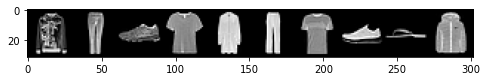

In [106]:
# CODE HERE
print(x[:10].numpy())
im = make_grid(e[:10], nrow=10)
plt.figure(figsize=(8,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))





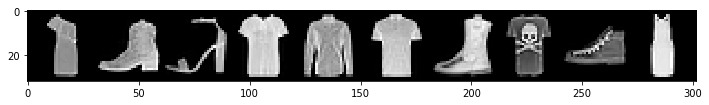

In [3]:
# DON'T WRITE HERE
# IMAGES ONLY

Label:  [9 2 5 9 4 2 1 2 7 3]
Class:  Boot Sweater Sandal Boot Coat Sweater Trouser Sweater Sneaker Dress


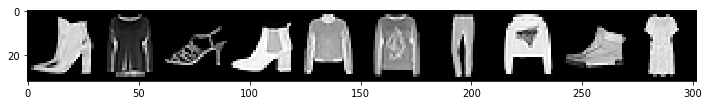

In [4]:
# DON'T WRITE HERE
# IMAGES AND LABELS

## Downsampling
<h3>3. If a 28x28 image is passed through a Convolutional layer using a 5x5 filter, a step size of 1, and no padding, what is the resulting matrix size?</h3>

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [107]:
##################################################
###### ONLY RUN THIS TO CHECK YOUR ANSWER! ######
################################################

# Run the code below to check your answer:
conv = nn.Conv2d(1, 1, 5, 1)
for x,labels in train_loader:
    print('Orig size:',x.shape)
    break
x = conv(x)
print('Down size:',x.shape)

Orig size: torch.Size([32, 1, 28, 28])
Down size: torch.Size([32, 1, 24, 24])


### 4. If the sample from question 3 is then passed through a 2x2 MaxPooling layer, what is the resulting matrix size?

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [108]:
##################################################
###### ONLY RUN THIS TO CHECK YOUR ANSWER! ######
################################################

# Run the code below to check your answer:
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

Down size: torch.Size([32, 1, 12, 12])


## CNN definition
### 5. Define a convolutional neural network
Define a CNN model that can be trained on the Fashion-MNIST dataset. The model should contain two convolutional layers, two pooling layers, and two fully connected layers. You can use any number of neurons per layer so long as the model takes in a 28x28 image and returns an output of 10. Portions of the definition have been filled in for convenience.

In [ ]:
# CODE HERE
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d()

    def forward(self, X):
         
        return 
    
torch.manual_seed(101)
model = ConvolutionalNetwork()

## Trainable parameters

### 6. What is the total number of trainable parameters (weights & biases) in the model above?
Answers will vary depending on your model definition.

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [ ]:
# CODE HERE

### 7. Define loss function & optimizer
Define a loss function called "criterion" and an optimizer called "optimizer".<br>
You can use any functions you want, although we used Cross Entropy Loss and Adam (learning rate of 0.001) respectively.

In [ ]:
# CODE HERE




In [6]:
# DON'T WRITE HERE

### 8. Train the model
Don't worry about tracking loss values, displaying results, or validating the test set. Just train the model through 5 epochs. We'll evaluate the trained model in the next step.<br>
OPTIONAL: print something after each epoch to indicate training progress.

In [ ]:
# CODE HERE






1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


### 9. Evaluate the model
Set <tt>model.eval()</tt> and determine the percentage correct out of 10,000 total test images.

In [ ]:
# CODE HERE






Test accuracy: 8733/10000 =  87.330%


# CNN Exercises - Solutions
For these exercises we'll work with the <a href='https://www.kaggle.com/zalando-research/fashionmnist'>Fashion-MNIST</a> dataset, also available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. Like MNIST, this dataset consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

## Perform standard imports, load the Fashion-MNIST dataset
Run the cell below to load the libraries needed for this exercise and the Fashion-MNIST dataset.<br>
PyTorch makes the Fashion-MNIST dataset available through <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist'><tt><strong>torchvision</strong></tt></a>. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../Data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

## 1. Create data loaders
Use DataLoader to create a <tt>train_loader</tt> and a <tt>test_loader</tt>. Batch sizes should be 10 for both.

In [ ]:
# CODE HERE




In [2]:
# DON'T WRITE HERE
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

## 2. Examine a batch of images
Use DataLoader, <tt>make_grid</tt> and matplotlib to display the first batch of 10 images.<br>
OPTIONAL: display the labels as well

In [ ]:
# CODE HERE







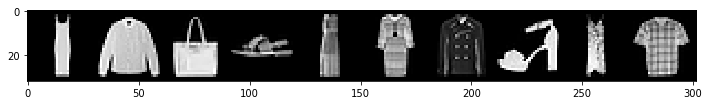

In [3]:
# DON'T WRITE HERE
# IMAGES ONLY
for images,labels in train_loader: 
    break

im = make_grid(images, nrow=10)
plt.figure(figsize=(12,4))

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

Label:  [3 0 0 3 1 3 5 4 8 8]
Class:  Dress T-shirt T-shirt Dress Trouser Dress Sandal Coat Bag Bag


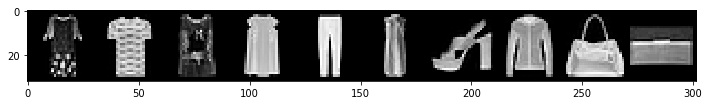

In [4]:
# DON'T WRITE HERE
# IMAGES AND LABELS
for images,labels in train_loader: 
    break

print('Label: ', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=10)
plt.figure(figsize=(12,4))

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Downsampling
<h3>3. If a 28x28 image is passed through a Convolutional layer using a 5x5 filter, a step size of 1, and no padding, what is the resulting matrix size?</h3>

<div style='border:1px black solid; padding:5px'>A 5x5 filter leaves a two-pixel border on each side, so the overall dimension is reduced by 4.<br>
The result is a 24x24 matrix.</div>

In [5]:
# Run the code below to check your answer:
conv = nn.Conv2d(1, 1, 5, 1)
for x,labels in train_loader:
    print('Orig size:',x.shape)
    break
x = conv(x)
print('Down size:',x.shape)

Orig size: torch.Size([10, 1, 28, 28])
Down size: torch.Size([10, 1, 24, 24])


### 4. If the sample from question 3 is then passed through a 2x2 MaxPooling layer, what is the resulting matrix size?

<div style='border:1px black solid; padding:5px'>
If a 2x2 pooling layer is applied to a 24x24 matrix, each side is divided by two, and rounded down if necessary.<br>
The result is a 12x12 matrix.
</div>

In [6]:
# Run the code below to check your answer:
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

Down size: torch.Size([10, 1, 12, 12])


## CNN definition
### 5. Define a convolutional neural network
Define a CNN model that can be trained on the Fashion-MNIST dataset. The model should contain two convolutional layers, two pooling layers, and two fully connected layers. You can use any number of neurons per layer so long as the model takes in a 28x28 image and returns an output of 10. Portions of the definition have been filled in for convenience.

In [7]:
# DON'T WRITE HERE
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)
    
torch.manual_seed(101)
model = ConvolutionalNetwork()

## Trainable parameters

### 6. What is the total number of trainable parameters (weights & biases) in the model above?
Answers will vary depending on your model definition.

<div style='border:1px black solid; padding:5px'>
$\quad\begin{split}(1\times6\times3\times3)+6+(6\times16\times3\times3)+16+(400\times100)+100+(100\times10)+10 &=\\
54+6+864+16+40000+100+1000+10 &= 42,050\end{split}$<br>
</div>

In [8]:
# Run the code below to check your answer:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

    54
     6
   864
    16
 40000
   100
  1000
    10
______
 42050


### 7. Define loss function & optimizer
Define a loss function called "criterion" and an optimizer called "optimizer".<br>
You can use any functions you want, although we used Cross Entropy Loss and Adam (learning rate of 0.001) respectively.

In [9]:
# DON'T WRITE HERE
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### 8. Train the model
Don't worry about tracking loss values, displaying results, or validating the test set. Just train the model through 5 epochs. We'll evaluate the trained model in the next step.<br>
OPTIONAL: print something after each epoch to indicate training progress.

In [10]:
# DON'T WRITE HERE
epochs = 5

for i in range(epochs):
    for X_train, y_train in train_loader:

        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # OPTIONAL print statement
    print(f'{i+1} of {epochs} epochs completed')

1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


### 9. Evaluate the model
Set <tt>model.eval()</tt> and determine the percentage correct out of 10,000 total test images.

In [11]:
# DON'T WRITE HERE
model.eval()

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_loader:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 8733/10000 =  87.330%


# MNIST Code Along with ANN
Before we start working with Convolutional Neural Networks (CNN), let's model the <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST dataset</a> using only linear layers.<br>
In this exercise we'll use the same logic laid out in the ANN notebook. We'll reshape the MNIST data from a 28x28 image to a flattened 1x784 vector to mimic a single row of 784 features.

## Perform standard imports
Torchvision should have been installed by the environment file during setup. If not, you can install it now. At the terminal with your virtual environment activated, run<br>
<pre>conda install torchvision -c pytorch
<em>or</em>
pip install torchvision</pre>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F          # adds some efficiency
from torch.utils.data import DataLoader  # lets us load data in batches
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt
%matplotlib inline

## Load the MNIST dataset
PyTorch makes the MNIST dataset available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.
### Define transform
As part of the loading process, we can apply multiple transformations (reshape, convert to tensor, normalize, etc.) to the incoming data.<br>For this exercise we only need to convert images to tensors. 

In [2]:
transform = transforms.ToTensor()

### Load the training set

In [3]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

### Load the test set
There's a companion set of MNIST data containing 10,000 records accessible by setting train=False. As before, torchvision will only download this once, and in the future will look for the local copy.

In [4]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

### Examine a training record

In [5]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Calling the first record from <tt>train_data</tt> returns a two-item tuple. The first item is our 28x28 tensor representing the image. The second is a label, in this case the number "5".

In [6]:
image, label = train_data[0]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([1, 28, 28]) 
Label: 5


### View the image
Matplotlib can interpret pixel values through a variety of <a href='https://matplotlib.org/tutorials/colors/colormaps.html'>colormaps</a>.

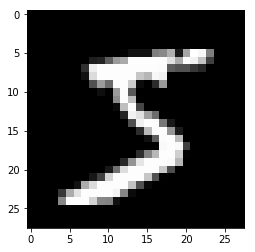

In [7]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap="gray");

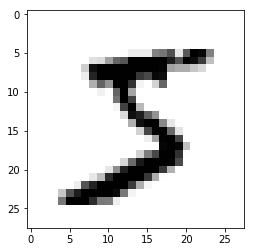

In [8]:
plt.imshow(train_data[0][0].reshape((28,28)), cmap="gist_yarg");

## Batch loading with DataLoader
Our training set contains 60,000 records. If we look ahead to our model we have 784 incoming features, hidden layers of 120 and 84 neurons, and 10 output features. Including the bias terms for each layer, the total number of parameters being trained is:<br>

$\begin{split}\quad(784\times120)+120+(120\times84)+84+(84\times10)+10 &=\\
94080+120+10080+84+840+10 &= 105,214\end{split}$<br>

For this reason it makes sense to load training data in batches using <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><tt><strong>DataLoader</strong></tt></a>.

In [9]:
torch.manual_seed(101)  # for consistent results

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In the cell above, <tt><strong>train_data</strong></tt> is a PyTorch <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset'><em>Dataset</em></a> object (an object that supports data loading and sampling).<br>
The <tt><strong>batch_size</strong></tt> is the number of records to be processed at a time. If it's not evenly divisible into the dataset, then the final batch contains the remainder.<br>
Setting <tt><strong>shuffle</strong></tt> to True means that the dataset will be shuffled after each epoch.

<div class="alert alert-info"><strong>NOTE:</strong> DataLoader takes an optional <tt><strong>num_workers</strong></tt> parameter that sets up how many subprocesses to use for data loading. This behaves differently with different operating systems so we've omitted it here. See <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'>the docs</a> for more information.</div>

### View a batch of images
Once we've defined a DataLoader, we can create a grid of images using <a href='https://pytorch.org/docs/stable/torchvision/utils.html#torchvision.utils.make_grid'><tt><strong>torchvision.utils.make_grid</strong></tt></a>

Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


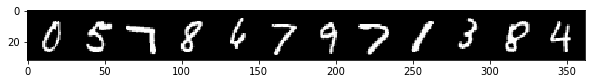

In [10]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # to widen the printed array

# Grab the first batch of images
for images,labels in train_loader: 
    break

# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Define the model
For this exercise we'll use fully connected layers to develop a <a href='https://en.wikipedia.org/wiki/Multilayer_perceptron'>multilayer perceptron</a>.<br>
Our input size is 784 once we flatten the incoming 28x28 tensors.<br>
Our output size represents the 10 possible digits.<br>
We'll set our hidden layers to [120, 84] for now. Once you've completed the exercise feel free to come back and try different values.

In [11]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [12]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

<div class="alert alert-info"><strong>NOTE:</strong> You may have noticed our shortcut for adding ReLU to the linear layer. In the last section this was done under the <tt>__init__</tt> section as
<pre style='background-color:rgb(217,237,247)'>
layerlist = []
for i in layers:
    layerlist.append(nn.Linear(n_in,i)) 
    layerlist.append(nn.ReLU(inplace=True))
self.layers = nn.Sequential(*layerlist)</pre>
    
Here we're calling <tt>F.relu()</tt> as a functional wrapper on the linear layer directly:
<pre style='background-color:rgb(217,237,247)'>
def forward(self,X):
    X = F.relu(self.fc1(X))</pre></div>

## Count the model parameters
This optional step shows that the number of trainable parameters in our model matches the equation above.

In [13]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [14]:
count_parameters(model)

 94080
   120
 10080
    84
   840
    10
______
105214


## Define loss function & optimizer

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Flatten the training data
The batch tensors fed in by DataLoader have a shape of [100, 1, 28, 28]:

In [16]:
# Load the first batch, print its shape
for images, labels in train_loader:
    print('Batch shape:', images.size())
    break
    
# EQUIVALENT TO:
# dataiter = iter(train_loader)
# images, labels = dataiter.next()
# print('Batch shape:', images.size())

Batch shape: torch.Size([100, 1, 28, 28])


We can flatten them using <tt>.view()</tt>

In [17]:
images.view(100,-1).size()

torch.Size([100, 784])

We'll do this just before applying the model to our data.

## Train the model
This time we'll run the test data through the model during each epoch, so that we can compare loss & accuracy on the same plot.

<div class="alert alert-info"><strong>A QUICK NOTE: </strong>In the section below marked &nbsp;<tt><em>#Tally the number of correct predictions</em></tt> &nbsp;we include the code
<pre style='background-color:rgb(217,237,247)'>
predicted = torch.max(y_pred.data, 1)[1]</pre>
This uses the <a href='https://pytorch.org/docs/stable/torch.html#torch.max'><tt><strong>torch.max()</strong></tt></a> function. <tt>torch.max()</tt> returns a tensor of maximum values, and a tensor of the indices where the max values were found. In our code we're asking for the index positions of the maximum values along dimension 1. In this way we can match predictions up to image labels.</div>

In [18]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.35221729  accuracy:  82.695%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.32761699  accuracy:  87.340%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.31156573  accuracy:  89.490%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.20120722  accuracy:  94.800%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.14656080  accuracy:  95.185%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.12691295  accuracy:  95.478%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.13621402  accuracy:  96.815%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.07235763  accuracy:  96.790%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.04241359  accuracy:  96.878%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.09474990  accuracy:  97.635%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.06394162  accuracy:  97.600%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.07836709  accuracy:  97.562%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.05509195  accuracy:  98.135%
epoch:  4  b

## Plot the loss and accuracy comparisons

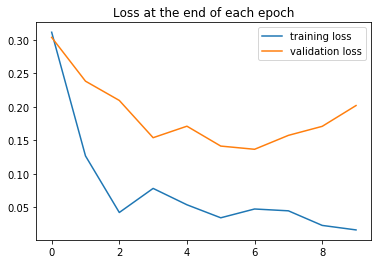

In [19]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

This shows some evidence of overfitting the training data.

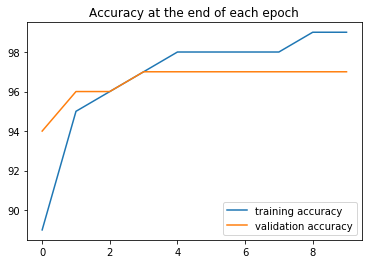

In [20]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

## Evaluate Test Data
We retained the test scores during our training session:

In [21]:
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(9439), tensor(9635), tensor(9666), tensor(9726), tensor(9746), tensor(9758), tensor(9737), tensor(9749), tensor(9746), tensor(9725)]

Test accuracy: 97.250%


However, we'd like to compare the predicted values to the ground truth (the y_test labels), so we'll run the test set through the trained model all at once.

In [22]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [23]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9725/10000 =  97.250%


Not bad considering that a random guess gives only 10% accuracy!

## Display the confusion matrix
This uses scikit-learn, and the predicted values obtained above.

In [24]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 968    0    1    0    1    2    5    0    4    1]
 [   0 1126    4    0    0    0    2    5    0    4]
 [   2    1 1007    4    3    0    0   10    5    0]
 [   1    0    5  985    0    2    1    3    4    7]
 [   1    0    1    0  962    1    3    1    3   12]
 [   2    1    1   13    0  882   33    1   23   16]
 [   1    2    2    0    5    1  913    0    1    0]
 [   1    1    5    5    3    2    0 1003    7    7]
 [   2    4    6    2    1    2    1    1  925    8]
 [   2    0    0    1    7    0    0    4    2  954]]


This shows that the model had the greatest success with ones, twos and sevens, and the lowest with fives, sixes and eights.

## Examine the misses
We can track the index positions of "missed" predictions, and extract the corresponding image and label. We'll do this in batches to save screen space.

In [25]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

275

In [26]:
# Display the first 10 index positions
misses[:10]

array([  61,   62,   81,  104,  115,  151,  193,  217,  247,  259],
      dtype=int64)

In [27]:
# Set up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Now that everything is set up, run and re-run the cell below to view all of the missed predictions.<br>
Use <kbd>Ctrl+Enter</kbd> to remain on the cell between runs. You'll see a <tt>StopIteration</tt> once all the misses have been seen.

Index: [  61   62   81  104  115  151  193  217  247  259  264  320]
Label: [   8    9    6    9    4    9    9    6    4    6    9    9]
Guess: [   2    5    5    5    9    8    8    5    6    0    4    8]


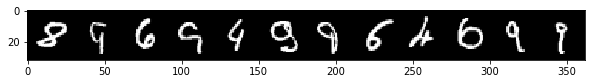

In [28]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

# MNIST Code Along with CNN
Now that we've seen the results of an artificial neural network model on the <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST dataset</a>, let's work the same data with a <a href='https://en.wikipedia.org/wiki/Convolutional_neural_network'>Convolutional Neural Network</a> (CNN).
Make sure to watch the theory lectures! You'll want to be comfortable with:
* convolutional layers
* filters/kernels
* pooling
* depth, stride and zero-padding

Note that in this exercise there is no need to flatten the MNIST data, as a CNN expects 2-dimensional data.

## Perform standard imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

## Load the MNIST dataset
PyTorch makes the MNIST train and test datasets available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. The first time they're called, the datasets will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.

Refer to the previous section for explanations of transformations, batch sizes and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><tt><strong>DataLoader</strong></tt></a>.

In [2]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

### Create loaders
When working with images, we want relatively small batches; a batch size of 4 is not uncommon.

In [5]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

## Define a convolutional model
In the previous section we used only fully connected layers, with an input layer of 784 (our flattened 28x28 images), hidden layers of 120 and 84 neurons, and an output size representing 10 possible digits.

This time we'll employ two convolutional layers and two pooling layers before feeding data through fully connected hidden layers to our output. The model follows CONV/RELU/POOL/CONV/RELU/POOL/FC/RELU/FC.

<div class="alert alert-info"><strong>Let's walk through the steps we're about to take.</strong><br>

1. Extend the base Module class:
   
<tt><font color=black>class ConvolutionalNetwork(nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()</font></tt><br>

2. Set up the convolutional layers with <a href='https://pytorch.org/docs/stable/nn.html#conv2d'><tt><strong>torch.nn.Conv2d()</strong></tt></a><br><br>The first layer has one input channel (the grayscale color channel). We'll assign 6 output channels for feature extraction. We'll set our kernel size to 3 to make a 3x3 filter, and set the step size to 1.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.conv1 = nn.Conv2d(1, 6, 3, 1)</font></tt><br>
The second layer will take our 6 input channels and deliver 16 output channels.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.conv2 = nn.Conv2d(6, 16, 3, 1)</font></tt><br><br>

3. Set up the fully connected layers with <a href='https://pytorch.org/docs/stable/nn.html#linear'><tt><strong>torch.nn.Linear()</strong></tt></a>.<br><br>The input size of (5x5x16) is determined by the effect of our kernels on the input image size. A 3x3 filter applied to a 28x28 image leaves a 1-pixel edge on all four sides. In one layer the size changes from 28x28 to 26x26. We could address this with zero-padding, but since an MNIST image is mostly black at the edges, we should be safe ignoring these pixels. We'll apply the kernel twice, and apply pooling layers twice, so our resulting output will be 
$\;(((28-2)/2)-2)/2 = 5.5\;$ which rounds down to 5 pixels per side.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.fc1 = nn.Linear(5\*5\*16, 120)</font></tt><br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.fc2 = nn.Linear(120, 84)</font></tt><br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.fc3 = nn.Linear(84, 10)</font></tt><br>
See below for a more detailed look at this step.<br><br>

4. Define the forward method.<br><br>Activations can be applied to the convolutions in one line using <a href='https://pytorch.org/docs/stable/nn.html#id27'><tt><strong>F.relu()</strong></tt></a> and pooling is done using <a href='https://pytorch.org/docs/stable/nn.html#maxpool2d'><tt><strong>F.max_pool2d()</strong></tt></a><br>
<tt><font color=black>def forward(self, X):<br>
&nbsp;&nbsp;&nbsp;&nbsp;X = F.relu(self.conv1(X))<br>
&nbsp;&nbsp;&nbsp;&nbsp;X = F.max_pool2d(X, 2, 2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;X = F.relu(self.conv2(X))<br>
&nbsp;&nbsp;&nbsp;&nbsp;X = F.max_pool2d(X, 2, 2)<br>
</font></tt>Flatten the data for the fully connected layers:<br><tt><font color=black>
&nbsp;&nbsp;&nbsp;&nbsp;X = X.view(-1, 5\*5\*16)<br>
&nbsp;&nbsp;&nbsp;&nbsp;X = F.relu(self.fc1(X))<br>
&nbsp;&nbsp;&nbsp;&nbsp;X = self.fc2(X)<br>
&nbsp;&nbsp;&nbsp;&nbsp;return F.log_softmax(X, dim=1)</font></tt>
</div>

<div class="alert alert-danger"><strong>Breaking down the convolutional layers</strong> (this code is for illustration purposes only.)</div>

In [6]:
# Define layers
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [7]:
# Grab the first MNIST record
for i, (X_train, y_train) in enumerate(train_data):
    break

In [8]:
# Create a rank-4 tensor to be passed into the model
# (train_loader will have done this already)
x = X_train.view(1,1,28,28)
print(x.shape)

torch.Size([1, 1, 28, 28])


In [9]:
# Perform the first convolution/activation
x = F.relu(conv1(x))
print(x.shape)

torch.Size([1, 6, 26, 26])


In [10]:
# Run the first pooling layer
x = F.max_pool2d(x, 2, 2)
print(x.shape)

torch.Size([1, 6, 13, 13])


In [11]:
# Perform the second convolution/activation
x = F.relu(conv2(x))
print(x.shape)

torch.Size([1, 16, 11, 11])


In [12]:
# Run the second pooling layer
x = F.max_pool2d(x, 2, 2)
print(x.shape)

torch.Size([1, 16, 5, 5])


In [13]:
# Flatten the data
x = x.view(-1, 5*5*16)
print(x.shape)

torch.Size([1, 400])


<div class="alert alert-danger"><strong>This is how the convolution output is passed into the fully connected layers.</strong></div>

Now let's run the code.

In [14]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [15]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Including the bias terms for each layer, the total number of parameters being trained is:<br>

$\quad\begin{split}(1\times6\times3\times3)+6+(6\times16\times3\times3)+16+(400\times120)+120+(120\times84)+84+(84\times10)+10 &=\\
54+6+864+16+48000+120+10080+84+840+10 &= 60,074\end{split}$<br>

In [16]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [17]:
count_parameters(model)

    54
     6
   864
    16
 48000
   120
 10080
    84
   840
    10
______
 60074


## Define loss function & optimizer

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Train the model
This time we'll feed the data directly into the model without flattening it first.

In [19]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  # we don't flatten X-train here
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  600 [  6000/60000]  loss: 0.21188490  accuracy:  78.233%
epoch:  0  batch: 1200 [ 12000/60000]  loss: 0.58768761  accuracy:  85.433%
epoch:  0  batch: 1800 [ 18000/60000]  loss: 0.03002630  accuracy:  88.539%
epoch:  0  batch: 2400 [ 24000/60000]  loss: 0.02856987  accuracy:  90.396%
epoch:  0  batch: 3000 [ 30000/60000]  loss: 0.01619262  accuracy:  91.543%
epoch:  0  batch: 3600 [ 36000/60000]  loss: 0.00392615  accuracy:  92.347%
epoch:  0  batch: 4200 [ 42000/60000]  loss: 0.07892600  accuracy:  92.938%
epoch:  0  batch: 4800 [ 48000/60000]  loss: 0.00173595  accuracy:  93.458%
epoch:  0  batch: 5400 [ 54000/60000]  loss: 0.00021752  accuracy:  93.889%
epoch:  0  batch: 6000 [ 60000/60000]  loss: 0.00123056  accuracy:  94.245%
epoch:  1  batch:  600 [  6000/60000]  loss: 0.03455487  accuracy:  97.967%
epoch:  1  batch: 1200 [ 12000/60000]  loss: 0.25245315  accuracy:  97.792%
epoch:  1  batch: 1800 [ 18000/60000]  loss: 0.15286988  accuracy:  97.833%
epoch:  1  b

## Plot the loss and accuracy comparisons

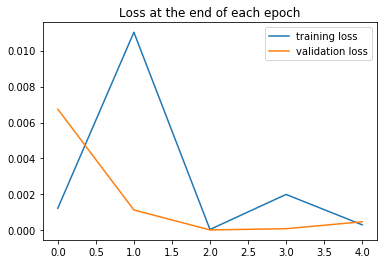

In [20]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [21]:
test_losses

[tensor(0.0067),
 tensor(0.0011),
 tensor(2.5534e-05),
 tensor(9.3650e-05),
 tensor(0.0005)]

While there may be some overfitting of the training data, there is far less than we saw with the ANN model.

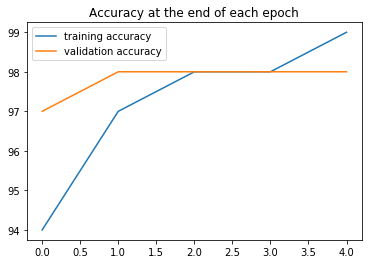

In [22]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

## Evaluate Test Data

In [23]:
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [24]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9848/10000 =  98.480%


Recall that our [784,120,84,10] ANN returned an accuracy of 97.25% after 10 epochs. And it used 105,214 parameters to our current 60,074.

## Display the confusion matrix

In [25]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 977    0    3    2    2    2    4    1   10    2]
 [   0 1132    5    1    1    0    3    7    1    2]
 [   0    0 1015    1    0    0    0    4    3    0]
 [   0    2    0 1001    0   11    0    1    3    4]
 [   0    0    1    0  966    0    1    0    2    2]
 [   0    0    0    1    0  863    2    0    0    2]
 [   1    0    0    0    3    4  948    0    0    0]
 [   1    0    5    0    0    1    0 1005    1    2]
 [   1    1    3    4    1    4    0    2  948    2]
 [   0    0    0    0    9    7    0    8    6  993]]


## Examine the misses
We can track the index positions of "missed" predictions, and extract the corresponding image and label. We'll do this in batches to save screen space.

In [26]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

152

In [27]:
# Display the first 10 index positions
misses[:10]

array([  18,  111,  175,  184,  247,  321,  340,  412,  445,  460],
      dtype=int64)

In [28]:
# Set up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Now that everything is set up, run and re-run the cell below to view all of the missed predictions.<br>
Use <kbd>Ctrl+Enter</kbd> to remain on the cell between runs. You'll see a <tt>StopIteration</tt> once all the misses have been seen.

Index: [  18  111  175  184  247  321  340  412  445  460  495  582]
Label: [   3    7    7    8    4    2    5    5    6    5    8    8]
Guess: [   8    1    1    3    6    7    3    3    0    9    0    2]


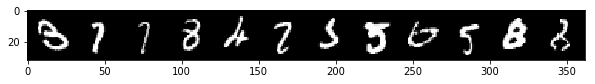

In [30]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Run a new image through the model
We can also pass a single image through the model to obtain a prediction.
Pick a number from 0 to 9999, assign it to "x", and we'll use that value to select a number from the MNIST test set.

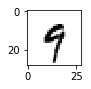

In [31]:
x = 2019
plt.figure(figsize=(1,1))
plt.imshow(test_data[x][0].reshape((28,28)), cmap="gist_yarg");

In [32]:
model.eval()
with torch.no_grad():
    new_pred = model(test_data[x][0].view(1,1,28,28)).argmax()
print("Predicted value:",new_pred.item())

Predicted value: 9


# CIFAR Code Along with CNN
The <a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a> dataset is similar to MNIST, except that instead of one color channel (grayscale) there are three channels (RGB).<br>
Where an MNIST image has a size of (1,28,28), CIFAR images are (3,32,32). There are 10 categories an image may fall under:
0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

As with the previous code along, make sure to watch the theory lectures! You'll want to be comfortable with:
* convolutional layers
* filters/kernels
* pooling
* depth, stride and zero-padding

## Perform standard imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sn  # for heatmaps
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

## Load the CIFAR-10 dataset
PyTorch makes the CIFAR-10 train and test datasets available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. The first time they're called, the datasets will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.<br>The set contains 50,000 train and 10,000 test images.

Refer to the previous section for explanations of transformations, batch sizes and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><tt><strong>DataLoader</strong></tt></a>.

In [2]:
transform = transforms.ToTensor()

train_data = datasets.CIFAR10(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='../Data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [4]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

### Create loaders

In [5]:
torch.manual_seed(101)  # for reproducible results

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

### Define strings for labels
We can call the labels whatever we want, so long as they appear in the order of 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'. Here we're using 5-character labels padded with spaces so that our reports line up later.

In [6]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

We don't want to use the variable name "class" here, as it would overwrite Python's built-in keyword.

## View a batch of images

Label: [    3     2     0     4     9     5     1     2     4     8]
Class:    cat  bird plane  deer truck   dog   car  bird  deer  ship


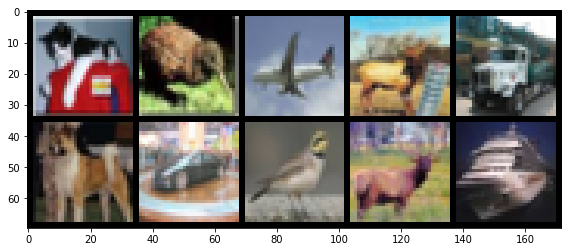

In [7]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}')) # to widen the printed array

# Grab the first batch of 10 images
for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

# Print the images
im = make_grid(images, nrow=5)  # the default nrow is 8
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Define the model
In the previous section we used two convolutional layers and two pooling layers before feeding data through a fully connected hidden layer to our output. The model follows CONV/RELU/POOL/CONV/RELU/POOL/FC/RELU/FC. We'll use the same format here.

The only changes are:
* take in 3-channel images instead of 1-channel
* adjust the size of the fully connected input<br>

Our first convolutional layer will have 3 input channels, 6 output channels, a kernel size of 3 (resulting in a 3x3 filter), and a stride length of 1 pixel.<br>These are passed in as <tt>nn.Conv2d(3,6,3,1)</tt>

In [8]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)  # changed from (1, 6, 5, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(6*6*16, 120)   # changed from (4*4*16) to fit 32x32 images with 3x3 filters
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 6*6*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

<div class="alert alert-info"><strong>Why <tt>(6x6x16)</tt> instead of <tt>(5x5x16)</tt>?</strong><br>
With MNIST the kernels and pooling layers resulted in $\;(((28−2)/2)−2)/2=5.5 \;$ which rounds down to 5 pixels per side.<br>
With CIFAR the result is $\;(((32-2)/2)-2)/2 = 6.5\;$ which rounds down to 6 pixels per side.</div>

In [9]:
torch.manual_seed(101)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Including the bias terms for each layer, the total number of parameters being trained is:<br>

$\quad\begin{split}(3\times6\times3\times3)+6+(6\times16\times3\times3)+16+(576\times120)+120+(120\times84)+84+(84\times10)+10 &=\\
162+6+864+16+69120+120+10080+84+840+10 &= 81,302\end{split}$<br>

In [10]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [11]:
count_parameters(model)

   162
     6
   864
    16
 69120
   120
 10080
    84
   840
    10
______
 81302


## Define loss function & optimizer

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Train the model
This time we'll feed the data directly into the model without flattening it first.<br>
<div class="alert alert-info"><font color=blue><strong>OPTIONAL: </strong>In the event that training takes too long, you can interrupt the kernel, skip ahead to the bottom of the notebook, and load a trained version of the model that's been saved in this folder.</font></div>

In [13]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch: 1000 [ 10000/50000]  loss: 1.72811735  accuracy:  26.660%
epoch:  0  batch: 2000 [ 20000/50000]  loss: 1.90085292  accuracy:  32.790%
epoch:  0  batch: 3000 [ 30000/50000]  loss: 1.77626872  accuracy:  36.507%
epoch:  0  batch: 4000 [ 40000/50000]  loss: 1.32156026  accuracy:  38.925%
epoch:  0  batch: 5000 [ 50000/50000]  loss: 1.37019920  accuracy:  40.922%
epoch:  1  batch: 1000 [ 10000/50000]  loss: 1.18819773  accuracy:  51.520%
epoch:  1  batch: 2000 [ 20000/50000]  loss: 1.21327436  accuracy:  51.725%
epoch:  1  batch: 3000 [ 30000/50000]  loss: 1.15835631  accuracy:  52.283%
epoch:  1  batch: 4000 [ 40000/50000]  loss: 1.28492486  accuracy:  52.587%
epoch:  1  batch: 5000 [ 50000/50000]  loss: 2.28428698  accuracy:  52.930%
epoch:  2  batch: 1000 [ 10000/50000]  loss: 1.22954726  accuracy:  56.750%
epoch:  2  batch: 2000 [ 20000/50000]  loss: 1.51806808  accuracy:  56.725%
epoch:  2  batch: 3000 [ 30000/50000]  loss: 0.82857972  accuracy:  56.847%
epoch:  2  b

## Optional: Save the model
This will save your trained model, without overwriting the saved model we have provided called <strong>CIFAR10-CNN-Model-master.pt</strong>

In [14]:
torch.save(model.state_dict(), 'CIFAR10-CNN-Model.pt')

## Plot the loss and accuracy comparisons

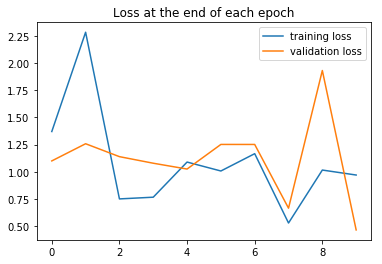

In [15]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

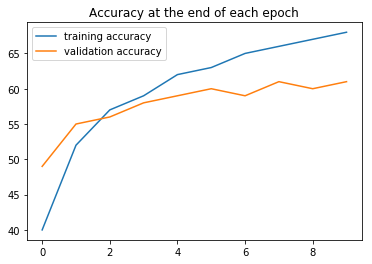

In [16]:
plt.plot([t/500 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

## Evaluate Test Data

In [17]:
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(4940), tensor(5519), tensor(5685), tensor(5812), tensor(5930), tensor(6048), tensor(5941), tensor(6166), tensor(6035), tensor(6105)]

Test accuracy: 61.050%


This is not as impressive as with MNIST, which makes sense. We would have to adjust our parameters to obtain better results.<br>
Still, it's much better than the 10% we'd get with random chance!

## Display the confusion matrix
In order to map predictions against ground truth, we need to run the entire test set through the model.<br>
Also, since our model was not as accurate as with MNIST, we'll use a <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>heatmap</a> to better display the results.

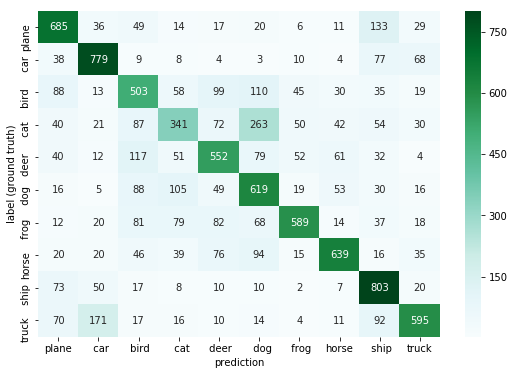

In [18]:
# Create a loader for the entire the test set
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();

For more info on the above chart, visit the docs on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html'>scikit-learn's confusion_matrix</a>, <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps</a>, and <a href='https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html'>matplotlib colormaps</a>. 

## Examine the misses
We can track the index positions of "missed" predictions, and extract the corresponding image and label. We'll do this in batches to save screen space.

In [19]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
# Display the number of misses
len(misses)

3895

In [20]:
# Display the first 8 index positions
misses[:8]

array([    3,     4,     6,     7,     8,    17,    20,    21],
      dtype=int64)

In [21]:
# Set up an iterator to feed batched rows
r = 8   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Now that everything is set up, run and re-run the cell below to view all of the missed predictions.<br>
Use <kbd>Ctrl+Enter</kbd> to remain on the cell between runs. You'll see a <tt>StopIteration</tt> once all the misses have been seen.

Index: [    3     4     6     7     8    17    20    21]
Label: [    0     6     1     6     3     7     7     0]
Class:  plane  frog   car  frog   cat horse horse plane

Guess: [    8     4     2     4     5     3     2     2]
Class:   ship  deer  bird  deer   dog   cat  bird  bird


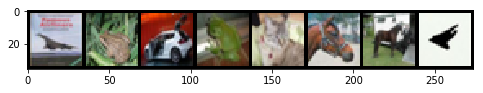

In [22]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}')) # to widen the printed array

nextrow = next(row)
lbls = y_test.index_select(0,torch.tensor(nextrow)).numpy()
gues = predicted.index_select(0,torch.tensor(nextrow)).numpy()
print("Index:", nextrow)
print("Label:", lbls)
print("Class: ", *np.array([class_names[i] for i in lbls]))
print()
print("Guess:", gues)
print("Class: ", *np.array([class_names[i] for i in gues]))

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(8,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

<div class="alert alert-info"><font color=blue><h2>Optional: Load a Saved Model</h2>
In the event that training the ConvolutionalNetwork takes too long, you can load a trained version by running the following code:</font>
<pre style='background-color:rgb(217,237,247)'>
model2 = ConvolutionalNetwork()
model2.load_state_dict(torch.load('CIFAR10-CNN-Model-master.pt'))
model2.eval()</pre>
</div>

In [23]:
# Instantiate the model and load saved parameters
model2 = ConvolutionalNetwork()
model2.load_state_dict(torch.load('CIFAR10-CNN-Model-master.pt'))
model2.eval()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
# Evaluate the saved model against the test set
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model2(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 6105/10000 =  61.050%


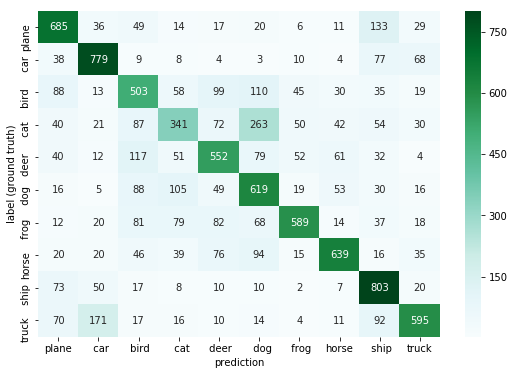

In [25]:
# Display the confusion matrix as a heatmap
arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();

# Loading Real Image Data
So far we've only worked with toy datasets (MNIST, CIFAR-10) conveniently packaged by torchvision, where every image has the same size and shape. Now let's learn the real deal, and work from a varied collection of .jpg files.

For this section we'll be working with a version of the Cats vs. Dogs dataset inspired by a classic <a href='https://www.kaggle.com/c/dogs-vs-cats'>Kaggle competition</a>.<br>
A quick note - do <strong>not</strong> download the dataset from Kaggle! Ours is a cleaned version of the data without any 0by0 files, etc.<br>The images are similar to ones available from the <a href='http://www.image-net.org/'>ImageNet</a> database.

We have organized the files into train and test folders, and further divided the images into CAT and DOG subfolders. In this way the file path contains the label.

### Image files directory tree
<pre>.
└── Data
    └── CATS_DOGS
        ├── test
        │   ├── CAT
        │   │   ├── 9374.jpg
        │   │   ├── 9375.jpg
        │   │   └── ... (3,126 files)
        │   └── DOG
        │       ├── 9374.jpg
        │       ├── 9375.jpg
        │       └── ... (3,125 files)       
        │           
        └── train
            ├── CAT
            │   ├── 0.jpg
            │   ├── 1.jpg
            │   └── ... (9,371 files)
            └── DOG
                ├── 0.jpg
                ├── 1.jpg
                └── ... (9,372 files)</pre>

## Perform standard imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Examine the data
We'll us Python's built-in <a href='https://docs.python.org/3/library/os.html'>os module</a> to walk the directories collecting file names. We'll then use <a href='https://python-pillow.org/'>Pillow</a>, an extension to the Python Imaging Library (PIL), to open image files and extract image sizes. A pandas DataFrame will provide summary statistics on our data like max/min width & height from which we can choose our model parameters.

In [2]:
import os
from PIL import Image
from IPython.display import display

# Filter harmless warnings
import warnings
warnings.filterwarnings("ignore")

<div class="alert-danger"><strong>NOTE: </strong>There's a <a href='https://github.com/python-pillow/Pillow/issues/3769'>known issue</a> with <strong>Pillow v6.0.0</strong> where it cannot open certain .jpg files, and instead raises an<br>
<tt><strong>UnboundLocalError: </strong>local variable 'photoshop' referenced before assignment</tt><br>This is due to be fixed in an upcoming release.
    
For example, the images affected in the CAT test set are:
<pre style='background-color:rgb(242,222,222)'>['../Data/CATS_DOGS/test/CAT/10107.jpg',
 '../Data/CATS_DOGS/test/CAT/10404.jpg',
 '../Data/CATS_DOGS/test/CAT/12086.jpg',
 '../Data/CATS_DOGS/test/CAT/9493.jpg',
 '../Data/CATS_DOGS/test/CAT/9683.jpg']</pre>

If this happens, you can either install an older version of Pillow, or use our pytorch_course_env.yml file.</div>

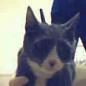

In [3]:
# TEST YOUR VERSION OF PILLOW
# Run this cell. If you see a picture of a cat you're all set!
with Image.open('../Data/CATS_DOGS/test/CAT/10107.jpg') as im:
    display(im)

### Create a list of image filenames

In [4]:
path = '..\\Data\\CATS_DOGS\\'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'\\'+img)
        
print('Images: ',len(img_names))

Images:  24994


### Create a DataFrame of image sizes (width x height)
It's worth noting that <tt>Image.open()</tt> doesn't read the entire image into memory, so it's a reasonable way to get image sizes.<br>
Still, this can take awhile.

In [5]:
# Start by creating a list
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)
        
print(f'Images:  {len(img_sizes)}')
print(f'Rejects: {len(rejected)}')

Images:  24994
Rejects: 0


In [6]:
# Convert the list to a DataFrame
df = pd.DataFrame(img_sizes)

# Run summary statistics on image widths
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [7]:
# Run summary statistics on image heights
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

This tells us the shortest width is 42, the shortest height is 33, the largest width and height are 500, and that most images have more than 300 pixels per side. This is useful for deciding on an input size. We'll see in the next section that 224x224 will work well for our purposes (we'll take advantage of some pre-trained models that use this size!)

## Image Preprocessing
Any network we define requires consistent input data. That is, the incoming image files need to have the same number of channels (3 for red/green/blue), the same depth per channel (0-255), and the same height and width. This last requirement can be tricky. How do we transform an 800x450 pixel image into one that is 224x224? In the theory lectures we covered the following:
* <a href='https://en.wikipedia.org/wiki/Aspect_ratio_(image)'><strong>aspect ratio</strong></a>: the ratio of width to height (16:9, 1:1, etc.) An 800x450 pixel image has an aspect ration of 16:9. We can change the aspect ratio of an image by cropping it, by stretching/squeezing it, or by some combination of the two. In both cases we lose some information contained in the original. Let's say we crop 175 pixels from the left and right sides of our 800x450 image, resulting in one that's 450x450.
* <strong>scale</strong>: Once we've attained the proper aspect ratio we may need to scale an image up or down to fit our input parameters. There are several libraries we can use to scale a 450x450 image down to 224x224 with minimal loss.
* <a href=''><strong>normalization</strong></a>: when images are converted to tensors, the [0,255] rgb channels are loaded into range [0,1]. We can then normalize them using the generally accepted values of mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]. For the curious, these values were obtained by the PyTorch team using a random 10,000 sample of <a href='http://www.image-net.org/'>ImageNet</a> images. There's a good discussion of this <a href='https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/22'>here</a>, and the original source code can be found <a href='https://github.com/soumith/imagenet-multiGPU.torch/blob/master/donkey.lua#L154'>here</a>.

## Transformations
Before defining our Convolutional Network, let's look at a sample image and perform various transformations on it to see their effect.

(500, 387)


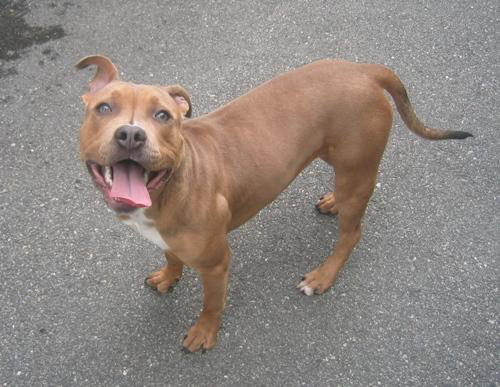

In [8]:
dog = Image.open('..\\Data\\CATS_DOGS\\train\\DOG\\14.jpg')
print(dog.size)
display(dog)

This is how jupyter displays the original .jpg image. Note that size is given as (width, height).<br>
Let's look at a single pixel:

In [9]:
r, g, b = dog.getpixel((0, 0))
print(r,g,b)

90 95 98


The pixel at position [0,0] (upper left) of the source image has an rgb value of (90,95,98). This corresponds to <font style="background-color:rgb(90,95,98)">this color </font><br>
Great! Now let's look at some specific transformations.
### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor'><tt>transforms.ToTensor()</tt></a>
Converts a PIL Image or numpy.ndarray (HxWxC) in the range [0, 255] to a <tt>torch.FloatTensor</tt> of shape (CxHxW) in the range [0.0, 1.0]

torch.Size([3, 387, 500])


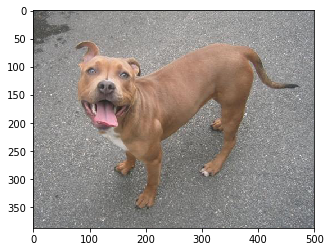

In [10]:
transform = transforms.Compose([
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

This is the same image converted to a tensor and displayed using matplotlib. Note that the torch dimensions follow [channel, height, width]<br><br>
PyTorch automatically loads the [0,255] pixel channels to [0,1]:<br><br>
$\frac{90}{255}=0.3529\quad\frac{95}{255}=0.3725\quad\frac{98}{255}=0.3843$

In [11]:
im[:,0,0]

tensor([0.3529, 0.3725, 0.3843])

### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Resize'><tt>transforms.Resize(<em>size</em>)</tt></a>
If size is a sequence like (h, w), the output size will be matched to this. If size is an integer, the smaller edge of the image will be matched to this number.<br>i.e, if height > width, then the image will be rescaled to (size * height / width, size)

torch.Size([3, 224, 289])


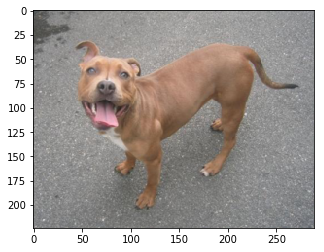

In [12]:
transform = transforms.Compose([
    transforms.Resize(224), 
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

This resized the shortest side, and scaled the other. Let's try this on a small image.

(135, 102)


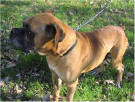

In [13]:
small_dog = Image.open('../Data/CATS_DOGS/train/DOG/11.jpg')
print(small_dog.size)
display(small_dog)

torch.Size([3, 224, 296])


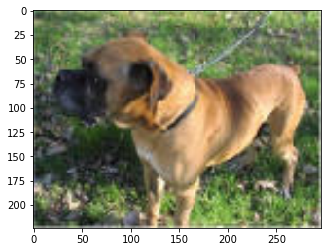

In [14]:
im = transform(small_dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.CenterCrop'><tt>transforms.CenterCrop(<em>size</em>)</tt></a>
If size is an integer instead of sequence like (h, w), a square crop of (size, size) is made.

torch.Size([3, 224, 224])


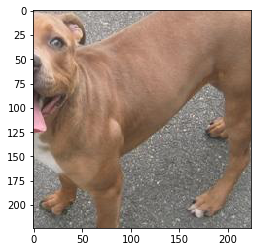

In [15]:
transform = transforms.Compose([
    transforms.CenterCrop(224), 
    transforms.ToTensor()
])
im = transform(dog) # this crops the original image
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

It may be better to resize the image first, then crop:

torch.Size([3, 224, 224])


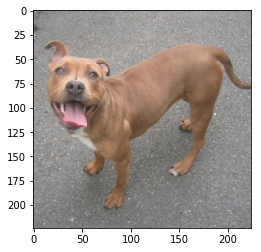

In [16]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224), 
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Other affine transformations
An <a href='https://en.wikipedia.org/wiki/Affine_transformation'><em>affine</em></a> transformation is one that preserves points and straight lines. Examples include rotation, reflection, and scaling. For instance, we can double the effective size of our training set simply by flipping the images.
### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomHorizontalFlip'><tt>transforms.RandomHorizontalFlip(<em>p=0.5</em>)</tt></a>
Horizontally flip the given PIL image randomly with a given probability.

torch.Size([3, 387, 500])


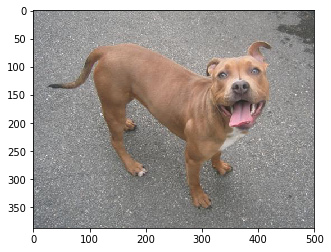

In [17]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # normally we'd set p=0.5
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomRotation'><tt>transforms.RandomRotation(<em>degrees</em>)</tt></a>
If degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees).<br>
Run the cell below several times to see a sample of rotations.

torch.Size([3, 387, 500])


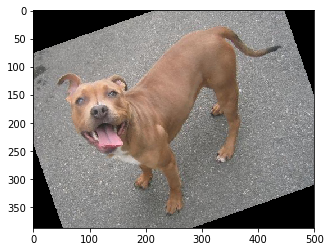

In [18]:
transform = transforms.Compose([
    transforms.RandomRotation(30),  # rotate randomly between +/- 30 degrees
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### Scaling is done using <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Resize'><tt>transforms.Resize(<em>size</em>)</tt></a>

torch.Size([3, 224, 224])


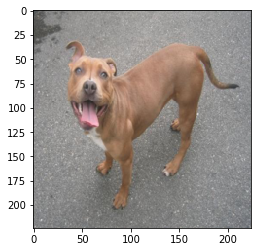

In [19]:
transform = transforms.Compose([
    transforms.Resize((224,224)),  # be sure to pass in a list or a tuple
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Let's put it all together

torch.Size([3, 224, 224])


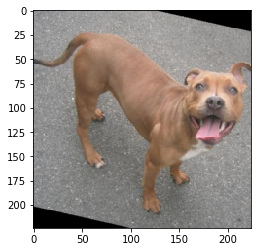

In [20]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # normally we'd set p=0.5
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224), 
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

___
## Normalization
Once the image has been loaded into a tensor, we can perform normalization on it. This serves to make convergence happen quicker during training. The values are somewhat arbitrary - you can use a mean of 0.5 and a standard deviation of 0.5 to convert a range of [0,1] to [-1,1], for example.<br>However, <a href='https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/22'>research has shown</a> that mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225] work well in practice.

### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize'><tt>transforms.Normalize(<em>mean, std</em>)</tt></a>
Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n channels, this transform will normalize each channel of the input tensor
### $\quad\textrm {input[channel]} = \frac{\textrm{input[channel] - mean[channel]}}{\textrm {std[channel]}}$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 387, 500])


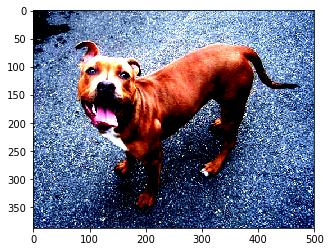

In [22]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

Recall that before normalization, the upper-leftmost tensor had pixel values of <tt>[0.3529, 0.3725, 0.3843]</tt>.<br>
With normalization we subtract the channel mean from the input channel, then divide by the channel std.<br><br>
$\frac{(0.3529-0.485)}{0.229}=-0.5767\quad\frac{(0.3725-0.456)}{0.224}=-0.3725\quad\frac{(0.3843-0.406)}{0.225}=-0.0964$<br>

In [23]:
# After normalization:
im[:,0,0]

tensor([-0.5767, -0.3725, -0.0964])

When displayed, matplotlib clipped this particular pixel up to [0,0,0] so it appears black on the screen. However, the appearance isn't important; the goal of normalization is improved mathematical performance.

### Optional: De-normalize the images
To see the image back in its true colors, we can apply an inverse-transform to the tensor being displayed.

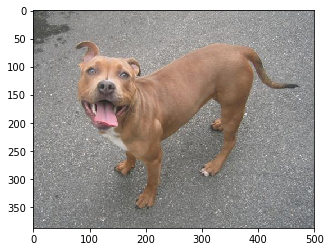

In [24]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

Note that the original tensor was not modified:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


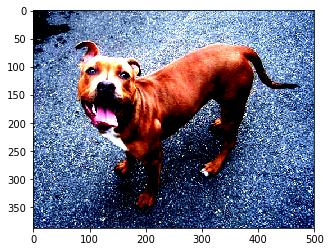

In [25]:
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Up next: performing CNN on real images!

# CNN on Custom Images
For this exercise we're using a collection of Cats and Dogs images inspired by the classic <a href='https://www.kaggle.com/c/dogs-vs-cats'>Kaggle competition</a>.

In the last section we downloaded the files, looked at the directory structure, examined the images, and performed a variety of transforms in preparation for training.

In this section we'll define our model, then feed images through a training and validation sequence using DataLoader.



### Image files directory tree
<pre>.
└── Data
    └── CATS_DOGS
        ├── test
        │   ├── CAT
        │   │   ├── 9374.jpg
        │   │   ├── 9375.jpg
        │   │   └── ... (3,126 files)
        │   └── DOG
        │       ├── 9374.jpg
        │       ├── 9375.jpg
        │       └── ... (3,125 files)       
        │           
        └── train
            ├── CAT
            │   ├── 0.jpg
            │   ├── 1.jpg
            │   └── ... (9,371 files)
            └── DOG
                ├── 0.jpg
                ├── 1.jpg
                └── ... (9,372 files)</pre>

## Perform standard imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## Define transforms
In the previous section we looked at a variety of transforms available for data augmentation (rotate, flip, etc.) and normalization.<br>
Here we'll combine the ones we want, including the <a href='https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/22'>recommended normalization parameters</a> for mean and std per channel.

In [2]:
train_transform = transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

## Prepare train and test sets, loaders
We're going to take advantage of a built-in torchvision dataset tool called <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder'><tt><strong>ImageFolder</strong></tt></a>.

In [3]:
root = '../Data/CATS_DOGS'

train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)

torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=True)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['CAT', 'DOG']
Training images available: 18743
Testing images available:  6251


## Display a batch of images
To verify that the training loader selects cat and dog images at random, let's show a batch of loaded images.<br>
Recall that imshow clips pixel values <0, so the resulting display lacks contrast. We'll apply a quick inverse transform to the input tensor so that images show their "true" colors.

Label: [1 0 1 0 0 1 0 1 0 0]
Class: DOG CAT DOG CAT CAT DOG CAT DOG CAT CAT


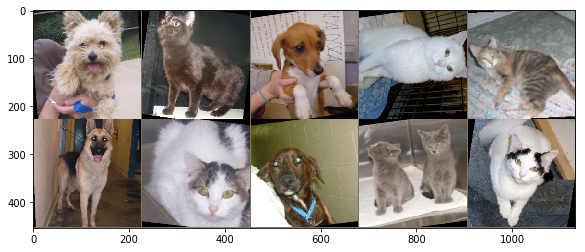

In [4]:
# Grab the first batch of 10 images
for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=5)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

## Define the model
We'll start by using a model similar to the one we applied to the CIFAR-10 dataset, except that here we have a binary classification (2 output channels, not 10). Also, we'll add another set of convolution/pooling layers.

In [5]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(54*54*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

<div class="alert alert-info"><strong>Why <tt>(54x54x16)</tt>?</strong><br>
With 224 pixels per side, the kernels and pooling layers result in $\;(((224-2)/2)-2)/2 = 54.5\;$ which rounds down to 54 pixels per side.</div>

### Instantiate the model, define loss and optimization functions
We're going to call our model "CNNmodel" to differentiate it from an "AlexNetmodel" we'll use later.

In [6]:
torch.manual_seed(101)
CNNmodel = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

### Looking at the trainable parameters

In [7]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')

In [8]:
count_parameters(CNNmodel)

     162
       6
     864
      16
 5598720
     120
   10080
      84
     168
       2
________
 5610222


## Train the model
In the interests of time, we'll limit the number of training batches to 800, and the number of testing batches to 300. We'll train the model on 8000 of 18743 available images, and test it on 3000 out of 6251 images.

In [9]:
import time
start_time = time.time()

epochs = 3

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        # Limit the number of batches
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Limit the number of batches
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = CNNmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [  2000/8000]  loss: 0.73729956  accuracy:  57.150%
epoch:  0  batch:  400 [  4000/8000]  loss: 0.69267005  accuracy:  59.100%
epoch:  0  batch:  600 [  6000/8000]  loss: 0.64823747  accuracy:  61.067%
epoch:  0  batch:  800 [  8000/8000]  loss: 0.45315751  accuracy:  63.200%
epoch:  1  batch:  200 [  2000/8000]  loss: 0.57837021  accuracy:  69.450%
epoch:  1  batch:  400 [  4000/8000]  loss: 0.65500635  accuracy:  69.700%
epoch:  1  batch:  600 [  6000/8000]  loss: 0.85159266  accuracy:  70.433%
epoch:  1  batch:  800 [  8000/8000]  loss: 0.47595224  accuracy:  71.025%
epoch:  2  batch:  200 [  2000/8000]  loss: 0.68083632  accuracy:  74.500%
epoch:  2  batch:  400 [  4000/8000]  loss: 0.32654241  accuracy:  74.025%
epoch:  2  batch:  600 [  6000/8000]  loss: 0.52883595  accuracy:  74.467%
epoch:  2  batch:  800 [  8000/8000]  loss: 0.31269351  accuracy:  74.950%

Duration: 1142 seconds


## Save the trained model

In [11]:
torch.save(CNNmodel.state_dict(), 'CustomImageCNNModel.pt')

## Evaluate model performance

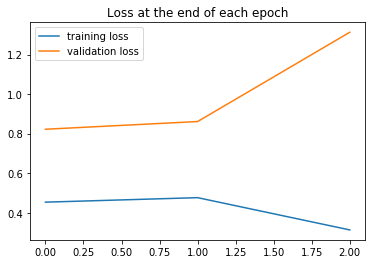

In [12]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

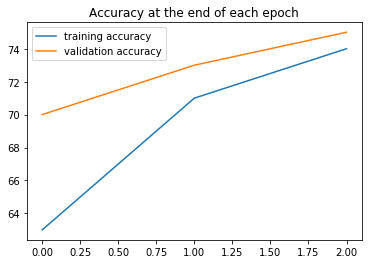

In [13]:
plt.plot([t/80 for t in train_correct], label='training accuracy')
plt.plot([t/30 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [14]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*100/3000:.3f}%')

[tensor(2109), tensor(2195), tensor(2254)]
Test accuracy: 75.133%


## Download a pretrained model
Torchvision has a number of proven models available through <a href='https://pytorch.org/docs/stable/torchvision/models.html#classification'><tt><strong>torchvision.models</strong></tt></a>:
<ul>
<li><a href="https://arxiv.org/abs/1404.5997">AlexNet</a></li>
<li><a href="https://arxiv.org/abs/1409.1556">VGG</a></li>
<li><a href="https://arxiv.org/abs/1512.03385">ResNet</a></li>
<li><a href="https://arxiv.org/abs/1602.07360">SqueezeNet</a></li>
<li><a href="https://arxiv.org/abs/1608.06993">DenseNet</a></li>
<li><a href="https://arxiv.org/abs/1512.00567">Inception</a></li>
<li><a href="https://arxiv.org/abs/1409.4842">GoogLeNet</a></li>
<li><a href="https://arxiv.org/abs/1807.11164">ShuffleNet</a></li>
<li><a href="https://arxiv.org/abs/1801.04381">MobileNet</a></li>
<li><a href="https://arxiv.org/abs/1611.05431">ResNeXt</a></li>
</ul>
These have all been trained on the <a href='http://www.image-net.org/'>ImageNet</a> database of images. Our only task is to reduce the output of the fully connected layers from (typically) 1000 categories to just 2.

To access the models, you can construct a model with random weights by calling its constructor:<br>
<pre>resnet18 = models.resnet18()</pre>
You can also obtain a pre-trained model by passing pretrained=True:<br>
<pre>resnet18 = models.resnet18(pretrained=True)</pre>
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

Feel free to investigate the different models available. Each one will be downloaded to a cache directory the first time they're accessed - from then on they'll be available locally.

For its simplicity and effectiveness, we'll use AlexNet:

In [15]:
AlexNetmodel = models.alexnet(pretrained=True)
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

<div class="alert alert-info">This model uses <a href='https://pytorch.org/docs/master/nn.html#torch.nn.AdaptiveAvgPool2d'><tt><strong>torch.nn.AdaptiveAvgPool2d(<em>output_size</em>)</strong></tt></a> to convert the large matrix coming out of the convolutional layers to a (6x6)x256 matrix being fed into the fully connected layers.</div>

## Freeze feature parameters
We want to freeze the pre-trained weights & biases. We set <tt>.requires_grad</tt> to False so we don't backprop through them.

In [17]:
for param in AlexNetmodel.parameters():
    param.requires_grad = False

## Modify the classifier
Next we need to modify the fully connected layers to produce a binary output. The section is labeled "classifier" in the AlexNet model.<br>
Note that when we assign new layers, their parameters default to <tt>.requires_grad=True</tt>.

In [18]:
torch.manual_seed(42)
AlexNetmodel.classifier = nn.Sequential(nn.Linear(9216, 1024),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(1024, 2),
                                 nn.LogSoftmax(dim=1))
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4)
    (3): Linear(in_featur

In [19]:
# These are the TRAINABLE parameters:
count_parameters(AlexNetmodel)

 9437184
    1024
    2048
       2
________
 9440258


## Define loss function & optimizer
We only want to optimize the classifier parameters, as the feature parameters are frozen.

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNetmodel.classifier.parameters(), lr=0.001)

## Train the model
Remember, we're only training the fully connected layers. The convolutional layers have fixed weights and biases. For this reason, we only need to run one epoch.

In [22]:
import time
start_time = time.time()

epochs = 1

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = AlexNetmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = AlexNetmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [  2000/8000]  loss: 0.01413172  accuracy:  88.900%
epoch:  0  batch:  400 [  4000/8000]  loss: 0.24275371  accuracy:  90.825%
epoch:  0  batch:  600 [  6000/8000]  loss: 0.09340305  accuracy:  91.900%
epoch:  0  batch:  800 [  8000/8000]  loss: 0.07545806  accuracy:  92.250%

Duration: 513 seconds


In [23]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*100/3000:.3f}%')

[tensor(2810)]
Test accuracy: 93.667%


## Run a new image through the model
We can also pass a single image through the model to obtain a prediction.<br>
Pick a number from 0 to 6250, assign it to "x", and we'll use that value to select an image from the Cats and Dogs test set.

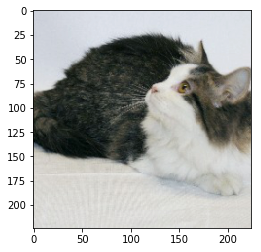

In [31]:
x = 2019
im = inv_normalize(test_data[x][0])
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [32]:
test_data[x][0].shape

torch.Size([3, 224, 224])

In [35]:
# CNN Model Prediction:

CNNmodel.eval()
with torch.no_grad():
    new_pred = CNNmodel(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 1 DOG


In [36]:
# AlexNet Model Prediction:

AlexNetmodel.eval()
with torch.no_grad():
    new_pred = AlexNetmodel(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 0 CAT


# CNN Exercises
For these exercises we'll work with the <a href='https://www.kaggle.com/zalando-research/fashionmnist'>Fashion-MNIST</a> dataset, also available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. Like MNIST, this dataset consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

## Perform standard imports, load the Fashion-MNIST dataset
Run the cell below to load the libraries needed for this exercise and the Fashion-MNIST dataset.<br>
PyTorch makes the Fashion-MNIST dataset available through <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist'><tt><strong>torchvision</strong></tt></a>. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../Data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

## 1. Create data loaders
Use DataLoader to create a <tt>train_loader</tt> and a <tt>test_loader</tt>. Batch sizes should be 10 for both.

In [ ]:
# CODE HERE




In [2]:
# DON'T WRITE HERE

## 2. Examine a batch of images
Use DataLoader, <tt>make_grid</tt> and matplotlib to display the first batch of 10 images.<br>
OPTIONAL: display the labels as well

In [ ]:
# CODE HERE







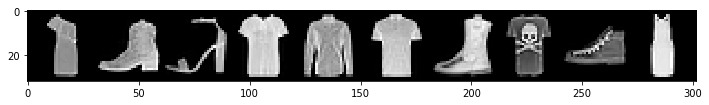

In [3]:
# DON'T WRITE HERE
# IMAGES ONLY

Label:  [9 2 5 9 4 2 1 2 7 3]
Class:  Boot Sweater Sandal Boot Coat Sweater Trouser Sweater Sneaker Dress


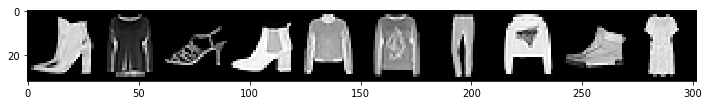

In [4]:
# DON'T WRITE HERE
# IMAGES AND LABELS

## Downsampling
<h3>3. If a 28x28 image is passed through a Convolutional layer using a 5x5 filter, a step size of 1, and no padding, what is the resulting matrix size?</h3>

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [ ]:
##################################################
###### ONLY RUN THIS TO CHECK YOUR ANSWER! ######
################################################

# Run the code below to check your answer:
conv = nn.Conv2d(1, 1, 5, 1)
for x,labels in train_loader:
    print('Orig size:',x.shape)
    break
x = conv(x)
print('Down size:',x.shape)

### 4. If the sample from question 3 is then passed through a 2x2 MaxPooling layer, what is the resulting matrix size?

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [ ]:
##################################################
###### ONLY RUN THIS TO CHECK YOUR ANSWER! ######
################################################

# Run the code below to check your answer:
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

## CNN definition
### 5. Define a convolutional neural network
Define a CNN model that can be trained on the Fashion-MNIST dataset. The model should contain two convolutional layers, two pooling layers, and two fully connected layers. You can use any number of neurons per layer so long as the model takes in a 28x28 image and returns an output of 10. Portions of the definition have been filled in for convenience.

In [ ]:
# CODE HERE
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        pass

    def forward(self, X):
        pass 
        return 
    
torch.manual_seed(101)
model = ConvolutionalNetwork()

## Trainable parameters

### 6. What is the total number of trainable parameters (weights & biases) in the model above?
Answers will vary depending on your model definition.

<div style='border:1px black solid; padding:5px'>
<br><br>
</div>

In [ ]:
# CODE HERE

### 7. Define loss function & optimizer
Define a loss function called "criterion" and an optimizer called "optimizer".<br>
You can use any functions you want, although we used Cross Entropy Loss and Adam (learning rate of 0.001) respectively.

In [ ]:
# CODE HERE




In [6]:
# DON'T WRITE HERE

### 8. Train the model
Don't worry about tracking loss values, displaying results, or validating the test set. Just train the model through 5 epochs. We'll evaluate the trained model in the next step.<br>
OPTIONAL: print something after each epoch to indicate training progress.

In [ ]:
# CODE HERE






1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


### 9. Evaluate the model
Set <tt>model.eval()</tt> and determine the percentage correct out of 10,000 total test images.

In [ ]:
# CODE HERE






Test accuracy: 8733/10000 =  87.330%


# CNN Exercises - Solutions
For these exercises we'll work with the <a href='https://www.kaggle.com/zalando-research/fashionmnist'>Fashion-MNIST</a> dataset, also available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. Like MNIST, this dataset consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes:
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

## Perform standard imports, load the Fashion-MNIST dataset
Run the cell below to load the libraries needed for this exercise and the Fashion-MNIST dataset.<br>
PyTorch makes the Fashion-MNIST dataset available through <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist'><tt><strong>torchvision</strong></tt></a>. The first time it's called, the dataset will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../Data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

## 1. Create data loaders
Use DataLoader to create a <tt>train_loader</tt> and a <tt>test_loader</tt>. Batch sizes should be 10 for both.

In [ ]:
# CODE HERE




In [2]:
# DON'T WRITE HERE
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

## 2. Examine a batch of images
Use DataLoader, <tt>make_grid</tt> and matplotlib to display the first batch of 10 images.<br>
OPTIONAL: display the labels as well

In [ ]:
# CODE HERE







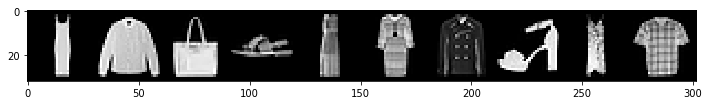

In [3]:
# DON'T WRITE HERE
# IMAGES ONLY
for images,labels in train_loader: 
    break

im = make_grid(images, nrow=10)
plt.figure(figsize=(12,4))

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

Label:  [3 0 0 3 1 3 5 4 8 8]
Class:  Dress T-shirt T-shirt Dress Trouser Dress Sandal Coat Bag Bag


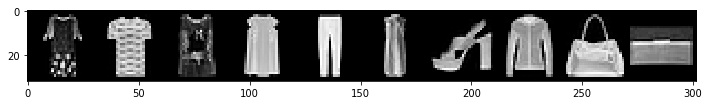

In [4]:
# DON'T WRITE HERE
# IMAGES AND LABELS
for images,labels in train_loader: 
    break

print('Label: ', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=10)
plt.figure(figsize=(12,4))

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## Downsampling
<h3>3. If a 28x28 image is passed through a Convolutional layer using a 5x5 filter, a step size of 1, and no padding, what is the resulting matrix size?</h3>

<div style='border:1px black solid; padding:5px'>A 5x5 filter leaves a two-pixel border on each side, so the overall dimension is reduced by 4.<br>
The result is a 24x24 matrix.</div>

In [5]:
# Run the code below to check your answer:
conv = nn.Conv2d(1, 1, 5, 1)
for x,labels in train_loader:
    print('Orig size:',x.shape)
    break
x = conv(x)
print('Down size:',x.shape)

Orig size: torch.Size([10, 1, 28, 28])
Down size: torch.Size([10, 1, 24, 24])


### 4. If the sample from question 3 is then passed through a 2x2 MaxPooling layer, what is the resulting matrix size?

<div style='border:1px black solid; padding:5px'>
If a 2x2 pooling layer is applied to a 24x24 matrix, each side is divided by two, and rounded down if necessary.<br>
The result is a 12x12 matrix.
</div>

In [6]:
# Run the code below to check your answer:
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

Down size: torch.Size([10, 1, 12, 12])


## CNN definition
### 5. Define a convolutional neural network
Define a CNN model that can be trained on the Fashion-MNIST dataset. The model should contain two convolutional layers, two pooling layers, and two fully connected layers. You can use any number of neurons per layer so long as the model takes in a 28x28 image and returns an output of 10. Portions of the definition have been filled in for convenience.

In [7]:
# DON'T WRITE HERE
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)
    
torch.manual_seed(101)
model = ConvolutionalNetwork()

## Trainable parameters

### 6. What is the total number of trainable parameters (weights & biases) in the model above?
Answers will vary depending on your model definition.

<div style='border:1px black solid; padding:5px'>
$\quad\begin{split}(1\times6\times3\times3)+6+(6\times16\times3\times3)+16+(400\times100)+100+(100\times10)+10 &=\\
54+6+864+16+40000+100+1000+10 &= 42,050\end{split}$<br>
</div>

In [8]:
# Run the code below to check your answer:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

    54
     6
   864
    16
 40000
   100
  1000
    10
______
 42050


### 7. Define loss function & optimizer
Define a loss function called "criterion" and an optimizer called "optimizer".<br>
You can use any functions you want, although we used Cross Entropy Loss and Adam (learning rate of 0.001) respectively.

In [9]:
# DON'T WRITE HERE
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### 8. Train the model
Don't worry about tracking loss values, displaying results, or validating the test set. Just train the model through 5 epochs. We'll evaluate the trained model in the next step.<br>
OPTIONAL: print something after each epoch to indicate training progress.

In [10]:
# DON'T WRITE HERE
epochs = 5

for i in range(epochs):
    for X_train, y_train in train_loader:

        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # OPTIONAL print statement
    print(f'{i+1} of {epochs} epochs completed')

1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


### 9. Evaluate the model
Set <tt>model.eval()</tt> and determine the percentage correct out of 10,000 total test images.

In [11]:
# DON'T WRITE HERE
model.eval()

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_loader:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 8733/10000 =  87.330%


# Basic RNN - Recurrent Neural Networks
Up to now we've used neural networks to classify static images. What happens when the thing we're trying to explain changes over time? What if a predicted value depends on a series of past behaviors?

We can train networks to tell us that an image contains a car.<br>

How do we answer the question "Is the car moving? Where will it be a minute from now?"

This challenge of incorporating a series of measurements over time into the model parameters is addressed by <a href='https://en.wikipedia.org/wiki/Recurrent_neural_network'>Recurrent Neural Networks</a> (RNNs).

Be sure to watch the theory lectures. You should be comfortable with:
* conditional memory
* deep sequence modeling
* vanishing gradients
* gated cells
* long short-term memory (LSTM) cells

PyTorch offers a number of RNN layers and options.<br>
* <a href='https://pytorch.org/docs/stable/nn.html#rnn'><tt><strong>torch.nn.RNN()</strong></tt></a> provides a basic model which applies a multilayer RNN with either <em>tanh</em> or <em>ReLU</em> non-linearity functions to an input sequence.<br>
As we learned in the theory lectures, however, this has its limits.<br><br>
* <a href='https://pytorch.org/docs/stable/nn.html#lstm'><tt><strong>torch.nn.LSTM()</strong></tt></a> adds a multi-layer long short-term memory (LSTM) process which greatly extends the memory of the RNN.

## Advantages of an LSTM
For each element in the input sequence, an LSTM layer computes the following functions:<br>

$\begin{array}{ll} \\
    i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{(t-1)} + b_{hi}) \\
    f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{(t-1)} + b_{hf}) \\
    g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{(t-1)} + b_{hg}) \\
    o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{(t-1)} + b_{ho}) \\
    c_t = f_t * c_{(t-1)} + i_t * g_t \\
    h_t = o_t * \tanh(c_t) \\
\end{array}$

where $h_t$ is the hidden state at time $t$, <br>
$c_t$ is the cell state at time $t$, <br>
$x_t$ is the input at time $t$, <br>
$h_{(t-1)}$ is the hidden state of the layer at time $t-1$ or the initial hidden state at time $0$, and <br>
$i_t, f_t, g_t, o_t$ are the input, forget, cell, and output gates, respectively.<br>
$\sigma$ is the sigmoid function, and $*$ is the Hadamard product.

<img style="display: inline-block" src="Images/LSTM-graphic.png" alt="LSTM Graphic" width="500">

To demonstrate the potential of LSTMs, we'll look at a simple sine wave. Our goal is, given a value, predict the next value in the sequence. Due to the cyclical nature of sine waves, an typical neural network won't know if it should predict upward or downward, while an LSTM is capable of learning patterns of values.

## Perform standard imports

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Create a sine wave dataset
For this exercise we'll look at a simple sine wave. We'll take 800 data points and assign 40 points per full cycle, for a total of 20 complete cycles. We'll train our model on all but the last cycle, and use that to evaluate our test predictions.

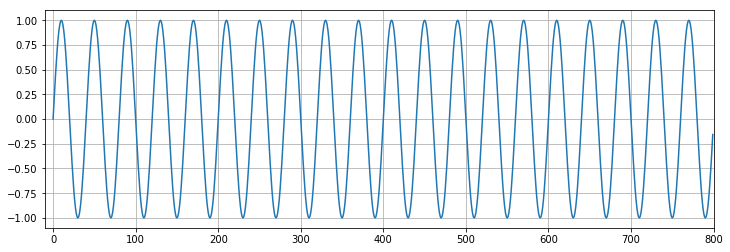

In [2]:
# Create & plot data points
x = torch.linspace(0,799,steps=800)
y = torch.sin(x*2*3.1416/40)

plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy());

## Create train and test sets
We want to take the first 760 samples in our series as a training sequence, and the last 40 for testing.
<div class="alert alert-info"><strong>NOTE:</strong> We tend to use the terms "series" and "sequence" interchangeably. Usually "series" refers to the entire population of data, or the full time series, and "sequence" refers to some portion of it.</div>

In [3]:
test_size = 40

train_set = y[:-test_size]
test_set = y[-test_size:]

## Prepare the training data
When working with LSTM models, we start by dividing the training sequence into a series of overlapping "windows". Each window consists of a connected string of samples. The label used for comparison is equal to the next value in the sequence. In this way our network learns what value should follow a given pattern of preceding values. Note: although the LSTM layer produces a prediction for each sample in the window, we only care about the last one.

For example, say we have a series of 15 records, and a window size of 5. We feed $[x_1,..,x_5]$ into the model, and compare the prediction to $x_6$. Then we backprop, update parameters, and feed $[x_2,..,x_6]$ into the model. We compare the new output to $x_7$ and so forth up to $[x_{10},..,x_{14}]$.

To simplify matters, we'll define a function called <tt>input_data</tt> that builds a list of <tt>(seq, label)</tt> tuples. Windows overlap, so the first tuple might contain $([x_1,..,x_5],[x_6])$, the second would have $([x_2,..,x_6],[x_7])$, etc. 

Here $k$ is the width of the window. Due to the overlap, we'll have a total number of <tt>(seq, label)</tt> tuples equal to $\textrm{len}(series)-k$

In [4]:
def input_data(seq,ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

<div class="alert alert-info"><strong>NOTE:</strong> "Windows" are different from "batches". In our example we'll feed one window into the model at a time, so our batch size would be 1. If we passed two windows into the model before we backprop and update weights, our batch size would be 2.</div>

To train on our sine wave data we'll use a window size of 40 (one entire cycle). 

In [5]:
# From above:
# test_size = 40
# train_set = y[:-test_size]
# test_set = y[-test_size:]

window_size = 40

# Create the training dataset of sequence/label tuples:
train_data = input_data(train_set,window_size)

len(train_data) # this should equal 760-40

720

In [6]:
# Display the first (seq/label) tuple in train_data
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [7]:
torch.set_printoptions(sci_mode=False) # to improve the appearance of tensors
train_data[0]

(tensor([     0.0000,      0.1564,      0.3090,      0.4540,      0.5878,
              0.7071,      0.8090,      0.8910,      0.9511,      0.9877,
              1.0000,      0.9877,      0.9511,      0.8910,      0.8090,
              0.7071,      0.5878,      0.4540,      0.3090,      0.1564,
             -0.0000,     -0.1564,     -0.3090,     -0.4540,     -0.5878,
             -0.7071,     -0.8090,     -0.8910,     -0.9511,     -0.9877,
             -1.0000,     -0.9877,     -0.9511,     -0.8910,     -0.8090,
             -0.7071,     -0.5878,     -0.4540,     -0.3090,     -0.1564]),
 tensor([    0.0000]))

## Define an LSTM model
Our model will have one LSTM layer with an input size of 1 and a hidden size of 50, followed by a fully-connected layer to reduce the output to the prediction size of 1.<br>
<div class="alert alert-info"><strong>NOTE:</strong> You will often see the terms <em>input_dim</em> and <em> hidden_dim</em> used in place of <em>input_size</em> and <em>hidden_size</em>. They mean the same thing. We'll stick to <em>input_size</em> and <em>hidden_size</em> to stay consistent with PyTorch's built-in keywords.</div>

During training we pass three tensors through the LSTM layer - the sequence, the hidden state $h_0$ and the cell state $c_0$.<br>

This means we need to initialize $h_0$ and $c_0$. This can be done with random values, but we'll use zeros instead.

In [8]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,out_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,hidden_size),
                       torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]   # we only care about the last prediction

## Instantiate the model, define loss & optimization functions
Since we're comparing single values, we'll use <a href='https://pytorch.org/docs/stable/nn.html#mseloss'><tt><strong>torch.nn.MSELoss</strong></tt></a><br>Also, we've found that <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.SGD'><tt><strong>torch.optim.SGD</strong></tt></a> converges faster for this application than <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.Adam'><tt><strong>torch.optim.Adam</strong></tt></a>

In [9]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [10]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

   200
 10000
   200
   200
    50
     1
______
 10651


## Predicting future values
To show how an LSTM model improves after each epoch, we'll run predictions and plot the results. Our goal is to predict the last sequence of 40 values, and compare them to the known data in our test set. However, we have to be careful <em>not</em> to use test data in the predictions - that is, each new prediction derives from previously predicted values.

The trick is to take the last known window, predict the next value, then <em>append</em> the predicted value to the sequence and run a new prediction on a window that includes the value we've just predicted. It's like adding track in front of the train as it's moving.<br><em>Image source:</em> https://giphy.com/gifs/aardman-cartoon-train-3oz8xtBx06mcZWoNJm<br>
<img style="display: inline-block" src="Images/WallaceGromitTrainTrack.gif" alt="Wallace & Gromit" width="400">

In this way, a well-trained model <em>should</em> follow any regular trends/cycles in the data.

## Train and simultaneously evaluate the model
We'll train 10 epochs. For clarity, we'll "zoom in" on the test set, and only display from point 700 to the end.

Epoch:  1 Loss: 0.09212875
Loss on test predictions: 0.6071590185165405


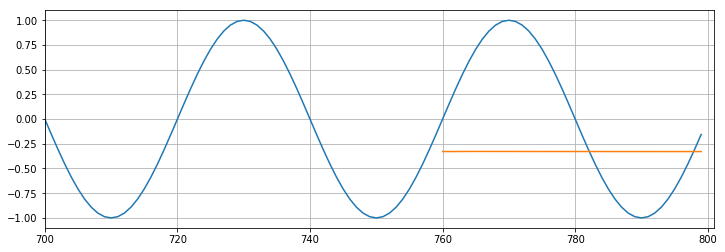

Epoch:  2 Loss: 0.06506767
Loss on test predictions: 0.565098762512207


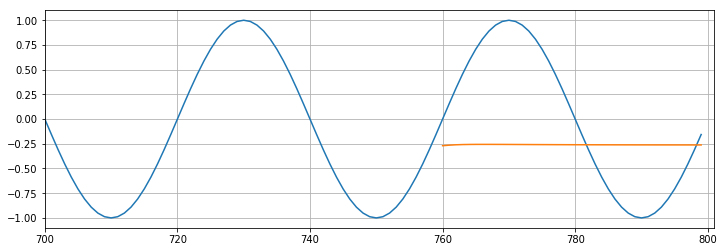

Epoch:  3 Loss: 0.04198047
Loss on test predictions: 0.5199716687202454


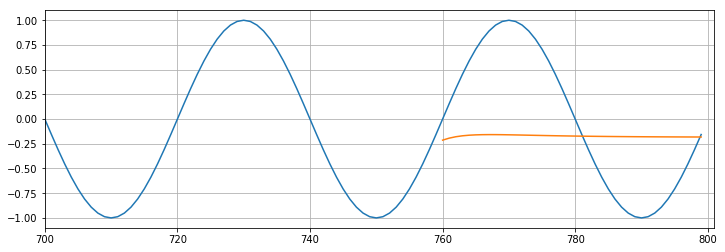

Epoch:  4 Loss: 0.01784276
Loss on test predictions: 0.42209967970848083


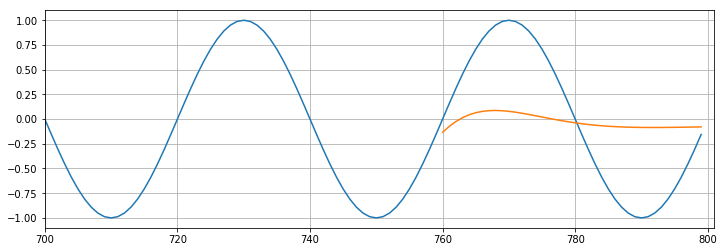

Epoch:  5 Loss: 0.00288710
Loss on test predictions: 0.16624116897583008


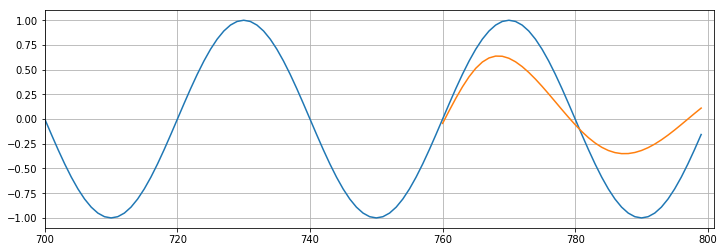

Epoch:  6 Loss: 0.00032008
Loss on test predictions: 0.03055439703166485


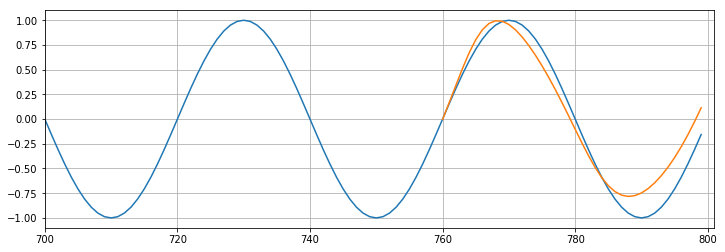

Epoch:  7 Loss: 0.00012969
Loss on test predictions: 0.014990181662142277


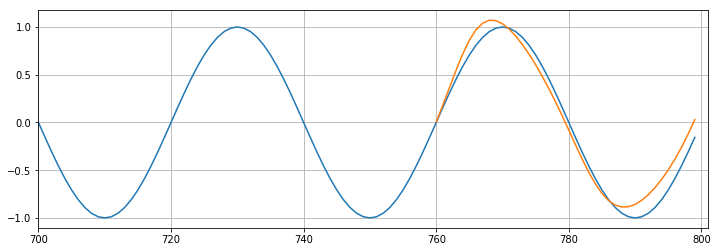

Epoch:  8 Loss: 0.00012007
Loss on test predictions: 0.011856676079332829


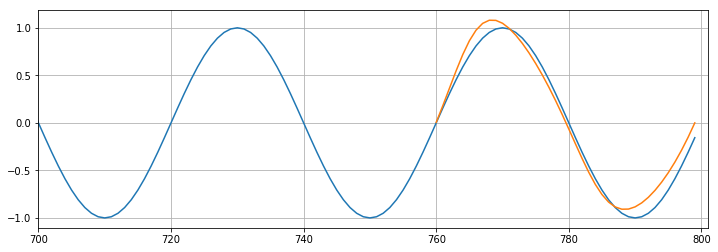

Epoch:  9 Loss: 0.00012656
Loss on test predictions: 0.010163827799260616


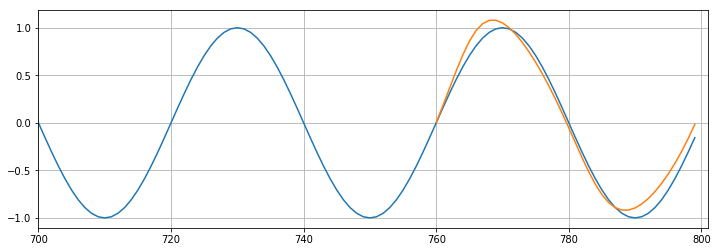

Epoch: 10 Loss: 0.00013195
Loss on test predictions: 0.00889757089316845


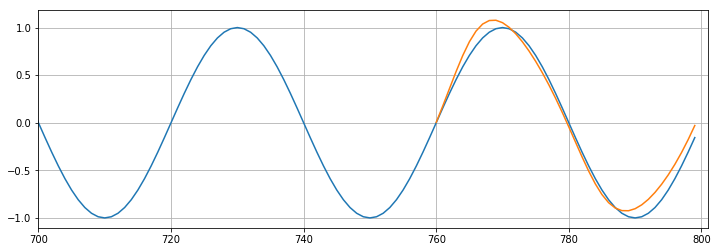

In [11]:
epochs = 10
future = 40

for i in range(epochs):
    
    # tuple-unpack the train_data set
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
    # MAKE PREDICTIONS
    # start with a list of the last 10 training records
    preds = train_set[-window_size:].tolist()

    for f in range(future):  
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
            loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
            print(f'Loss on test predictions: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

# Forecasting into an unknown future
We'll continue to train our model, this time using the entire dataset. Then we'll predict what the <em>next</em> 40 points should be.

## Train the model
Expect this to take a few minutes.

In [12]:
epochs = 10
window_size = 40
future = 40

# Create the full set of sequence/label tuples:
all_data = input_data(y,window_size)
len(all_data)  # this should equal 800-40

760

In [13]:
import time
start_time = time.time()

for i in range(epochs):
    
    # tuple-unpack the entire set of data
    for seq, y_train in all_data:  
       
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.00013453
Epoch:  2 Loss: 0.00013443
Epoch:  3 Loss: 0.00013232
Epoch:  4 Loss: 0.00012879
Epoch:  5 Loss: 0.00012434
Epoch:  6 Loss: 0.00011931
Epoch:  7 Loss: 0.00011398
Epoch:  8 Loss: 0.00010854
Epoch:  9 Loss: 0.00010313
Epoch: 10 Loss: 0.00009784

Duration: 173 seconds


## Predict future values, plot the result

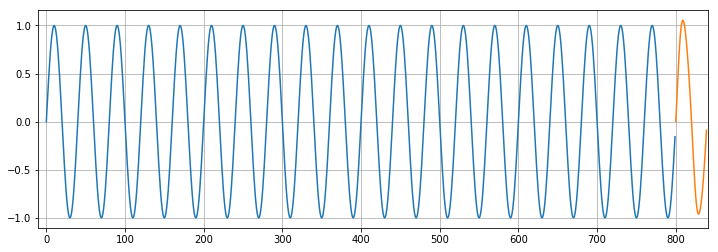

In [14]:
preds = y[-window_size:].tolist()

for i in range(future):  
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))  
        preds.append(model(seq).item())

plt.figure(figsize=(12,4))
plt.xlim(-10,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future),preds[window_size:])
plt.show()

# RNN on a Time Series
For these examples we're using data from the Federal Reserve Economic Database (FRED) concerning Sales of Beer, Wine, and Distilled Alcoholic Beverages in millions of dollars from January 1992 to January 2019 (325 records).

Data source: https://fred.stlouisfed.org/series/S4248SM144NCEN

## Perform standard imports

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# This relates to plotting datetime values with matplotlib:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Load the dataset
We'll take advantage of pandas' built-in <a href='https://pandas.pydata.org/pandas-docs/stable/timeseries.html'>DatetimeIndex</a> by passing <tt>parse_dates=True</tt>

In [2]:
df = pd.read_csv('../Data/TimeSeriesData/Alcohol_Sales.csv',index_col=0,parse_dates=True)
len(df)

325

In [3]:
# Always a good idea with time series data:
df.dropna(inplace=True)
len(df)

325

In [4]:
df.head()

S4248SM144NCEN
DATE                      
1992-01-01            3459
1992-02-01            3458
1992-03-01            4002
1992-04-01            4564
1992-05-01            4221

In [5]:
df.tail()

S4248SM144NCEN
DATE                      
2018-09-01           12396
2018-10-01           13914
2018-11-01           14174
2018-12-01           15504
2019-01-01           10718

## Plotting time series data
We can add titles, axis labels, and other features to the plot.<br>
We're going to tighten the x-axis to fit the width of the actual data with <tt>plt.autoscale(axis='x',tight=True)</tt>.<br>
Alternatively you could set your own limits with <tt>plt.xlim(pd.Timestamp('1992-01-01'), pd.Timestamp('2019-01-01'))</tt> or some other values.

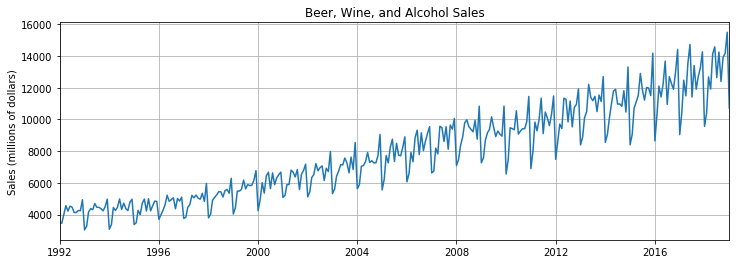

In [6]:
plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.show()

## Prepare the data
In the next steps we'll divide the data into train/test sets, then normalize the training values so that they fall between -1 and 1 (to improve training). We'll train the model, then predict into a period that matches the test set. Finally, we'll forecast into an unknown future.

In [7]:
# Extract values from the source .csv file
y = df['S4248SM144NCEN'].values.astype(float)

# Define a test size
test_size = 12

# Create train and test sets
train_set = y[:-test_size]
test_set = y[-test_size:]

In [8]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

It's worth noting that in our previous exercise the train and test sets were tensors. Here they're numpy arrays. This is because one of the steps we're about to perform outputs an array, and we'd have to turn it into a tensor anyway.

## Normalize the data
The formula for normalizing data around zero is:<br>
### $X_{norm} = \frac{X - \mu} {\sigma}$
where $\mu$ is the population mean, and $\sigma$ is the population standard deviation.<br>
Recall that back in the CNN section we transformed image files using <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize'><tt><strong>torchvision.transforms.Normalize(<em>mean, std</em>)</strong></tt></a>, both because it was built into DataLoader, and because our pretrained models expected specific normalization values.<br>

Ultimately we want to perform <a href='https://en.wikipedia.org/wiki/Feature_scaling'>min/max feature scaling</a> so that our values fall between -1 and 1, as this makes hyperparameters converge faster.<br>The formula for this would be:<br>
### $X^{\prime} = a + \frac{(X - X_{min}) (b - a)} {X_{max} - X_{min}}$
where $a={-1}$ and $b=1$<br>

We can use scikit-learn to do this, with <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html'><tt><strong>sklearn.preprocessing.MinMaxScaler()</strong></tt></a>

NOTE: We only want to normalize the training set to avoid data leakage. If we include the test set then the higher average values of the test set could become part of the signal in the training set. There's a good article on data leakage <a href='test_set = input_data(test_norm,window_size)'>here</a>.

After using transformed data to train the model and generate predictions, we'll inverse_transform the predicted values so that we can compare them to the actual test data.

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate a scaler with a feature range from -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))

In [10]:
# Normalize the training set
train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

In [11]:
train_norm.min()

-1.0

In [12]:
train_norm.max()

1.0

In [13]:
train_norm.mean()

-0.2041940178388313

In [14]:
type(train_norm)

numpy.ndarray

## Prepare data for LSTM
Here we'll create our list of (seq/label) tuples from the training set. Recall that an LSTM consumes a window of samples toward the first prediction, so the size of our training set will become ((325 - test_size) - window_size).

In [15]:
# Convert train_norm from an array to a tensor
train_norm = torch.FloatTensor(train_norm).view(-1)

# Define a window size
window_size = 12

# Define function to create seq/label tuples
def input_data(seq,ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

# Apply the input_data function to train_norm
train_data = input_data(train_norm,window_size)
len(train_data)  # this should equal 325-12-12

301

In [16]:
# Display the first seq/label tuple in the train data
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]), tensor([-1.]))

## Define the model
This time we'll use an LSTM layer of size (1,100).

In [17]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=100,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]  # we only want the last value

## Instantiate the model, define loss and optimization functions

In [18]:
torch.manual_seed(101)
model = LSTMnetwork()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [19]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

   400
 40000
   400
   400
   100
     1
______
 41301


## Train the model

In [20]:
epochs = 100

import time
start_time = time.time()

for epoch in range(epochs):
    
    # extract the sequence & label from the training data
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.25314346
Epoch:  2 Loss: 0.37523878
Epoch:  3 Loss: 0.39012098
Epoch:  4 Loss: 0.34949699
Epoch:  5 Loss: 0.33077896
Epoch:  6 Loss: 0.33230731
Epoch:  7 Loss: 0.32667691
Epoch:  8 Loss: 0.32077038
Epoch:  9 Loss: 0.30651760
Epoch: 10 Loss: 0.29517019
Epoch: 11 Loss: 0.26913935
Epoch: 12 Loss: 0.25979361
Epoch: 13 Loss: 0.24600053
Epoch: 14 Loss: 0.22227803
Epoch: 15 Loss: 0.18593730
Epoch: 16 Loss: 0.18445705
Epoch: 17 Loss: 0.17432655
Epoch: 18 Loss: 0.25822312
Epoch: 19 Loss: 0.22420478
Epoch: 20 Loss: 0.23121868
Epoch: 21 Loss: 0.19758533
Epoch: 22 Loss: 0.18988022
Epoch: 23 Loss: 0.21032184
Epoch: 24 Loss: 0.16950732
Epoch: 25 Loss: 0.14586549
Epoch: 26 Loss: 0.11828811
Epoch: 27 Loss: 0.00027535
Epoch: 28 Loss: 0.00681852
Epoch: 29 Loss: 0.05630350
Epoch: 30 Loss: 0.01223376
Epoch: 31 Loss: 0.02709176
Epoch: 32 Loss: 0.03447094
Epoch: 33 Loss: 0.02249899
Epoch: 34 Loss: 0.01159327
Epoch: 35 Loss: 0.01592799
Epoch: 36 Loss: 0.00303702
Epoch: 37 Loss: 0.00015524
E

## Run predictions and compare to known test set

In [21]:
future = 12

# Add the last window of training values to the list of predictions
preds = train_norm[-window_size:].tolist()

# Set the model to evaluation mode
model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())

In [22]:
# Display predicted values
preds[window_size:]    # equivalent to preds[-future:]

[0.3245275914669037,
 0.5227924585342407,
 0.5454435348510742,
 0.8364425301551819,
 1.104264736175537,
 0.30810344219207764,
 0.8207511901855469,
 0.5576714873313904,
 0.5653725862503052,
 0.8198413848876953,
 0.9293676018714905,
 0.12615284323692322]

## Invert the normalization
We want to compare our test predictions to the original data, so we need to undo the previous normalization step. Note that <tt>inverse_transform</tt> uses the most recently applied parameters; we can rescale based on the test data, but not on the previous training data.

In [23]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
true_predictions

array([[10778.82414629],
       [11938.5744862 ],
       [12071.07195711],
       [13773.27058014],
       [15339.89657426],
       [10682.7510851 ],
       [13681.48408699],
       [12142.59936514],
       [12187.64694327],
       [13676.1621809 ],
       [14316.83578715],
       [ 9618.43105651]])

In [24]:
df['S4248SM144NCEN'][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

It looks like our predictions weren't that far off!
## Plot the results
Our original data contains a datetime index, but our predicted values do not. We can create a range of dates using NumPy that are spaced one month apart using <tt>dtype='datetime64[M]'</tt>, and then store them with day values to match our dataset with <tt>.astype('datetime64[D]')</tt>.

In [25]:
# Remember that the stop date has to be later than the last predicted value.
x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]').astype('datetime64[D]')
x

array(['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
       '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
       '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='datetime64[D]')

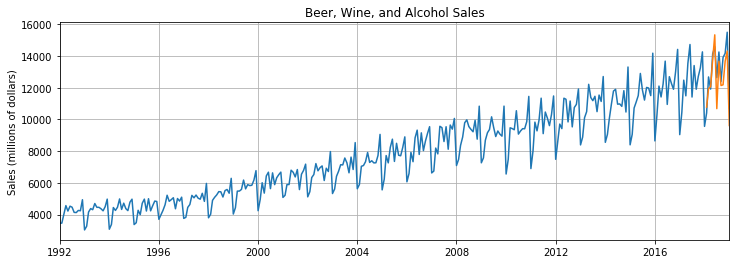

In [26]:
plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.show()

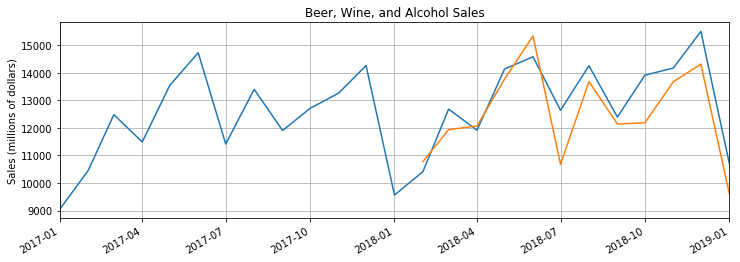

In [27]:
# Plot the end of the graph
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()

# Select the end of the graph with slice notation:
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions)
plt.show()

For more information on x-axis date formatting in matplotlib, check out <a href='https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.autofmt_xdate'><tt><strong>matplotlib.figure.Figure.autofmt_xdate</strong></tt></a> and <a href='https://matplotlib.org/api/dates_api.html#matplotlib.dates.DateFormatter'><tt><strong>matplotlib.dates.DateFormatter</strong></tt></a>

# Forecast into an unknown future
This time we'll continue training the model using the entire dataset, and predict 12 steps into the future.

In [28]:
epochs = 100

# set model to back to training mode
model.train()

# feature scale the entire dataset
y_norm = scaler.fit_transform(y.reshape(-1, 1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm,window_size)

import time
start_time = time.time()

for epoch in range(epochs):
    
    # train on the full set of sequences
    for seq, y_train in all_data:  
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.02658496
Epoch:  2 Loss: 0.02985313
Epoch:  3 Loss: 0.01421225
Epoch:  4 Loss: 0.01419733
Epoch:  5 Loss: 0.01290122
Epoch:  6 Loss: 0.01244991
Epoch:  7 Loss: 0.01119690
Epoch:  8 Loss: 0.00854800
Epoch:  9 Loss: 0.00788417
Epoch: 10 Loss: 0.00792318
Epoch: 11 Loss: 0.00556064
Epoch: 12 Loss: 0.00598394
Epoch: 13 Loss: 0.00537636
Epoch: 14 Loss: 0.00649350
Epoch: 15 Loss: 0.00798889
Epoch: 16 Loss: 0.00699036
Epoch: 17 Loss: 0.00741554
Epoch: 18 Loss: 0.00671443
Epoch: 19 Loss: 0.00555703
Epoch: 20 Loss: 0.00517232
Epoch: 21 Loss: 0.00519288
Epoch: 22 Loss: 0.00412102
Epoch: 23 Loss: 0.00535119
Epoch: 24 Loss: 0.00888540
Epoch: 25 Loss: 0.00753472
Epoch: 26 Loss: 0.00589289
Epoch: 27 Loss: 0.00580891
Epoch: 28 Loss: 0.00776316
Epoch: 29 Loss: 0.00629479
Epoch: 30 Loss: 0.00895946
Epoch: 31 Loss: 0.00883982
Epoch: 32 Loss: 0.00968022
Epoch: 33 Loss: 0.00415197
Epoch: 34 Loss: 0.00383917
Epoch: 35 Loss: 0.00253066
Epoch: 36 Loss: 0.00149691
Epoch: 37 Loss: 0.00340568
E

## Predict future values, plot the result

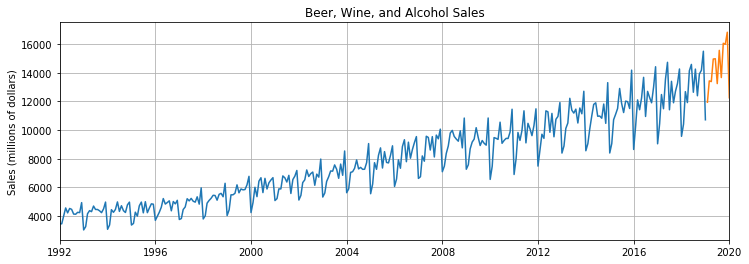

In [29]:
window_size = 12
future = 12
L = len(y)

preds = y_norm[-window_size:].tolist()

model.eval()
for i in range(future):  
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters here!
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))  
        preds.append(model(seq).item())

# Inverse-normalize the prediction set
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1, 1))

# PLOT THE RESULT
# Set a data range for the predicted data.
# Remember that the stop date has to be later than the last predicted value.
x = np.arange('2019-02-01', '2020-02-01', dtype='datetime64[M]').astype('datetime64[D]')

plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions[window_size:])
plt.show()

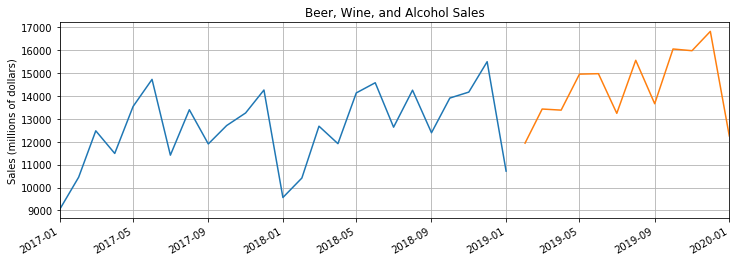

In [30]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions[window_size:])
plt.show()

<h3>BONUS:</h3>To save time in the future, we've written a function that will take in a time series training data set, and output a tensor of <tt>(seq, label)</tt> tuples.

In [31]:
# Load dependencies
from sklearn.preprocessing import MinMaxScaler

# Instantiate a scaler
"""
This has to be done outside the function definition so that
we can inverse_transform the prediction set later on.
"""
scaler = MinMaxScaler(feature_range=(-1, 1))

# Extract values from the source .csv file
df = pd.read_csv('../Data/TimeSeriesData/Alcohol_Sales.csv',index_col=0,parse_dates=True)
y = df['S4248SM144NCEN'].values.astype(float)

# Define a test size
test_size = 12

# Create the training set of values
train_set = y[:-test_size]

In [32]:
# DEFINE A FUNCTION:
def create_train_data(seq,ws=12):
    """Takes in a training sequence and window size (ws) of
       default size 12, returns a tensor of (seq/label) tuples"""
    seq_norm = scaler.fit_transform(seq.reshape(-1, 1))    
    seq_norm = torch.FloatTensor(seq_norm).view(-1)

    out = []
    L = len(seq_norm)
    for i in range(L-ws):
        window = seq_norm[i:i+ws]
        label = seq_norm[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [33]:
# Apply the function to train_set
train_data = create_train_data(train_set,12)
len(train_data)  # this should equal 313-12

301

In [34]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]), tensor([-1.]))

In [35]:
help(create_train_data)

Help on function create_train_data in module __main__:

create_train_data(seq, ws=12)
    Takes in a training sequence and window size (ws) of
    default size 12, returns a tensor of (seq/label) tuples



# RNN Exercises
For these exercises we're using data from the Federal Reserve Economic Database (FRED) concerning Electricity and Gas Utilities Production from January 1992 to January 2019 (325 records).

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

In the exercises below you'll be asked to do the following:
* Perform standard imports, load & plot the dataset (code provided)
* Prepare data for an LSTM model
* Define the LSTM model, loss and optimization functions
* Train the model
* Evaluate the model on test data
* OPTIONAL: Plot the results

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

## Perform standard imports, load and plot the dataset
Run the cells below to load the libraries needed for this exercise and the Energy Production dataset, and to plot the data.

In [1]:
# RUN THIS CELL
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('../Data/TimeSeriesData/Energy_Production.csv',index_col=0,parse_dates=True)
df.dropna(inplace=True)
print(len(df))
df.head()

325


IPG2211A2N
DATE                  
1992-01-01     85.5560
1992-02-01     80.4178
1992-03-01     74.7390
1992-04-01     69.8367
1992-05-01     67.3781

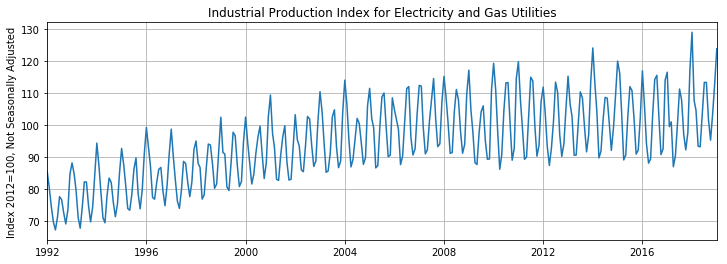

In [2]:
# RUN THIS CELL
plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['IPG2211A2N'])
plt.show()

# Prepare the data
For the first set of exercises we'll
* divide the data into train and test sets
* normalize the training set
* prepare windowed seq/label tuples for an LSTM model

## 1. Divide the data into train and test sets
Working with a window_size of 12, divide the dataset into a sequence of 313 training records (including the window), and a test set of 12 records.

In [ ]:
# CODE HERE
y = df['IPG2211A2N'].values.astype(float)

test_size = 
window_size = 

train_set = 
test_set = 

In [ ]:
# Run the code below to check your results:
print(f'Train: {len(train_set)}')
print(f'Test:  {len(test_set)}')

In [3]:
# DON'T WRITE HERE

Train: 313
Test:  12


## 2. Normalize the training set
Feature scale the training set to fit within the range [-1,1].

In [ ]:
# CODE HERE
scaler = MinMaxScaler(feature_range=(-1, 1))


train_norm = 

In [ ]:
# Run the code below to check your results:
print(f'First item, original: {train_set[0]}')
print(f'First item, scaled:  {train_norm[0]}')

In [4]:
# DON'T WRITE HERE

First item, original: 85.556
First item, scaled: [-0.4091274]


## 3. Prepare data for LSTM
Prepare the list of windowed sequence/label tuples to be fed into an LSTM model.

In [5]:
# RUN THIS CELL
train_norm = torch.FloatTensor(train_norm).view(-1)

def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [ ]:
# CODE HERE

train_data = 

In [ ]:
# Run the code below to check your results:
print(f'Train_data: {len(train_data)}')  # should equal 301

In [6]:
# DON'T WRITE HERE

Train_data: 301


## 4. Define the model
Design a model that has a (1,64) LSTM layer and a (64,1) fully-connected linear layer. Be sure to initialize $h_0$ and $c_0$, and return only the last predicted value.

In [ ]:
# CODE HERE
class LSTMnetwork(nn.Module):
    
    
    
    
    
    
    
    



In [ ]:
# Run the code below to check your results:
torch.manual_seed(101)
model = LSTMnetwork()
model

In [7]:
# DON'T WRITE HERE

LSTMnetwork(
  (lstm): LSTM(1, 64)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)

## 5. Define loss and optimization functions
Define a loss function called "criterion" and an optimizer called "optimizer".<br>
You can use any functions you want, although we used MSELoss and Adam (learning rate of 0.001) respectively.

In [ ]:
# CODE HERE




In [8]:
# DON'T WRITE HERE

### 6. Train the model
Don't worry about tracking loss values, displaying results, or validating the test set. Just train the model through 50 epochs. We'll evaluate the trained model in the next step.<br>
OPTIONAL: print something after each epoch to indicate training progress.

In [ ]:
# CODE HERE




In [9]:
# DON'T WRITE HERE

1 of 50 epochs completed
2 of 50 epochs completed
3 of 50 epochs completed
4 of 50 epochs completed
5 of 50 epochs completed
6 of 50 epochs completed
7 of 50 epochs completed
8 of 50 epochs completed
9 of 50 epochs completed
10 of 50 epochs completed
11 of 50 epochs completed
12 of 50 epochs completed
13 of 50 epochs completed
14 of 50 epochs completed
15 of 50 epochs completed
16 of 50 epochs completed
17 of 50 epochs completed
18 of 50 epochs completed
19 of 50 epochs completed
20 of 50 epochs completed
21 of 50 epochs completed
22 of 50 epochs completed
23 of 50 epochs completed
24 of 50 epochs completed
25 of 50 epochs completed
26 of 50 epochs completed
27 of 50 epochs completed
28 of 50 epochs completed
29 of 50 epochs completed
30 of 50 epochs completed
31 of 50 epochs completed
32 of 50 epochs completed
33 of 50 epochs completed
34 of 50 epochs completed
35 of 50 epochs completed
36 of 50 epochs completed
37 of 50 epochs completed
38 of 50 epochs completed
39 of 50 epochs compl

### 9. Evaluate the model using the test set
Be sure to re-initialize the hidden parameters $h_0$ and $c_0$ before running the model.

In [ ]:
# CODE HERE
future = 
preds = 

model.eval()

for i in range(future):




In [ ]:
# Run the code below to check your results:
preds[window_size:]

In [10]:
# DON'T WRITE HERE

[0.25382155179977417,
 -0.0027704648673534393,
 -0.343053936958313,
 -0.21152164041996002,
 0.23945370316505432,
 0.4895053505897522,
 0.24688751995563507,
 -0.08669154345989227,
 -0.25793153047561646,
 0.022461334243416786,
 0.5438402891159058,
 0.6108715534210205]

## 10. Inverse transform the predicted values
Rescale the predicted values up to the original test set range.

In [ ]:
# CODE HERE
true_predictions = 

In [ ]:
# Run the code below to check your results:
true_predictions

In [11]:
# DON'T WRITE HERE

array([[105.95129313],
       [ 98.05736803],
       [ 87.58871716],
       [ 91.63524249],
       [105.50927345],
       [113.20198736],
       [105.73797111],
       [ 95.47557801],
       [ 90.20746543],
       [ 98.83361172],
       [114.87357457],
       [116.93575791]])

## BONUS EXERCISE: Plot the result
Plot the true_predictions values together with the original data. Remember to create a range of datetime values for the predicted data.

In [ ]:
# CODE HERE


In [ ]:
# CODE HERE TO DISPLAY THE END OF THE GRAPH


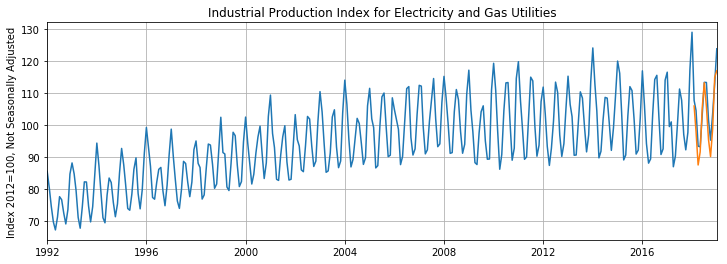

In [12]:
# DON'T WRITE HERE

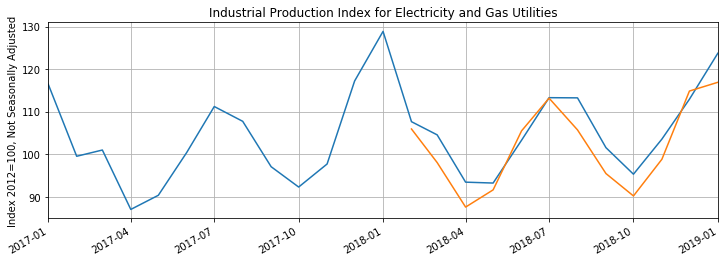

In [13]:
# DON'T WRITE HERE

# RNN Exercises - Solutions
For these exercises we're using data from the Federal Reserve Economic Database (FRED) concerning Electricity and Gas Utilities Production from January 1992 to January 2019 (325 records).

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

In the exercises below you'll be asked to do the following:
* Perform standard imports, load & plot the dataset (code provided)
* Prepare data for an LSTM model
* Define the LSTM model, loss and optimization functions
* Train the model
* Evaluate the model on test data
* OPTIONAL: Plot the results

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

## Perform standard imports, load and plot the dataset
Run the cells below to load the libraries needed for this exercise and the Energy Production dataset, and to plot the data.

In [1]:
# RUN THIS CELL
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('../Data/TimeSeriesData/Energy_Production.csv',index_col=0,parse_dates=True)
df.dropna(inplace=True)
print(len(df))
df.head()

325


IPG2211A2N
DATE                  
1992-01-01     85.5560
1992-02-01     80.4178
1992-03-01     74.7390
1992-04-01     69.8367
1992-05-01     67.3781

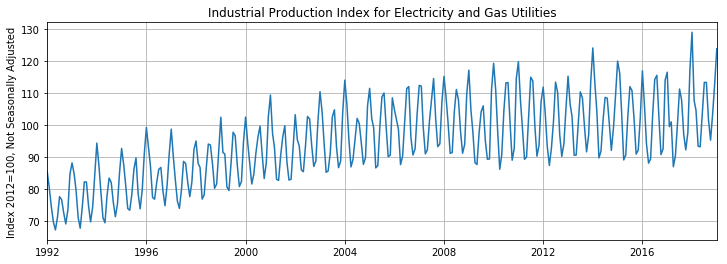

In [2]:
# RUN THIS CELL
plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['IPG2211A2N'])
plt.show()

# Prepare the data
For the first set of exercises we'll
* divide the data into train and test sets
* normalize the training set
* prepare windowed seq/label tuples for an LSTM model

## 1. Divide the data into train and test sets
Working with a window_size of 12, divide the dataset into a sequence of 313 training records (including the window), and a test set of 12 records.

In [ ]:
# CODE HERE
y = df['IPG2211A2N'].values.astype(float)

test_size = 
window_size = 

train_set = 
test_set = 

In [ ]:
# Run the code below to check your results:
print(f'Train: {len(train_set)}')
print(f'Test:  {len(test_set)}')

In [3]:
# DON'T WRITE HERE
y = df['IPG2211A2N'].values.astype(float)

test_size = 12
window_size = 12

train_set = y[:-test_size]
test_set = y[-test_size:]

print(f'Train: {len(train_set)}')
print(f'Test:  {len(test_set)}')

Train: 313
Test:  12


## 2. Normalize the training set
Feature scale the training set to fit within the range [-1,1].

In [ ]:
# CODE HERE
scaler = MinMaxScaler(feature_range=(-1, 1))


train_norm = 

In [ ]:
# Run the code below to check your results:
print(f'First item, original: {train_set[0]}')
print(f'First item, scaled:  {train_norm[0]}')

In [4]:
# DON'T WRITE HERE
scaler = MinMaxScaler(feature_range=(-1, 1))

train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

print(f'First item, original: {train_set[0]}')
print(f'First item, scaled: {train_norm[0]}')

First item, original: 85.556
First item, scaled: [-0.4091274]


## 3. Prepare data for LSTM
Prepare the list of windowed sequence/label tuples to be fed into an LSTM model.

In [5]:
# RUN THIS CELL
train_norm = torch.FloatTensor(train_norm).view(-1)

def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [ ]:
# CODE HERE

train_data = 

In [ ]:
# Run the code below to check your results:
print(f'Train_data: {len(train_data)}')  # should equal 301

In [6]:
# DON'T WRITE HERE
train_data = input_data(train_norm,window_size)

print(f'Train_data: {len(train_data)}')

Train_data: 301


## 4. Define the model
Design a model that has a (1,64) LSTM layer and a (64,1) fully-connected linear layer. Be sure to initialize $h_0$ and $c_0$, and return only the last predicted value.

In [ ]:
# CODE HERE
class LSTMnetwork(nn.Module):
    
    
    
    
    
    
    
    



In [ ]:
# Run the code below to check your results:
torch.manual_seed(101)
model = LSTMnetwork()
model

In [7]:
# DON'T WRITE HERE
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=64,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]
    
torch.manual_seed(101)
model = LSTMnetwork()
model

LSTMnetwork(
  (lstm): LSTM(1, 64)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)

## 5. Define loss and optimization functions
Define a loss function called "criterion" and an optimizer called "optimizer".<br>
You can use any functions you want, although we used MSELoss and Adam (learning rate of 0.001) respectively.

In [ ]:
# CODE HERE




In [8]:
# DON'T WRITE HERE
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### 6. Train the model
Don't worry about tracking loss values, displaying results, or validating the test set. Just train the model through 50 epochs. We'll evaluate the trained model in the next step.<br>
OPTIONAL: print something after each epoch to indicate training progress.

In [ ]:
# CODE HERE




In [9]:
# DON'T WRITE HERE
epochs = 50

for i in range(epochs):
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        # apply the model
        y_pred = model(seq)

        # update parameters
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # OPTIONAL print statement
    print(f'{i+1} of {epochs} epochs completed')

1 of 50 epochs completed
2 of 50 epochs completed
3 of 50 epochs completed
4 of 50 epochs completed
5 of 50 epochs completed
6 of 50 epochs completed
7 of 50 epochs completed
8 of 50 epochs completed
9 of 50 epochs completed
10 of 50 epochs completed
11 of 50 epochs completed
12 of 50 epochs completed
13 of 50 epochs completed
14 of 50 epochs completed
15 of 50 epochs completed
16 of 50 epochs completed
17 of 50 epochs completed
18 of 50 epochs completed
19 of 50 epochs completed
20 of 50 epochs completed
21 of 50 epochs completed
22 of 50 epochs completed
23 of 50 epochs completed
24 of 50 epochs completed
25 of 50 epochs completed
26 of 50 epochs completed
27 of 50 epochs completed
28 of 50 epochs completed
29 of 50 epochs completed
30 of 50 epochs completed
31 of 50 epochs completed
32 of 50 epochs completed
33 of 50 epochs completed
34 of 50 epochs completed
35 of 50 epochs completed
36 of 50 epochs completed
37 of 50 epochs completed
38 of 50 epochs completed
39 of 50 epochs compl

### 9. Evaluate the model using the test set
Be sure to re-initialize the hidden parameters $h_0$ and $c_0$ before running the model.

In [ ]:
# CODE HERE
future = 
preds = 

model.eval()

for i in range(future):




In [ ]:
# Run the code below to check your results:
preds[window_size:]

In [10]:
# DON'T WRITE HERE
future = 12
preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())
        
preds[window_size:]

[0.25382155179977417,
 -0.0027704648673534393,
 -0.343053936958313,
 -0.21152164041996002,
 0.23945370316505432,
 0.4895053505897522,
 0.24688751995563507,
 -0.08669154345989227,
 -0.25793153047561646,
 0.022461334243416786,
 0.5438402891159058,
 0.6108715534210205]

## 10. Inverse transform the predicted values
Rescale the predicted values up to the original test set range.

In [ ]:
# CODE HERE
true_predictions = 

In [ ]:
# Run the code below to check your results:
true_predictions

In [11]:
# DON'T WRITE HERE
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
true_predictions

array([[105.95129313],
       [ 98.05736803],
       [ 87.58871716],
       [ 91.63524249],
       [105.50927345],
       [113.20198736],
       [105.73797111],
       [ 95.47557801],
       [ 90.20746543],
       [ 98.83361172],
       [114.87357457],
       [116.93575791]])

## BONUS EXERCISE: Plot the result
Plot the true_predictions values together with the original data. Remember to create a range of datetime values for the predicted data.

In [ ]:
# CODE HERE


In [ ]:
# CODE HERE TO DISPLAY THE END OF THE GRAPH


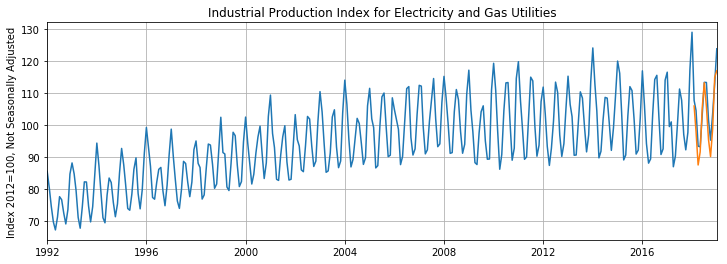

In [12]:
# DON'T WRITE HERE
x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]').astype('datetime64[D]')

plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['IPG2211A2N'])
plt.plot(x,true_predictions)
plt.show()

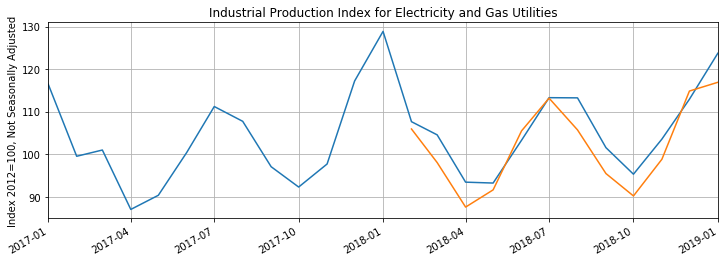

In [13]:
# DON'T WRITE HERE
fig = plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['IPG2211A2N']['2017-01-01':])
plt.plot(x,true_predictions)
plt.show()

# What is CUDA?

Most people confuse CUDA for a language or maybe an API. It is not.

It’s more than that. CUDA is a parallel computing platform and programming model that makes using a GPU for general purpose computing simple and elegant. The developer still programs in the familiar C, C++, Fortran, or an ever expanding list of supported languages, and incorporates extensions of these languages in the form of a few basic keywords.

These keywords let the developer express massive amounts of parallelism and direct the compiler to the portion of the application that maps to the GPU.

# How do I install PyTorch for GPU?

Refer to video, its dependent on whether you have an NVIDIA GPU card or not.

# How do I know if I have CUDA available?

In [1]:
import torch
torch.cuda.is_available()
# True

True

# Using GPU and CUDA

We've provided 2 versions of our yml file, a GPU version and a CPU version. To use GPU, you need to either manually create a virtual environment, please watch the video related to this lecture, as not every computer can run GPU, you need CUDA and an NVIDIA GPU.

In [2]:
## Get Id of default device
torch.cuda.current_device()

0

In [3]:
# 0
torch.cuda.get_device_name(0) # Get name device with ID '0'

'GeForce GTX 1080 Ti'

In [4]:
# Returns the current GPU memory usage by 
# tensors in bytes for a given device
torch.cuda.memory_allocated()

0

In [5]:
# Returns the current GPU memory managed by the
# caching allocator in bytes for a given device
torch.cuda.memory_cached()

0

# Using CUDA instead of CPU

In [6]:
# CPU
a = torch.FloatTensor([1.,2.])

In [7]:
a

tensor([1., 2.])

In [8]:
a.device

device(type='cpu')

In [9]:
# GPU
a = torch.FloatTensor([1., 2.]).cuda()

In [10]:
a.device

device(type='cuda', index=0)

In [11]:
torch.cuda.memory_allocated()

512

## Sending Models to GPU

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [14]:
torch.manual_seed(32)
model = Model()

In [15]:
# From the discussions here: discuss.pytorch.org/t/how-to-check-if-model-is-on-cuda
next(model.parameters()).is_cuda

False

In [16]:
gpumodel = model.cuda()

In [17]:
next(gpumodel.parameters()).is_cuda

True

In [18]:
df = pd.read_csv('../Data/iris.csv')
X = df.drop('target',axis=1).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

## Convert Tensors to .cuda() tensors

In [22]:
X_train = torch.FloatTensor(X_train).cuda()
X_test = torch.FloatTensor(X_test).cuda()
y_train = torch.LongTensor(y_train).cuda()
y_test = torch.LongTensor(y_test).cuda()

In [23]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)
testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [25]:
import time
epochs = 100
losses = []
start = time.time()
for i in range(epochs):
    i+=1
    y_pred = gpumodel.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print(f'TOTAL TRAINING TIME: {time.time()-start}')

epoch:  1  loss: 1.15071142
epoch: 11  loss: 0.93773186
epoch: 21  loss: 0.77982736
epoch: 31  loss: 0.60996711
epoch: 41  loss: 0.40083539
epoch: 51  loss: 0.25436994
epoch: 61  loss: 0.15052448
epoch: 71  loss: 0.10086147
epoch: 81  loss: 0.08127660
epoch: 91  loss: 0.07230931
TOTAL TRAINING TIME: 0.4668765068054199


# RNN for Text Generation

## Generating Text (encoded variables)

We saw how to generate continuous values, now let's see how to generalize this to generate categorical sequences (such as words or letters).

## Imports

In [1]:
import torch
from torch import nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Get Text Data

In [2]:
with open('../Data/shakespeare.txt','r',encoding='utf8') as f:
    text = f.read()

In [3]:
text[:1000]

"\n                     1\n  From fairest creatures we desire increase,\n  That thereby beauty's rose might never die,\n  But as the riper should by time decease,\n  His tender heir might bear his memory:\n  But thou contracted to thine own bright eyes,\n  Feed'st thy light's flame with self-substantial fuel,\n  Making a famine where abundance lies,\n  Thy self thy foe, to thy sweet self too cruel:\n  Thou that art now the world's fresh ornament,\n  And only herald to the gaudy spring,\n  Within thine own bud buriest thy content,\n  And tender churl mak'st waste in niggarding:\n    Pity the world, or else this glutton be,\n    To eat the world's due, by the grave and thee.\n\n\n                     2\n  When forty winters shall besiege thy brow,\n  And dig deep trenches in thy beauty's field,\n  Thy youth's proud livery so gazed on now,\n  Will be a tattered weed of small worth held:  \n  Then being asked, where all thy beauty lies,\n  Where all the treasure of thy lusty days;\n  To sa

In [4]:
print(text[:1000])


                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bud buriest thy content,
  And tender churl mak'st waste in niggarding:
    Pity the world, or else this glutton be,
    To eat the world's due, by the grave and thee.


                     2
  When forty winters shall besiege thy brow,
  And dig deep trenches in thy beauty's field,
  Thy youth's proud livery so gazed on now,
  Will be a tattered weed of small worth held:  
  Then being asked, where all thy beauty lies,
  Where all the treasure of thy lusty days;
  To say within thine own deep su

In [5]:
len(text)

5445609

## Encode Entire Text

In [6]:
all_characters = set(text)

In [7]:
# all_characters

In [8]:
decoder = dict(enumerate(all_characters))

In [9]:
# decoder
# decoder.items()

In [10]:
encoder = {char: ind for ind,char in decoder.items()}

In [11]:
# encoder

In [12]:
encoded_text = np.array([encoder[char] for char in text])

In [13]:
encoded_text[:500]

array([51, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 41, 51, 26, 26, 31, 29, 39, 17, 26, 73, 14, 60,
       29, 46, 78, 21, 26, 35, 29, 46, 14, 21,  6, 29, 46, 78, 26,  2, 46,
       26, 65, 46, 78, 60, 29, 46, 26, 60, 55, 35, 29, 46, 14, 78, 46, 63,
       51, 26, 26, 62,  7, 14, 21, 26, 21,  7, 46, 29, 46, 74, 38, 26, 74,
       46, 14,  6, 21, 38, 77, 78, 26, 29, 39, 78, 46, 26, 17, 60, 82,  7,
       21, 26, 55, 46, 27, 46, 29, 26, 65, 60, 46, 63, 51, 26, 26, 67,  6,
       21, 26, 14, 78, 26, 21,  7, 46, 26, 29, 60, 22, 46, 29, 26, 78,  7,
       39,  6, 43, 65, 26, 74, 38, 26, 21, 60, 17, 46, 26, 65, 46, 35, 46,
       14, 78, 46, 63, 51, 26, 26, 36, 60, 78, 26, 21, 46, 55, 65, 46, 29,
       26,  7, 46, 60, 29, 26, 17, 60, 82,  7, 21, 26, 74, 46, 14, 29, 26,
        7, 60, 78, 26, 17, 46, 17, 39, 29, 38, 10, 51, 26, 26, 67,  6, 21,
       26, 21,  7, 39,  6, 26, 35, 39, 55, 21, 29, 14, 35, 21, 46, 65, 26,
       21, 39, 26, 21,  7

## One Hot Encoding

As previously discussed, we need to one-hot encode our data inorder for it to work with the network structure. Make sure to review numpy if any of these operations confuse you!

In [14]:
def one_hot_encoder(encoded_text, num_uni_chars):
    '''
    encoded_text : batch of encoded text
    
    num_uni_chars = number of unique characters (len(set(text)))
    '''
    
    # METHOD FROM:
    # https://stackoverflow.com/questions/29831489/convert-encoded_textay-of-indices-to-1-hot-encoded-numpy-encoded_textay
      
    # Create a placeholder for zeros.
    one_hot = np.zeros((encoded_text.size, num_uni_chars))
    
    # Convert data type for later use with pytorch (errors if we dont!)
    one_hot = one_hot.astype(np.float32)

    # Using fancy indexing fill in the 1s at the correct index locations
    one_hot[np.arange(one_hot.shape[0]), encoded_text.flatten()] = 1.0
    

    # Reshape it so it matches the batch sahe
    one_hot = one_hot.reshape((*encoded_text.shape, num_uni_chars))
    
    return one_hot

In [15]:
one_hot_encoder(np.array([1,2,0]),3)

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

--------------
---------------
# Creating Training Batches

We need to create a function that will generate batches of characters along with the next character in the sequence as a label.

-----------------
------------

In [16]:
example_text = np.arange(10)

In [17]:
example_text

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
# If we wanted 5 batches
example_text.reshape((5,-1))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [19]:
def generate_batches(encoded_text, samp_per_batch=10, seq_len=50):
    
    '''
    Generate (using yield) batches for training.
    
    X: Encoded Text of length seq_len
    Y: Encoded Text shifted by one
    
    Example:
    
    X:
    
    [[1 2 3]]
    
    Y:
    
    [[ 2 3 4]]
    
    encoded_text : Complete Encoded Text to make batches from
    batch_size : Number of samples per batch
    seq_len : Length of character sequence
       
    '''
    
    # Total number of characters per batch
    # Example: If samp_per_batch is 2 and seq_len is 50, then 100
    # characters come out per batch.
    char_per_batch = samp_per_batch * seq_len
    
    
    # Number of batches available to make
    # Use int() to roun to nearest integer
    num_batches_avail = int(len(encoded_text)/char_per_batch)
    
    # Cut off end of encoded_text that
    # won't fit evenly into a batch
    encoded_text = encoded_text[:num_batches_avail * char_per_batch]
    
    
    # Reshape text into rows the size of a batch
    encoded_text = encoded_text.reshape((samp_per_batch, -1))
    

    # Go through each row in array.
    for n in range(0, encoded_text.shape[1], seq_len):
        
        # Grab feature characters
        x = encoded_text[:, n:n+seq_len]
        
        # y is the target shifted over by 1
        y = np.zeros_like(x)
       
        #
        try:
            y[:, :-1] = x[:, 1:]
            y[:, -1]  = encoded_text[:, n+seq_len]
            
        # FOR POTENTIAL INDEXING ERROR AT THE END    
        except:
            y[:, :-1] = x[:, 1:]
            y[:, -1] = encoded_text[:, 0]
            
        yield x, y

### Example of generating a batch

In [20]:
sample_text = encoded_text[:20]

In [21]:
sample_text

array([51, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26])

In [22]:
batch_generator = generate_batches(sample_text,samp_per_batch=2,seq_len=5)

In [23]:
# Grab first batch
x, y = next(batch_generator)

In [24]:
x

array([[51, 26, 26, 26, 26],
       [26, 26, 26, 26, 26]])

In [25]:
y

array([[26, 26, 26, 26, 26],
       [26, 26, 26, 26, 26]])

--------

## GPU Check

Remember this will take a lot longer on CPU!

In [26]:
torch.cuda.is_available()

True

# Creating the LSTM Model

**Note! We will have options for GPU users and CPU users. CPU will take MUCH LONGER to train and you may encounter RAM issues depending on your hardware. If that is the case, consider using cloud services like AWS, GCP, or Azure. Note, these may cost you money to use!**

In [27]:
class CharModel(nn.Module):
    
    def __init__(self, all_chars, num_hidden=256, num_layers=4,drop_prob=0.5,use_gpu=False):
        
        
        # SET UP ATTRIBUTES
        super().__init__()
        self.drop_prob = drop_prob
        self.num_layers = num_layers
        self.num_hidden = num_hidden
        self.use_gpu = use_gpu
        
        #CHARACTER SET, ENCODER, and DECODER
        self.all_chars = all_chars
        self.decoder = dict(enumerate(all_chars))
        self.encoder = {char: ind for ind,char in decoder.items()}
        
        
        self.lstm = nn.LSTM(len(self.all_chars), num_hidden, num_layers, dropout=drop_prob, batch_first=True)
        
        self.dropout = nn.Dropout(drop_prob)
        
        self.fc_linear = nn.Linear(num_hidden, len(self.all_chars))
      
    
    def forward(self, x, hidden):
                  
        
        lstm_output, hidden = self.lstm(x, hidden)
        
        
        drop_output = self.dropout(lstm_output)
        
        drop_output = drop_output.contiguous().view(-1, self.num_hidden)
        
        
        final_out = self.fc_linear(drop_output)
        
        
        return final_out, hidden
    
    
    def hidden_state(self, batch_size):
        '''
        Used as separate method to account for both GPU and CPU users.
        '''
        
        if self.use_gpu:
            
            hidden = (torch.zeros(self.num_layers,batch_size,self.num_hidden).cuda(),
                     torch.zeros(self.num_layers,batch_size,self.num_hidden).cuda())
        else:
            hidden = (torch.zeros(self.num_layers,batch_size,self.num_hidden),
                     torch.zeros(self.num_layers,batch_size,self.num_hidden))
        
        return hidden
        

## Instance of the Model

In [28]:
model = CharModel(
    all_chars=all_characters,
    num_hidden=512,
    num_layers=3,
    drop_prob=0.5,
    use_gpu=True,
)

In [29]:
total_param  = []
for p in model.parameters():
    total_param.append(int(p.numel()))

Try to make the total_parameters be roughly the same magnitude as the number of characters in the text.

In [30]:
sum(total_param)

5470292

In [31]:
len(encoded_text)

5445609

### Optimizer and Loss

In [32]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

## Training Data and Validation Data

In [33]:
# percentage of data to be used for training
train_percent = 0.1

In [34]:
len(encoded_text)

5445609

In [35]:
int(len(encoded_text) * (train_percent))

544560

In [36]:
train_ind = int(len(encoded_text) * (train_percent))

In [37]:
train_data = encoded_text[:train_ind]
val_data = encoded_text[train_ind:]

# Training the Network

## Variables

Feel free to play around with these values!

In [38]:
## VARIABLES

# Epochs to train for
epochs = 50
# batch size 
batch_size = 128

# Length of sequence
seq_len = 100

# for printing report purposes
# always start at 0
tracker = 0

# number of characters in text
num_char = max(encoded_text)+1

------

In [39]:
# Set model to train
model.train()


# Check to see if using GPU
if model.use_gpu:
    model.cuda()

for i in range(epochs):
    
    hidden = model.hidden_state(batch_size)
    
    
    for x,y in generate_batches(train_data,batch_size,seq_len):
        
        tracker += 1
        
        # One Hot Encode incoming data
        x = one_hot_encoder(x,num_char)
        
        # Convert Numpy Arrays to Tensor
        
        inputs = torch.from_numpy(x)
        targets = torch.from_numpy(y)
        
        # Adjust for GPU if necessary
        
        if model.use_gpu:
            
            inputs = inputs.cuda()
            targets = targets.cuda()
            
        # Reset Hidden State
        # If we dont' reset we would backpropagate through all training history
        hidden = tuple([state.data for state in hidden])
        
        model.zero_grad()
        
        lstm_output, hidden = model.forward(inputs,hidden)
        loss = criterion(lstm_output,targets.view(batch_size*seq_len).long())
        
        loss.backward()
        
        # POSSIBLE EXPLODING GRADIENT PROBLEM!
        # LET"S CLIP JUST IN CASE
        nn.utils.clip_grad_norm_(model.parameters(),max_norm=5)
        
        optimizer.step()
        
        
        
        ###################################
        ### CHECK ON VALIDATION SET ######
        #################################
        
        if tracker % 25 == 0:
            
            val_hidden = model.hidden_state(batch_size)
            val_losses = []
            model.eval()
            
            for x,y in generate_batches(val_data,batch_size,seq_len):
                
                # One Hot Encode incoming data
                x = one_hot_encoder(x,num_char)
                

                # Convert Numpy Arrays to Tensor

                inputs = torch.from_numpy(x)
                targets = torch.from_numpy(y)

                # Adjust for GPU if necessary

                if model.use_gpu:

                    inputs = inputs.cuda()
                    targets = targets.cuda()
                    
                # Reset Hidden State
                # If we dont' reset we would backpropagate through 
                # all training history
                val_hidden = tuple([state.data for state in val_hidden])
                
                lstm_output, val_hidden = model.forward(inputs,val_hidden)
                val_loss = criterion(lstm_output,targets.view(batch_size*seq_len).long())
        
                val_losses.append(val_loss.item())
            
            # Reset to training model after val for loop
            model.train()
            
            print(f"Epoch: {i} Step: {tracker} Val Loss: {val_loss.item()}")

Epoch: 0 Step: 25 Val Loss: 3.241183280944824
Epoch: 1 Step: 50 Val Loss: 3.2209343910217285
Epoch: 1 Step: 75 Val Loss: 3.2246036529541016
Epoch: 2 Step: 100 Val Loss: 3.103549003601074
Epoch: 2 Step: 125 Val Loss: 3.0078160762786865
Epoch: 3 Step: 150 Val Loss: 2.8424694538116455
Epoch: 4 Step: 175 Val Loss: 2.7311224937438965
Epoch: 4 Step: 200 Val Loss: 2.6245357990264893
Epoch: 5 Step: 225 Val Loss: 2.530056953430176
Epoch: 5 Step: 250 Val Loss: 2.511744737625122
Epoch: 6 Step: 275 Val Loss: 2.424506187438965
Epoch: 7 Step: 300 Val Loss: 2.3757734298706055
Epoch: 7 Step: 325 Val Loss: 2.3281121253967285
Epoch: 8 Step: 350 Val Loss: 2.287860631942749
Epoch: 8 Step: 375 Val Loss: 2.258666515350342
Epoch: 9 Step: 400 Val Loss: 2.219432830810547
Epoch: 10 Step: 425 Val Loss: 2.1962826251983643
Epoch: 10 Step: 450 Val Loss: 2.1531155109405518
Epoch: 11 Step: 475 Val Loss: 2.12485408782959
Epoch: 11 Step: 500 Val Loss: 2.102055072784424
Epoch: 12 Step: 525 Val Loss: 2.0815775394439697
E

-------
------

## Saving the Model

https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [40]:
# Be careful to overwrite our original name file!
model_name = 'example.net'

In [41]:
torch.save(model.state_dict(),model_name)

## Load Model

In [44]:
# MUST MATCH THE EXACT SAME SETTINGS AS MODEL USED DURING TRAINING!

model = CharModel(
    all_chars=all_characters,
    num_hidden=512,
    num_layers=3,
    drop_prob=0.5,
    use_gpu=True,
)

In [45]:
model.load_state_dict(torch.load(model_name))
model.eval()

CharModel(
  (lstm): LSTM(84, 512, num_layers=3, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5)
  (fc_linear): Linear(in_features=512, out_features=84, bias=True)
)

# Generating Predictions

--------

In [46]:
def predict_next_char(model, char, hidden=None, k=1):
        
        # Encode raw letters with model
        encoded_text = model.encoder[char]
        
        # set as numpy array for one hot encoding
        # NOTE THE [[ ]] dimensions!!
        encoded_text = np.array([[encoded_text]])
        
        # One hot encoding
        encoded_text = one_hot_encoder(encoded_text, len(model.all_chars))
        
        # Convert to Tensor
        inputs = torch.from_numpy(encoded_text)
        
        # Check for CPU
        if(model.use_gpu):
            inputs = inputs.cuda()
        
        
        # Grab hidden states
        hidden = tuple([state.data for state in hidden])
        
        
        # Run model and get predicted output
        lstm_out, hidden = model(inputs, hidden)

        
        # Convert lstm_out to probabilities
        probs = F.softmax(lstm_out, dim=1).data
        
        
        
        if(model.use_gpu):
            # move back to CPU to use with numpy
            probs = probs.cpu()
        
        
        # k determines how many characters to consider
        # for our probability choice.
        # https://pytorch.org/docs/stable/torch.html#torch.topk
        
        # Return k largest probabilities in tensor
        probs, index_positions = probs.topk(k)
        
        
        index_positions = index_positions.numpy().squeeze()
        
        # Create array of probabilities
        probs = probs.numpy().flatten()
        
        # Convert to probabilities per index
        probs = probs/probs.sum()
        
        # randomly choose a character based on probabilities
        char = np.random.choice(index_positions, p=probs)
       
        # return the encoded value of the predicted char and the hidden state
        return model.decoder[char], hidden

In [50]:
def generate_text(model, size, seed='The', k=1):
        
      
    
    # CHECK FOR GPU
    if(model.use_gpu):
        model.cuda()
    else:
        model.cpu()
    
    # Evaluation mode
    model.eval()
    
    # begin output from initial seed
    output_chars = [c for c in seed]
    
    # intiate hidden state
    hidden = model.hidden_state(1)
    
    # predict the next character for every character in seed
    for char in seed:
        char, hidden = predict_next_char(model, char, hidden, k=k)
    
    # add initial characters to output
    output_chars.append(char)
    
    # Now generate for size requested
    for i in range(size):
        
        # predict based off very last letter in output_chars
        char, hidden = predict_next_char(model, output_chars[-1], hidden, k=k)
        
        # add predicted character
        output_chars.append(char)
    
    # return string of predicted text
    return ''.join(output_chars)

In [51]:
print(generate_text(model, 1000, seed='The ', k=3))

The will true and breathed to me.
    If thou wert better to the stare and send thee,
    Which hath any trives and sound and stretged,
    That have the better send of the constance,
    That then that thou shaltst but that have seem surpet
    And we had been the self-fight and had their strange,
    With his sward shall strave a servant state.
    Where this't she is that to the wind of held
    That have this serve that she he with the child
    Which they were beauty of their command strowes
    And truth and strength to the serves and song.
    If thou say'st he that hath seen this should still
    To she with his both shall see him.
    The world was a solder thou to heaven with me,
    And should this can stay that I heave make
    Which his charge in her shames, and to his state.
    That have tho stol'd of this starts to have,  
    And we and to the cheeks that to the stol'd
    To serve the courtier time of that sense is.
    In the summer that that shall not,
    That he w